## 3.1 Первое знакомство с Series

In [8]:
import pandas as pd # импорт библиотеки

Numpy хорошо работает с числовыми данными - для этого он и создавался. Но на практике таблицы содержат не только числа, но и текст. Поэтому пришлось создавать другие контейнеры данных, которые хорошо будут работать с другими типами.

**Series (серия или по простому ряд значений)** - контейнер в библиотеке Pandas, который создан для хранения одномерного массива данных. В нее нельзя погрузить матрицу или трехмерный массив. Серия может унести только одномерный массив. Именно серия будет хранить содержимое наших столбцов и строк поэтому давайте посмотрим на нее подробнее. Сейчас запомните, что серия это фундамент будущей Pandas таблицы!

Серия состоит из двух очень важных компонентов:

1) хранилище наших значений (именно эти значения мы видим в столбце/строке)

2) хранилище индексов. Индексы могут быть как числовые так и строковые. Обращаясь к серии через индекс мы просим серию вернуть из хранилища значений элемент, который связан с индексом. Очень похоже на словарь! 

Индексы и значения жестко связаны между собой.

Чтобы создать серию вам надо обратиться к библиотеке pandas и у неё спросить серию: **pandas.Series()**. В скобки передайте одномерный список или массив. Кстати, словарь тоже сработает! Pandas примет ваш массив/словарь и создаст на их основе серию.

При попытке распечатать на экране серию, питон печатает две колонки: левая - индексы, правая - наши значения.

Через свойство **.index** вы получите одномерный numpy массив индексов

Через свойство **.values** вы получите одномерный numpy массив с нашими значениями

In [16]:
import pandas as pd

s1 = pd.Series([1, 3, -5, 12])

print(s1, end='\n\n') # серия
print(s1.values, end='\n\n') # значения
print(s1.index) # индексы

0     1
1     3
2    -5
3    12
dtype: int64

[ 1  3 -5 12]

RangeIndex(start=0, stop=4, step=1)


Если при создании серии вы не задаёте индексы, то серия автоматически создает их для себя. Вы можете задать свои индексы, для этого в конструктор серии передайте значения, которые надо хранить в серии и индексы для них.

In [18]:
import pandas as pd

s2 = pd.Series([1, 3, -5, 12], index=['a', 'b', 'c', 'd'])

print(s2, end='\n\n') # серия
print(s2.values, end='\n\n') # значения
print(s2.index) # индексы

a     1
b     3
c    -5
d    12
dtype: int64

[ 1  3 -5 12]

Index(['a', 'b', 'c', 'd'], dtype='object')


Для доступа к элементу серии в скобках укажите индекс, который связан с этим элементом. Если индекс числовой, то в квадратных скобках укажите число: **s[1]**. Если индексы строковые, то укажите в кавычках: **s['c']** (можно одинарные, можно двойные).

In [22]:
import pandas as pd

s3 = pd.Series([1, 3, -5, 12], index=['a', 'b', 'c', 'd'])

print(s3['c']) # доступ по строковому индексу
print(s3[3]) # доступ по числовому индексу

-5
12


Вы можете создавать серию как на основе списка, так и на основе numpy массива - результат будет одинаковый). Для получения доступа к нескольким элементам серии передайте список индексов: **s[['a', 'b', 'c']]**

In [28]:
import pandas as pd

s4 = pd.Series([1, 3, -5, 12], index=['a', 'b', 'c', 'd'])

s4['b'] = 100 # замена значения в исходной серии

print(s4[['b', 'a', 'c']]) # доступ по строковому индексу к нескольким значениям

b    100
a      1
c     -5
dtype: int64


## Задачи урока 3.1

1. Создайте серию, которая будет содержать элементы 1, 2, 3, 4, 5. Функция должна вернуть серию.

In [ ]:
import pandas as pd

def solution():
    return pd.Series(range(1, 6))

2. На вход функции подаётся серия. Доработайте функцию так чтобы она возвращала индексы серии

In [ ]:
import pandas as pd

def solution(s1):
    return s1.index

3. Создайте серию, которая будет содержать элементы 1, 2, 3, 4, 5 и индексы a, b, c, d, e. Функция должна вернуть серию.

In [31]:
import pandas as pd
import string

def solution():
    return pd.Series(range(1, 6), list(string.ascii_lowercase[:5])

4. На вход функции подаётся серия. Вытяните из нее элементы с индексами a и с. Функция должна вернуть серию.

In [ ]:
import pandas as pd

def solution(s1):
    return s1[['a', 'c']]

5. На вход функции подаётся серия. Замените элемент по индексу c на 0. Функция должна вернуть серию с измененным элементом по индексу с.

In [ ]:
import pandas as pd

def solution(s1):
    s1['c'] = 0
    return s1

6. На вход функции подаётся серия. Доработайте функцию так чтобы она возвращала numpy массив, который содержит значения серии

In [ ]:
import pandas as pd
import numpy as np

def solution(s1):
    return np.array(s1.values)

## 3.3 Поподробнее про серии: идексы, сложение, проверка на NaN

1) При фильтрации серии индексы остаются, а не пересоздаются.  
2) Арифметические операции не распространяются на индексы

In [50]:
import pandas as pd

s1 = pd.Series([1, 3, -5, 12], index=['a', 'b', 'c', 'd'])
s1 = s1 + 100

print(s1[s1 > 100])

a    101
b    103
d    112
dtype: int64


Серию можно создавать не только на основе списка. Еще один распространённый сценарий это создание серии из словаря. В этом случае ключи словаря перейдут в индексы серии.

In [56]:
import pandas as pd

d = {'Moscow': 100, 'Murmansk': 200, 'Ufa': 300}
s2 = pd.Series(d)

print(s2, end='\n\n')
print('Moscow' in s2, end='\n\n')
print(s2 + s2)

Moscow      100
Murmansk    200
Ufa         300
dtype: int64

True

Moscow      200
Murmansk    400
Ufa         600
dtype: int64


1) Вы можете задавать индексы на этапе создания серии  
2) Не обязательно чтобы индексы шли по порядку  
3) Если вы создаёте серию на основе словаря и указали индекс, которого не существует в словаре, то pandas добавит в серию такой индекс, но значение будет равно NaN (пропуск)  
4) Если вы создаете серию на основе словаря и не передали все индексы, то никакой ошибки не будет. Пандас добавит в серию только те значения, которые вы указали в индексе

In [59]:
import pandas as pd

d = {'Moscow': 100, 'Murmansk': 200, 'Ufa': 300}
s3 = pd.Series(d, index=['Murmansk', 'Moscow', 'Vladivostok', 'Ufa']) # задаём собственный порядок отображения

print(s3)

Murmansk       200.0
Moscow         100.0
Vladivostok      NaN
Ufa            300.0
dtype: float64


Чтобы проверить серию на NaN, можно использовать функцию **isnull**. Существует обратная функции **notnull**

In [63]:
import pandas as pd

d = {'Moscow': 100, 'Murmansk': 200, 'Ufa': 300}
s3 = pd.Series(d, index=['Murmansk', 'Moscow', 'Vladivostok', 'Ufa']) # задаём собственный порядок отображения

print(s3.isnull(), end='\n\n')
print(s3.notnull())

Murmansk       False
Moscow         False
Vladivostok     True
Ufa            False
dtype: bool

Murmansk        True
Moscow          True
Vladivostok    False
Ufa             True
dtype: bool


**Важно запомнить, что при сложении серий:**

1) не обязательно чтобы они были одинаковой длины  
2) сложение будет происходить по индексам  
3) если в одной из серий есть индекс, которого нет в другой серии, то индекс добавляется в результирующую серию, но значение присваивается NaN  

In [65]:
import pandas as pd

s1 = pd.Series({'Moscow': 100, 'Murmansk': 200, 'Ufa': 300})
s2 = pd.Series({'Moscow': 500, 'Murmansk': 200, 'Vladivostok': 300})

print(s1 + s2)

Moscow         600.0
Murmansk       400.0
Ufa              NaN
Vladivostok      NaN
dtype: float64


В случае если необходимо изменить индексы у уже существующей серии, то аглоритм таков:

In [68]:
import pandas as pd

s = pd.Series([5, 10, 20, 30 , 40, 50])

print(s, end='\n\n')

s.index = ['a', 'b', 'c', 'd', 'e', 'f'] # меняем индексы

print(s)

0     5
1    10
2    20
3    30
4    40
5    50
dtype: int64

a     5
b    10
c    20
d    30
e    40
f    50
dtype: int64


У каждой серии есть своё имя. Задать или прочитать имя можно через свойство **name**. Имя используется при работе с хранилищем серий - DataFrame (про него смотрите дальше, но сначала тест).

In [69]:
import pandas as pd

s = pd.Series([5, 10, 20, 30 , 40, 50])

s.name = 'values'
print(s)

0     5
1    10
2    20
3    30
4    40
5    50
Name: values, dtype: int64


## Задачи урока 3.3

1. На вход функции подаётся серия из 7 значений. Известно, что она хранит количество посещенных сайтов некоторого пользователя за первую неделю:

![1](https://ucarecdn.com/624e853b-0065-4f4d-977c-5173040f0168/)

Известно, что за вторую неделю пользователь посетил в два раза больше сайтов  
![2](https://ucarecdn.com/1985976f-ed26-4bf9-bdb8-6ce2fb1a93c9/)

Определите сколько сайтов посетил пользователь в сумме за две недели в разрезе по дням недели. Функция должна вернуть только те дни, где количество посещенных сайтов больше 20:

![3](https://ucarecdn.com/c89026ec-0080-4671-a61e-2e47f4cf314a/)

In [ ]:
import pandas as pd

def solution(ser1):
    result = ser1 + ser1 * 2
    return result[result > 20]

2. На вход поступает некоторая серия. Проверьте, есть ли в ней индекс 'Пятница'. Верните True если есть иначе False.

In [ ]:
import pandas as pd

def solution(ser1):
    return 'Пятница' in ser1

## 3.4 Практика: тонкости при работе с сериями

1. На вход функции подаётся словарь. Постройте из него серию и умножьте каждое значение серии на 2. Функция должна вернуть серию. 

In [ ]:
import pandas as pd

def solution(d):
    return pd.Series(d) * 2

2. На вход функции подаётся словарь. Постройте из него серию так чтобы индексы были расположены в порядке: e, a, c, b, d

In [ ]:
import pandas as pd

def solution(d):
    return pd.Series(d, ['e', 'a', 'c', 'b', 'd'])

3. На вход функции подаётся словарь. Постройте из него серию и добавьте еще один индекс g. Индексу g присвойте значение 10. Функция должна вернуть серию.

In [ ]:
import pandas as pd

def solution(d):
    s = pd.Series(d)
    s['g'] = 10
    return s

4. Проверьте, все ли значения серии заполнены? Верните одно значение False - если не все; True - если все заполнены

In [ ]:
import pandas as pd

def solution(s1):
    return all(s1.isnull())

5. На вход вам подаётся серия. Разверните индексы в обратном направлении:

![1](https://ucarecdn.com/618e5198-6834-43fd-b4c5-c8b8eaad97c0/)

In [75]:
import pandas as pd

def solution(s1):
    result = pd.Series(s1.values, s1.index[::-1])
    return result

s1 = pd.Series([6, 5, 4])
solution(s1)

2    6
1    5
0    4
dtype: int64

## 3.5 Первое знакомство с DataFrame

Для хранения серий разработчики Pandas не стали брать словарь, а решили создать свой контейнер - DataFrame (датафрейм). Чтобы датафрейм легко ориентировался в сериях, их наделили свойством name. 

У серии индексы не уникальные! Они могут повторяться.

In [6]:
import pandas as pd

s = pd.Series([1, 2, 3], index=['a', 'b', 'a'])

print(s, end='\n\n')
print(s['a'])

a    1
b    2
a    3
dtype: int64

a    1
a    3
dtype: int64


Датафреймы очень хорошо создаются на основе словаря, который состоит из ключей и значений в качестве вложенных списков. Ключи словаря в датафрейме станут названиями столбцов, а вложенные списки - колонками.

In [7]:
import pandas as pd

data = { 'city': ['Moscow', 'Moscow', 'Moscow', 'Kazan', 'Kazan', 'Kazan'],
        'year':  [2022,      2021,     2020,     2022,    2021,    2020],
        'visits': [500,      2000,     1500,     100,     230,     200]}

df = pd.DataFrame(data)

print(df)

     city  year  visits
0  Moscow  2022     500
1  Moscow  2021    2000
2  Moscow  2020    1500
3   Kazan  2022     100
4   Kazan  2021     230
5   Kazan  2020     200


In [9]:
import pandas as pd

data = { 'city': ['Moscow', 'Moscow', 'Moscow', 'Kazan', 'Kazan', 'Kazan'],
        'year':  [2022,      2021,     2020,     2022,    2021,    2020],
        'visits': [500,      2000,     1500,     100,     230,     200]}

df = pd.DataFrame(data, columns=['city', 'year', 'country']) # можно выбрать любое кол-во колонок, или создать новую

print(df)

     city  year country
0  Moscow  2022     NaN
1  Moscow  2021     NaN
2  Moscow  2020     NaN
3   Kazan  2022     NaN
4   Kazan  2021     NaN
5   Kazan  2020     NaN


При создании датафрейма вы можете задать свои собственные индексы (как и с серией)

In [17]:
import pandas as pd

data = { 'city': ['Moscow', 'Moscow', 'Moscow', 'Kazan', 'Kazan', 'Kazan'],
        'year':  [2022,      2021,     2020,     2022,    2021,    2020],
        'visits': [500,      2000,     1500,     100,     230,     200]}

# можно задать любой индекс, главное чтобы кол-во совпадало
df = pd.DataFrame(data, index=['a', 'b', 'c', 'd','e', 'f'], columns=['city', 'year'])

print(df)

     city  year
a  Moscow  2022
b  Moscow  2021
c  Moscow  2020
d   Kazan  2022
e   Kazan  2021
f   Kazan  2020


Доступ к целой колонке мы можем получить указав название колонки в квадратных скобках: **df['название колонки']**. Этот способ разрешает вытягивать колонки с пробелами и спец. символами. Менее гибкий способ это обращение к колонки через **атрибут(свойство)** датафрейма

In [24]:
import pandas as pd

data = { 'city': ['Moscow', 'Moscow', 'Moscow', 'Kazan', 'Kazan', 'Kazan'],
        'year':  [2022,      2021,     2020,     2022,    2021,    2020],
        'visits': [500,      2000,     1500,     100,     230,     200]}

df = pd.DataFrame(data, index=['a', 'b', 'c', 'd','e', 'f'], columns=['city', 'year'])

print(df['city'], end='\n\n') # доступ по первому способу
print(df.city, end='\n\n') # доступ по второму способу

a    Moscow
b    Moscow
c    Moscow
d     Kazan
e     Kazan
f     Kazan
Name: city, dtype: object

a    Moscow
b    Moscow
c    Moscow
d     Kazan
e     Kazan
f     Kazan
Name: city, dtype: object



In [27]:
print(df.loc['c']) # еще один способ вытянутть данные в виде серии

city    Moscow
year      2020
Name: c, dtype: object


Возможно у вас был вопрос: а как создать новую колонку? Все очень просто! В квадратных скобках указываем название новой колонки и передаем либо одно значение либо массив.

Если передаёте массив, то помните, что количество элементов должно быть равно количеству строк в датафрейме. Иначе датафрейм не сможет положить к себе одномерный массив.

In [30]:
import pandas as pd

data = { 'city': ['Moscow', 'Moscow', 'Moscow', 'Kazan', 'Kazan', 'Kazan'],
        'year':  [2022,      2021,     2020,     2022,    2021,    2020],
        'visits': [500,      2000,     1500,     100,     230,     200]}

df = pd.DataFrame(data, index=['a', 'b', 'c', 'd','e', 'f'])
df['visits'] = 0
df['new_visits'] = [100, 200, 300, 400, 500, 600]

print(df)

     city  year  visits  new_visits
a  Moscow  2022       0         100
b  Moscow  2021       0         200
c  Moscow  2020       0         300
d   Kazan  2022       0         400
e   Kazan  2021       0         500
f   Kazan  2020       0         600


Кстати, можно добавить и серию! Только не забывайте про индексы - они должны совпадать, иначе датафрейм ничего не добавит)

In [34]:
import pandas as pd

data = { 'city': ['Moscow', 'Moscow', 'Moscow', 'Kazan', 'Kazan', 'Kazan'],
        'year':  [2022,      2021,     2020,     2022,    2021,    2020],
        'visits': [500,      2000,     1500,     100,     230,     200]}

df = pd.DataFrame(data, index=['a', 'b', 'c', 'd','e', 'f'])
s = pd.Series([1, 10, 20], index=['a', 'd', 'f'])

df['new_data'] = s

print(df)

     city  year  visits  new_data
a  Moscow  2022     500       1.0
b  Moscow  2021    2000       NaN
c  Moscow  2020    1500       NaN
d   Kazan  2022     100      10.0
e   Kazan  2021     230       NaN
f   Kazan  2020     200      20.0


## Задачи урока 3.5

1. На основе словаря создайте датафрейм с индексами user1, user2, user3, user4

In [43]:
import pandas as pd

def solution():
    data = {'user' : ['Ivan', 'Petr', 'Nikolay', 'Andrey'], 
            'time_per_page' :  [10, 30 , 15, 5], 
             'pages' : [7, 9, 12, 3]}
    result = pd.DataFrame(data, index=['user1', 'user2', 'user3', 'user4'])
    return result


solution()

,user,time_per_page,pages
user1,Ivan,10,7
user2,Petr,30,9
user3,Nikolay,15,12
user4,Andrey,5,3


2. На вход функции подаётся датафрейм с прошлого степа. Добавьте в датафрейм новую колонку с названием total_time, и присвойте ей произведение значений из столбцов time_per_page и pages. Функция должна вернуть итоговый датафрейм.

In [40]:
import pandas as pd

def solution(df):
    df['total_time'] = df['time_per_page'] * df['pages']
    return df

3. На вход функции подаётся датафрейм с прошлого степа и серия, которая содержит информацию о балансе пользователя, добавьте в датафрейм столбец balance, который будет хранить информацию о балансе из серии.

![1](https://ucarecdn.com/7fa011bf-a2bb-4f9d-a6d3-ebed9dc47bdb/)



In [44]:
import pandas as pd

def solution(df, s1):
    df['balance'] = s1
    return df

4. На вход функции подаётся датафрейм с прошлого степа. Найдите индексы строк, где баланс не подтянулся. На выходе функция должна вернуть объект Index

In [64]:
import pandas as pd

def solution(df):
    return df[df.balance.isnull()].index

5. На вход функции подаётся датафрейм с прошлого степа. Создайте новую колонку c названием is_correct. Проверьте каждое значение из столбца total_time. Если значение меньше 100, то в колонку is_correct вставьте True, а иначе False. Функция должна вернуть датафрейм с внесёнными изменениями.

In [80]:
import pandas as pd

def solution(df):
    df['is_correct'] = df['total_time'] > 100
    return df

## 3.6 Поподробнее про DataFrame: индексы, вложенные словари, del и .T

Если вы добавляете серию к датафрейму, то будьте внимательны с индексами! Если у серии будут индексы, которых нет у датафрейма, то значения из серии просто не добавятся к датафрейму!

In [8]:
import pandas as pd

data = { 'city': ['Moscow', 'Moscow', 'Moscow', 'Kazan', 'Kazan', 'Kazan'],
        'year':  [2022, 2021, 2020, 2022, 2021, 2020],
        'visits': [1, 2, 3, 4, 5, 6]}


s1 = pd.Series([1, 10, 20], index=[0, 3, 7]) # 7 не добавится так как такого индеккса нету в df
df['old_visits'] = s1 

print(df)

     city  year  visits  old_visits
0  Moscow  2022       1         1.0
1  Moscow  2021       2         NaN
2  Moscow  2020       3         NaN
3   Kazan  2022       4        10.0
4   Kazan  2021       5         NaN
5   Kazan  2020       6         NaN


В колонку можно добавить объект типа **range** или **список**. Удалить колонку можно с помощью оператора **del**

In [19]:
import pandas as pd

data = { 'city': ['Moscow', 'Moscow', 'Moscow', 'Kazan', 'Kazan', 'Kazan'],
        'year':  [2022, 2021, 2020, 2022, 2021, 2020],
        'visits': [1, 2, 3, 4, 5, 6]}
df = pd.DataFrame(data)
df['new_column'] = range(6)

print(df, end='\n\n')

del df['city'] # удаление колонки

print(df)




     city  year  visits  new_column
0  Moscow  2022       1           0
1  Moscow  2021       2           1
2  Moscow  2020       3           2
3   Kazan  2022       4           3
4   Kazan  2021       5           4
5   Kazan  2020       6           5

   year  visits  new_column
0  2022       1           0
1  2021       2           1
2  2020       3           2
3  2022       4           3
4  2021       5           4
5  2020       6           5


Разработчики Pandas позаботились о нас и наделили датафрейм возможностью создаваться на основе вложенных словарей. Что это означает? А то, что вложенные словари уже содержат индексы строк. Внешние ключи будут отвечать за название колонок, а внутренние ключи за индексы строк:

In [34]:
import pandas as pd

data2 = {'Moscow': {2020: 1500, 2021: 2000, 2022:500},
         'Kazan':  {2020: 200, 2021: 230, 2022: 100}} # вложенные ключи являются индексами

df = pd.DataFrame(data2)

print(df)

,Moscow,Kazan
2020,1500,200
2021,2000,230
2022,500,100


Уже знакомое нам свойство транспонирование работает и с датафреймом! Помните, где мы его уже встречали?)

In [35]:
import pandas as pd

data2 = {'Moscow': {2020: 1500, 2021: 2000, 2022:500},
         'Kazan':  {2020: 200, 2021: 230, 2022: 100}} # вложенные ключи являются индексами

df = pd.DataFrame(data2)

print(df.T)

        2020  2021  2022
Moscow  1500  2000   500
Kazan    200   230   100


Если необходимо получить все значения из колонки, то используется свойство **values**, которое возвращает NumPy массив

In [36]:
import pandas as pd

data2 = {'Moscow': {2020: 1500, 2021: 2000, 2022:500},
         'Kazan':  {2020: 200, 2021: 230, 2022: 100}} # вложенные ключи являются индексами

df = pd.DataFrame(data2)

print(df.values)

[[1500  200]
 [2000  230]
 [ 500  100]]


На самом деле у датафрейма два индекса: один для навигации по строкам, а второй по навигации по колонкам:

![1](https://ucarecdn.com/604dd2a7-e1d7-4701-a687-2c43df4802c4/)

Первый можно получить через свойство index, а второй через свойство .columns. 

Да, свойство называется columns (от англ. колонки), но это тоже индекс. 

## Задачи урока 3.5

1. На вход подаётся датафрейм. Удалите столбец clicks:

![1](https://ucarecdn.com/8ab4cc8d-302c-4735-89fb-63ef2520e977/)

In [39]:
import pandas as pd

def solution(_df):
    del _df['clicks']
    return _df


df = pd.DataFrame({'user_name': ('Ivan', 'Alex', 'Ugen'),  
                   'clicks': (2, 5, 8), 
                   'time_interval':(3, 6, 9)})

solution(df)

,user_name,time_interval
0,Ivan,3
1,Alex,6
2,Ugen,9


2. На вход функции подаётся датафрейм, отредактируйте индекс второй строки:

![1](https://ucarecdn.com/79075c75-c697-4006-b19a-1b09b43eeba1/)

![2](https://ucarecdn.com/251cf53c-9d7f-4914-ac16-00c8059b1124/)

In [57]:
import pandas as pd

def solution(_df):
    _df.index = [0, 'one', 2]
    return _df


df = pd.DataFrame({'user_name': ('Ivan', 'Alex', 'Ugen'),  
                   'clicks': (2, 5, 8), 
                   'time_interval':(3, 6, 9)})

solution(df)

,user_name,clicks,time_interval
0,Ivan,2,3
one,Alex,5,6
1,Ugen,8,9


 3. На вход функции подаётся датафрейм, переведите название (лейблы) колонок в верхний регистр:
 
 ![1](https://ucarecdn.com/79075c75-c697-4006-b19a-1b09b43eeba1/)
 
 ![2](https://ucarecdn.com/46a2fb3b-d728-4b79-8f08-bdafd0545ece/)

In [64]:
import pandas as pd

def solution(_df):
    _df.columns = map(str.upper, _df.columns)
    return _df


df = pd.DataFrame({'user_name': ('Ivan', 'Alex', 'Ugen'),  
                   'clicks': (2, 5, 8), 
                   'time_interval':(3, 6, 9)})

solution(df)

,USER_NAME,CLICKS,TIME_INTERVAL
0,Ivan,2,3
1,Alex,5,6
2,Ugen,8,9


4. На вход функции подаётся некоторый датафрейм. Определите количество строк и количество столбцов в датафрейме. Функция должна вернуть кортеж: (количество строк, количество столбцов)

In [67]:
import pandas as pd

def solution(_df):
    return _df.shape


df = pd.DataFrame({'user_name': ('Ivan', 'Alex', 'Ugen'),  
                   'clicks': (2, 5, 8), 
                   'time_interval':(3, 6, 9)})

solution(df)

(3, 3)

## 3.7 Практика: особенности индексации

In [84]:
import pandas as pd

def solution(_df, _s1):
    _s1.index = map(int, _s1.index)
    _df['balance'] = _s1
    return _df



df = pd.DataFrame({'user_name': ('Ivan', 'Alex', 'Ugen'),  
                   'clicks': (2, 5, 8), 
                   'time_interval':(3, 6, 9)})

s = pd.Series([100, 200, 800], index=['0', '1', '2'])

solution(df, s)

,user_name,clicks,time_interval,balance
0,Ivan,2,3,100
1,Alex,5,6,200
2,Ugen,8,9,800


## 3.8 Функции reindex, drop и индексация в датафрейме

Если необходимо поменять названия индексов(строк) или колонок, то нужно присваивать не одно значение, а сразу весь список

In [19]:
import pandas as pd

df = pd.DataFrame({'user_name': ('Ivan', 'Alex', 'Ugen'),  
                   'clicks': (2, 5, 8), 
                   'time_interval':(3, 6, 9)})

df.index = ['a', 'b', 'c']
df.columns = ['Name', 'Clicks', 'Time']

df

,Name,Clicks,Time
a,Ivan,2,3
b,Alex,5,6
c,Ugen,8,9


С помощью функции **reindex** можно переназначить, либо выбрать только необходмые столбцы/строки из DataFrame. Используем тогда, когда необходимо что-то оставить

In [33]:
import pandas as pd

df = pd.DataFrame({'user_name': ('Ivan', 'Alex', 'Ugen'),  
                   'clicks': (2, 5, 8), 
                   'time_interval':(3, 6, 9)})

df.reindex(['user_name', 'time_interval', 'new_column'], axis=1)

,user_name,time_interval,new_column
0,Ivan,3,NaN
1,Alex,6,NaN
2,Ugen,9,NaN


функция **drop** позволяет удалить элементы по нужной нам оси. Используем тогда, когда необходимо что-то удалить

In [39]:
import pandas as pd

df = pd.DataFrame({'user_name': ('Ivan', 'Alex', 'Ugen'),  
                   'clicks': (2, 5, 8), 
                   'time_interval':(3, 6, 9)})

df2 = df.drop(['user_name', 'time_interval'], axis=1) # возваращает новый DataFrame
print(df2, end='\n\n')

df.drop('user_name', axis=1, inplace=True) # удалеяет на месте
print(df)



   clicks
0       2
1       5
2       8

   clicks  time_interval
0       2              3
1       5              6
2       8              9


**Индексация по сериям осуществляется следующими способами:**

In [52]:
import pandas as pd

s = pd.Series([50, 10, 200, 500, 350], index=['a', 'b', 'c', 'd', 'e'])

print(s['a']) # по лэйблу
print(s[0], end='\n\n') # по индексу
print(s[2:], end='\n\n') # по срезу
print(s[df > 200], end='\n\n') # по маске
print(s[['e', 'b']], end='\n\n') # несколько лэйблов в разном порядке
print(s['b':'e']) # срез лэйблов с включением последнего элемента

50
50

c    200
d    500
e    350
dtype: int64

d    500
e    350
dtype: int64

e    350
b     10
dtype: int64

b     10
c    200
d    500
e    350
dtype: int64


Pandas позволяет присваивать значения по срезу лэйблов

In [55]:
s['c':'e'] = 0

s

a    50
b    10
c     0
d     0
e     0
dtype: int64

**Индексация по DataFrame осуществляется следующими способами:**

In [75]:
import pandas as pd

df = pd.DataFrame({'user_name': ('Ivan', 'Alex', 'Ugen'),  
                   'clicks': (2, 5, 8), 
                   'time_interval':(3, 6, 9)})

print(df[['user_name', 'time_interval']], end='\n\n') # вытягивание разных колонок
print(df[:3], end='\n\n') # вытягивание разных строк
print(df[df.clicks >= 5]) # вытягивание данных по маске

  user_name  time_interval
0      Ivan              3
1      Alex              6
2      Ugen              9

  user_name  clicks  time_interval
0      Ivan       2              3
1      Alex       5              6
2      Ugen       8              9

  user_name  clicks  time_interval
1      Alex       5              6
2      Ugen       8              9


Данные можно вытягивать и по двумерной маске

In [74]:
import pandas as pd

df = pd.DataFrame({'user_name': (10, 20, 30),  
                   'clicks': (2, 5, 8), 
                   'time_interval':(3, 6, 9)})
mask = df > 5
print(mask, end='\n\n')

df[df > 5] = 0
print(df)

   user_name  clicks  time_interval
0       True   False          False
1       True   False           True
2       True    True           True

   user_name  clicks  time_interval
0          0       2              3
1          0       5              0
2          0       0              0


## 3.9 Практика: вытягиваем нужное, удаляем ненужное

1. На вход подаётся датафрейм. Проверьте, есть ли в нём строка с лейблом **f**. Функция должна вернуть True если строка есть, иначе False

In [ ]:
import pandas as pd

def solution(_df):
    return 'f' in _df.index

2. На вход подаётся датафрейм. Проверьте, есть ли в нём колонка user_name и строка с лейблом f. Функция должна вернуть True если колонка и строка существуют, иначе False

In [ ]:
import pandas as pd

def solution(_df):
    return 'f' in _df.index and 'user_name' in _df.column

2. На вход подаётся датафрейм, удалите из названий колонок префикс user_. Функция должна вернуть датафрейм с названием колонок без префикса user_:

In [9]:
import pandas as pd
import numpy as np

def solution(_df):
    _df.columns = [column_name[5:] for column_name in _df.columns]
    return _df


data = [['Ivan', 25, 4, 50, 1], 
        ['Petr', 40, 9, 250, 8], 
        ['Nikolay', 19, 12, 25, 1], 
        ['Sergey', 33, 6, 115, 6],
        ['Andrey', 38, 2, 152, 4],
        ['Ilya', 20, 18, 15, 2],
        ['Igor', 19, 2, 10, 1]]

_df = pd.DataFrame(data, columns=['user_name', 'user_age', 'user_clicks', 'user_balance', 'user_history'], index=list('abcdefg'))

solution(_df)

,name,age,clicks,balance,history
a,Ivan,25,4,50,1
b,Petr,40,9,250,8
c,Nikolay,19,12,25,1
d,Sergey,33,6,115,6
e,Andrey,38,2,152,4
f,Ilya,20,18,15,2
g,Igor,19,2,10,1


3. На вход подаётся датафрейм, выполните реиндекс строк таким образом, чтобы остались только строчки с лейблами, которые перечислены в листе

In [15]:
import pandas as pd

def solution(_df):
    lst = ['a', 'f', 'g']
    return _df.reindex(lst)


data = [['Ivan', 25, 4, 50, 1], 
        ['Petr', 40, 9, 250, 8], 
        ['Nikolay', 19, 12, 25, 1], 
        ['Sergey', 33, 6, 115, 6],
        ['Andrey', 38, 2, 152, 4],
        ['Ilya', 20, 18, 15, 2],
        ['Igor', 19, 2, 10, 1]]

_df = pd.DataFrame(data, columns=['user_name', 'user_age', 'user_clicks', 'user_balance', 'user_history'], index=list('abcdefg'))

solution(_df)

,user_name,user_age,user_clicks,user_balance,user_history
a,Ivan,25,4,50,1
f,Ilya,20,18,15,2
g,Igor,19,2,10,1


4. На вход подаётся датафрейм, удалите из датафрейма строчки c лейблами c, f, g и колонку c лейблом history. Верните итоговый датафрейм.

In [24]:
import pandas as pd

def solution(_df):
    _df.drop(['c', 'f', 'g'], inplace=True)
    _df.drop(['user_history'], axis=1, inplace=True)
    return _df


data = [['Ivan', 25, 4, 50, 1], 
        ['Petr', 40, 9, 250, 8], 
        ['Nikolay', 19, 12, 25, 1], 
        ['Sergey', 33, 6, 115, 6],
        ['Andrey', 38, 2, 152, 4],
        ['Ilya', 20, 18, 15, 2],
        ['Igor', 19, 2, 10, 1]]

_df = pd.DataFrame(data, columns=['user_name', 'user_age', 'user_clicks', 'user_balance', 'user_history'], index=list('abcdefg'))

solution(_df)

,user_name,user_age,user_clicks,user_balance
a,Ivan,25,4,50
b,Petr,40,9,250
d,Sergey,33,6,115
e,Andrey,38,2,152


5. На вход подаётся датафрейм, вытяните столбцы **name, age, balance**. Функция должна вернуть датафрейм:

In [29]:
import pandas as pd

def solution(_df):
    return _df[['user_name', 'user_age', 'user_balance']]


data = [['Ivan', 25, 4, 50, 1], 
        ['Petr', 40, 9, 250, 8], 
        ['Nikolay', 19, 12, 25, 1], 
        ['Sergey', 33, 6, 115, 6],
        ['Andrey', 38, 2, 152, 4],
        ['Ilya', 20, 18, 15, 2],
        ['Igor', 19, 2, 10, 1]]

_df = pd.DataFrame(data, columns=['user_name', 'user_age', 'user_clicks', 'user_balance', 'user_history'], index=list('abcdefg'))

solution(_df)

,user_name,user_age,user_balance
a,Ivan,25,50
b,Petr,40,250
c,Nikolay,19,25
d,Sergey,33,115
e,Andrey,38,152
f,Ilya,20,15
g,Igor,19,10


6. На вход подаётся датафрейм, выведите только тех пользователей, которые старше 30 лет

In [41]:
import pandas as pd

def solution(_df):
    mask = _df['age'] > 30
    return _df[mask]


data = [['Ivan', 25, 4, 50, 1], 
        ['Petr', 40, 9, 250, 8], 
        ['Nikolay', 19, 12, 25, 1], 
        ['Sergey', 33, 6, 115, 6],
        ['Andrey', 38, 2, 152, 4],
        ['Ilya', 20, 18, 15, 2],
        ['Igor', 19, 2, 10, 1]]

_df = pd.DataFrame(data, columns=['name', 'age', 'clicks', 'balance', 'history'], index=list('abcdefg'))

solution(_df)

,name,age,clicks,balance,history
b,Petr,40,9,250,8
d,Sergey,33,6,115,6
e,Andrey,38,2,152,4


7. На вход подаётся датафрейм, выведите пользователей, которые младше 30 лет и баланс больше 20:

In [45]:
import pandas as pd

def solution(_df):
    mask = (_df['age'] < 30) & (_df['balance'] > 20)
    return _df[mask]


data = [['Ivan', 25, 4, 50, 1], 
        ['Petr', 40, 9, 250, 8], 
        ['Nikolay', 19, 12, 25, 1], 
        ['Sergey', 33, 6, 115, 6],
        ['Andrey', 38, 2, 152, 4],
        ['Ilya', 20, 18, 15, 2],
        ['Igor', 19, 2, 10, 1]]

_df = pd.DataFrame(data, columns=['name', 'age', 'clicks', 'balance', 'history'], index=list('abcdefg'))

solution(_df)

,name,age,clicks,balance,history
a,Ivan,25,4,50,1
c,Nikolay,19,12,25,1


8. На вход подаётся датафрейм, определите пользователей у которых баланс больше 100. Возьмите две колонки **name и age**, а затем отдайте получившийся датафрейм на проверку:

In [52]:
import pandas as pd

def solution(_df):
    mask = _df['balance'] > 100
    return _df[mask][['name', 'age']]


data = [['Ivan', 25, 4, 50, 1], 
        ['Petr', 40, 9, 250, 8], 
        ['Nikolay', 19, 12, 25, 1], 
        ['Sergey', 33, 6, 115, 6],
        ['Andrey', 38, 2, 152, 4],
        ['Ilya', 20, 18, 15, 2],
        ['Igor', 19, 2, 10, 1]]

_df = pd.DataFrame(data, columns=['name', 'age', 'clicks', 'balance', 'history'], index=list('abcdefg'))

solution(_df)

,name,age
b,Petr,40
d,Sergey,33
e,Andrey,38


9.   На вход подаётся датафрейм, выберите из датафрейма записи, если имя пользователя **Petr или Andrey**. От получившегося датафрейма возьмите три столбца: **name, age, balance**: 

In [61]:
import pandas as pd

def solution(_df):
    mask = (_df['name'] == 'Petr') | (_df['name'] == 'Andrey')
    return _df[mask][['name', 'age', 'balance']]


data = [['Ivan', 25, 4, 50, 1], 
        ['Petr', 40, 9, 250, 8], 
        ['Nikolay', 19, 12, 25, 1], 
        ['Sergey', 33, 6, 115, 6],
        ['Andrey', 38, 2, 152, 4],
        ['Ilya', 20, 18, 15, 2],
        ['Igor', 19, 2, 10, 1]]

_df = pd.DataFrame(data, columns=['name', 'age', 'clicks', 'balance', 'history'], index=list('abcdefg'))

solution(_df)

,name,age,balance
b,Petr,40,250
e,Andrey,38,152


10. На вход подаётся датафрейм, В компании было принято решение обнулить баланс для пользователей у которых баланс меньше 100. Вы были выбраны исполнителем. Отредактируйте колонку balance.

In [109]:
import pandas as pd

def solution(_df):
    _df.loc[_df['balance'] < 100, ['balance']] = 0
    return _df


data = [['Ivan', 25, 4, 50, 1], 
        ['Petr', 40, 9, 250, 8], 
        ['Nikolay', 19, 12, 25, 1], 
        ['Sergey', 33, 6, 115, 6],
        ['Andrey', 38, 2, 152, 4],
        ['Ilya', 20, 18, 15, 2],
        ['Igor', 19, 2, 10, 1]]

_df = pd.DataFrame(data, columns=['name', 'age', 'clicks', 'balance', 'history'], index=list('abcdefg'))

solution(_df)

,name,age,clicks,balance,history
a,Ivan,25,4,0,1
b,Petr,40,9,250,8
c,Nikolay,19,12,0,1
d,Sergey,33,6,115,6
e,Andrey,38,2,152,4
f,Ilya,20,18,0,2
g,Igor,19,2,0,1


## 3.10 Операторы loc, iloc, at, iat. Сложение нескольких датафреймов

Оператор **loc** используется для вытягивания данных из датафрейма на основе лейблов!
Обязательно после **loc** указывать квадратные, а не круглые скобки!
В скобках: слева от запятой лейблы строк, справа от запятой лейблы столбцов.

In [142]:
data = [['Ivan', 25, 4, 50, 1], 
        ['Petr', 40, 9, 250, 8], 
        ['Nikolay', 19, 12, 25, 1], 
        ['Sergey', 33, 6, 115, 6],
        ['Andrey', 38, 2, 152, 4],
        ['Ilya', 20, 18, 15, 2],
        ['Igor', 19, 2, 10, 1]]

df = pd.DataFrame(data, columns=['name', 'age', 'clicks', 'balance', 'history'], index=list('abcdefg'))

df

,name,age,clicks,balance,history
a,Ivan,25,4,50,1
b,Petr,40,9,250,8
c,Nikolay,19,12,25,1
d,Sergey,33,6,115,6
e,Andrey,38,2,152,4
f,Ilya,20,18,15,2
g,Igor,19,2,10,1


In [143]:
df.loc[['a', 'b'], ['name', 'age']] # как в NumPy

,name,age
a,Ivan,25
b,Petr,40


In [124]:
df.loc[:, ['name', 'age']] # все строки

,name,age
a,Ivan,25
b,Petr,40
c,Nikolay,19
d,Sergey,33
e,Andrey,38
f,Ilya,20
g,Igor,19


In [134]:
df.loc[df['age'] > 30, ['balance', 'age']] # также как и в NumPy можно использовать маску

,balance,age
b,250,40
d,115,33
e,152,38


Оператор **iloc** похож на **loc**, но работает не с лейблами, а с индексами (числами)!

In [137]:
df.iloc[0:3, 0:2]

,name,age
a,Ivan,25
b,Petr,40
c,Nikolay,19


Данные операторы можно использовать и для записи значений

In [145]:
df.loc[df['age'] > 30, 'balance'] = 0
df

,name,age,clicks,balance,history
a,Ivan,25,4,50,1
b,Petr,40,9,0,8
c,Nikolay,19,12,25,1
d,Sergey,33,6,0,6
e,Andrey,38,2,0,4
f,Ilya,20,18,15,2
g,Igor,19,2,10,1


**Сложение массивов производится только по совпадающим двум индексам**

In [144]:
import pandas as pd

df1 = pd.DataFrame(np.arange(9).reshape(3, 3), columns=list('bcd'), index=['Moscow', 'Kazan', 'Vladivostok'])
df2 = pd.DataFrame(np.arange(12).reshape(4, 3), columns=list('bde'), index=['Yakutsk', 'Moscow', 'Kazan', 'Ufa'])

df1

,b,c,d
Moscow,0,1,2
Kazan,3,4,5
Vladivostok,6,7,8


In [146]:
df2

,b,d,e
Yakutsk,0,1,2
Moscow,3,4,5
Kazan,6,7,8
Ufa,9,10,11


In [147]:
df1 + df2

,b,c,d,e
Kazan,9.0,NaN,12.0,NaN
Moscow,3.0,NaN,6.0,NaN
Ufa,NaN,NaN,NaN,NaN
Vladivostok,NaN,NaN,NaN,NaN
Yakutsk,NaN,NaN,NaN,NaN


**Сравнение возможно только для датафреймов у которых лейблы в точности совпадают!**

## Задачи урока 3.10

1. Стажер Саша запутался, когда работал с датафреймом. Он хотел вытянуть две строчки, но всё напутал. Теперь он пришел к вам и просит о помощи. Отредактируйте, пожалуйста, код Саши.

![1](https://ucarecdn.com/15295984-0ab0-435c-b064-fa68724b5283/)

![2](https://ucarecdn.com/8a7967e6-bde2-4af1-914d-85308c718873/)

In [155]:
import pandas as pd

def solution(_df):
    result = _df.loc[['a', 'c']] # исправьте ошибку
    return result

2. На вход подаётся датафрейм, пользуясь оператором at, вытяните из датафрейма значение из строки d, во втором столбце. Функция должна вернуть это значение

![1](https://ucarecdn.com/1100a59a-26d6-453b-a13c-aa438905cc87/)

In [156]:
import pandas as pd

def solution(_df):
    return df.at['d', 'col2']

3. На вход функции подаётся датафрейм, выполните поэлементное сложение двух строк (a и d):

![1](https://ucarecdn.com/31a3a14c-3569-47a5-b9f3-628ab15dbb93/)  
   На выходе должна получиться серия:

![2](https://ucarecdn.com/b8ec4e6a-6cd1-41f3-ac7c-b9cefa305258/)

In [ ]:
import pandas as pd

def solution(_df):
    result = _df.loc['a'] + _df.loc['d']
    return result

## 3.11 Сложение датафреймов, сортировки, арифметика с пропусками

Для правильного сложения датафрэймов необходимо, чтобы индексы и колонки полностью совпадали у двух датафрэймов

In [4]:
import pandas as pd

df1 = pd.DataFrame({'A': [1, 2, 3]})
df2 = pd.DataFrame({'B': [1, 2, 3]})

df1 + df2 # не совпадают колонки

,A,B
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN


Функции ниже ничего не записывают в датафрейм. Они просто пытаются выполнить свою работу и если одно из слагаемых NaN, тогда оно подменяется на значение из параметра fill_value. *Если и и там будет NaN, то тут уже не сработает.*

**Функции:**

* add, radd - сложение

* sub, rsub - вычитание

* div, rdiv - деление

* mul, rmul - умножение

* pow, rpow - возведение в степень

 

**Чем отличается функция с буквой r в начале?. Покажу на примере:**

df / 5  - означает, разделить все значения датафрейма на 5. Тоже самое: df.div(5)  (да-да, в функцию можно и число передавать)
А как например записать наборот?: 5 / df т.е. пятёрку разделить на каждый элемент датафрейма. Вот для этого и нужна функция rdiv:  df.rdiv(5). Т.е. функции с буквой r как-бы меняют местами наши элементы.

In [150]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame({'visits':[100,200,300]}, index=['Kazan', 'Vladivostok','Moscow'])
df2 = pd.DataFrame({'visits':[200, np.nan, 400]}, index=['Kazan', 'Vladivostok','Moscow'])

df1

,visits
Kazan,100
Vladivostok,200
Moscow,300


In [151]:
df2

,visits
Kazan,200.0
Vladivostok,NaN
Moscow,400.0


In [149]:
df1 + df2 # если пропущено значение, то сложения не будет

,visits
Kazan,300.0
Vladivostok,NaN
Moscow,700.0


In [13]:
df1.add(df2, fill_value=0) # другое дело, вместо NaN значения заполнены 0

,visits
Kazan,300.0
Vladivostok,200.0
Moscow,700.0


Если попытаться сложить серию с датафрэймом, то сложение будет происходить по индексу и по колонке:

In [16]:
import pandas as pd

df3 = pd.DataFrame({'a':[100, 200, 300], 
                    'b': [1, 2, 3]}, index=['Kazan', 'Vladivostok','Moscow'])

df3

,a,b
Kazan,100,1
Vladivostok,200,2
Moscow,300,3


In [17]:
s1 = pd.Series([1, 2], index=['a', 'b'])
s1

a    1
b    2
dtype: int64

In [18]:
df3 + s1

,a,b
Kazan,101,3
Vladivostok,201,4
Moscow,301,5


Если необходимо произвести сложение по строкам, а не по столбцам, можно использовать следующий способ:

In [23]:
s1 = pd.Series([1, 2], index=['Kazan', 'Moscow']) # меняем индексы на строчные

df3.add(s1, axis=0)

,a,b
Kazan,101.0,2.0
Moscow,302.0,5.0
Vladivostok,NaN,NaN


**Сортировка Series**

In [152]:
import pandas as pd

s = pd.Series([1,-2,3,-4], index = ['c','a','b','d'])
s

c    1
a   -2
b    3
d   -4
dtype: int64

In [34]:
s.sort_index(ascending=False, inplace=True) # сортировка по индексу, по убыванию, изменяя серию
s

d   -4
c    1
b    3
a   -2
dtype: int64

In [37]:
s.sort_values() # сортировка значений без аргументов

d   -4
a   -2
c    1
b    3
dtype: int64

**Сортировка DataFrame**

Сортировка лэйблов производится по осям:

In [155]:
import pandas as pd

df = pd.DataFrame(np.arange(12).reshape(4, 3), columns=list('ebd'), index=['a', 'c', 'd', 'e'])

df.sort_index(ascending=False, axis=0, inplace=True) # сортировка по индексу, в обратном порядке, на месте

df

,e,b,d
e,9,10,11
d,6,7,8
c,3,4,5
a,0,1,2


In [156]:
df.sort_index(axis=1) # сортировка по столбцу

,b,d,e
e,10,11,9
d,7,8,6
c,4,5,3
a,1,2,0


Сортировка значений производится следующим образом:

In [100]:
import pandas as pd

data = [['Ivan', 25, 4, 50, 1], 
        ['Petr', 40, 9, 250, 8], 
        ['Nikolay', 19, 12, 25, 1], 
        ['Sergey', 33, 6, 115, 6],
        ['Andrey', 38, 2, 152, 4],
        ['Ilya', 20, 18, 15, 2],
        ['Igor', 19, 2, 10, 1]]

df = pd.DataFrame(data, columns=['name', 'age', 'clicks', 'balance', 'history'], index=list('abcdefg'))
df

,name,age,clicks,balance,history
a,Ivan,25,4,50,1
b,Petr,40,9,250,8
c,Nikolay,19,12,25,1
d,Sergey,33,6,115,6
e,Andrey,38,2,152,4
f,Ilya,20,18,15,2
g,Igor,19,2,10,1


In [50]:
df.sort_values(by='age') # по одной колонке

,name,age,clicks,balance,history
c,Nikolay,19,12,25,1
g,Igor,19,2,10,1
f,Ilya,20,18,15,2
a,Ivan,25,4,50,1
d,Sergey,33,6,115,6
e,Andrey,38,2,152,4
b,Petr,40,9,250,8


In [57]:
df.sort_values(by=['age', 'balance'], ascending=False) # по двум колонкам

,name,age,clicks,balance,history
b,Petr,40,9,250,8
e,Andrey,38,2,152,4
d,Sergey,33,6,115,6
a,Ivan,25,4,50,1
f,Ilya,20,18,15,2
c,Nikolay,19,12,25,1
g,Igor,19,2,10,1


In [93]:
df.index.is_unique # позволяет проверить все ли индексы уникальны в датафрэйме

True

## 3.12 Описательные статистики. Уникальные значения

In [104]:
import pandas as pd

df = pd.DataFrame({'visits_2021' : [100, 200, 300, 50, 40],
                   'visits_2020' : [90, 100, np.nan, 10, 80],
                   'visits_2019' : [10, np.nan, 20, 16, 80]}, index=['Moscow', 'Kazan', 'Ufa', 'Yakutsk', 'Novosibirsk'])

df

,visits_2021,visits_2020,visits_2019
Moscow,100,90.0,10.0
Kazan,200,100.0,NaN
Ufa,300,NaN,20.0
Yakutsk,50,10.0,16.0
Novosibirsk,40,80.0,80.0


In [105]:
df.sum() # сумма по каждому столбцу

visits_2021    690.0
visits_2020    280.0
visits_2019    126.0
dtype: float64

In [106]:
df.sum(axis=1) # сумма по строкам

Moscow         200.0
Kazan          300.0
Ufa            320.0
Yakutsk         76.0
Novosibirsk    200.0
dtype: float64

In [107]:
df.mean() # среднее значение по каждому столбцу

visits_2021    138.0
visits_2020     70.0
visits_2019     31.5
dtype: float64

In [109]:
df.mean(axis=1) # среднее значение по строкам

Moscow          66.666667
Kazan          150.000000
Ufa            160.000000
Yakutsk         25.333333
Novosibirsk     66.666667
dtype: float64

In [113]:
df.mean(axis=1, skipna=False) # с учетом NaN

Moscow         66.666667
Kazan                NaN
Ufa                  NaN
Yakutsk        25.333333
Novosibirsk    66.666667
dtype: float64

In [116]:
df.min() # минимальное значение по столбцам

visits_2021    40.0
visits_2020    10.0
visits_2019    10.0
dtype: float64

In [118]:
df.max(axis=1) # максимальное значение по строкам

Moscow         100.0
Kazan          200.0
Ufa            300.0
Yakutsk         50.0
Novosibirsk     80.0
dtype: float64

In [121]:
df.describe() # описательная статистика по столбцам

,visits_2021,visits_2020,visits_2019
count,5.000000,4.000000,4.000000
mean,138.000000,70.000000,31.500000
std,110.544109,40.824829,32.593455
min,40.000000,10.000000,10.000000
25%,50.000000,62.500000,14.500000
50%,100.000000,85.000000,18.000000
75%,200.000000,92.500000,35.000000
max,300.000000,100.000000,80.000000


In [122]:
df.T.describe() # описательная статистика по строкам

,Moscow,Kazan,Ufa,Yakutsk,Novosibirsk
count,3.000000,2.000000,2.000000,3.000000,3.000000
mean,66.666667,150.000000,160.000000,25.333333,66.666667
std,49.328829,70.710678,197.989899,21.571586,23.094011
min,10.000000,100.000000,20.000000,10.000000,40.000000
25%,50.000000,125.000000,90.000000,13.000000,60.000000
50%,90.000000,150.000000,160.000000,16.000000,80.000000
75%,95.000000,175.000000,230.000000,33.000000,80.000000
max,100.000000,200.000000,300.000000,50.000000,80.000000


In [124]:
import numpy as np

np.abs(df) # по модулю

,visits_2021,visits_2020,visits_2019
Moscow,100,90.0,10.0
Kazan,200,100.0,NaN
Ufa,300,NaN,20.0
Yakutsk,50,10.0,16.0
Novosibirsk,40,80.0,80.0


Функция **describe** применима и к Series

In [129]:
s = pd.Series(['a', 'b', 'a', 'c', 'a'])
s.describe()

count     5
unique    3
top       a
freq      3
dtype: object

In [132]:
s.unique() # позволяет вытянуть только уникальным элементы

array(['a', 'b', 'c'], dtype=object)

In [135]:
s.value_counts() # количество значений в каждом уникальном значении

a    3
b    1
c    1
Name: count, dtype: int64

In [139]:
s.isin(['a']) # проверка вхождения значений

0     True
1    False
2     True
3    False
4     True
dtype: bool

## 4.1 Что такое формат CSV и как его приручить?

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('example.csv') # чтение файла и создание датафрэйма

df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


Если файл лежит отдельно от программы:

In [5]:
df2 = pd.read_csv(r'C:\Users\Vadim\Downloads\example2.csv')

df2

,a,b,c
0,vadim,rudman,10
1,veronika,rudman,10


Если разделитель другой:

In [12]:
df3 = pd.read_csv(r'C:\Users\Vadim\Downloads\example3.csv', sep=';')

df3

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


Если отсутствует заголовок можно использовать аругмент **header**

In [16]:
df4 = pd.read_csv(r'C:\Users\Vadim\Downloads\example3.csv', sep=';', header=None)

df4

,0,1,2
0,a,b,c
1,1,2,3
2,4,5,6
3,7,8,9


Аргумент **names** позволяет изменить название колонок сразу при чтении файла

In [17]:
df4 = pd.read_csv(r'C:\Users\Vadim\Downloads\example3.csv', sep=';', names=['one', 'two', 'three'])

df4

,one,two,three
0,a,b,c
1,1,2,3
2,4,5,6
3,7,8,9


## Задачи урока 4.1

In [3]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Vadim\Downloads\Пассажиропоток_МосМетро_2.csv', sep=';', skiprows=1)
data = df.loc[(df['Квартал'] == 'IV квартал') & (df['Год'] == 2021), ['Станция метрополитена', 'Входы пассажиров']]
data.sort_values(by='Входы пассажиров', ascending=False, inplace=True)

data.head(1)

,Станция метрополитена,Входы пассажиров
956,Комсомольская,7660212


## 4.2 Поподробнее про обработку пропусков

Аргумент **skiprows** позволяет указать строки, которые необходимо пропустить при чтении файла, т.к. они могут быть лишними (мусорными)

In [10]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Vadim\Downloads\Пассажиропоток_МосМетро_2.csv', sep=';', skiprows=1)
df

,Станция метрополитена,Линия,Год,Квартал,Входы пассажиров,Выходы пассажиров,global_id,NameOfStation_en,Line_en,Year_en,Quarter_en,IncomingPassengers_en,OutgoingPassengers_en,Unnamed: 13
0,Митино,Арбатско-Покровская линия,2021,I квартал,1913498,1829031,1138975996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Волоколамская,Арбатско-Покровская линия,2021,I квартал,1236714,1222309,1138975997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Строгино,Арбатско-Покровская линия,2021,I квартал,1938816,1903731,1138975999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Крылатское,Арбатско-Покровская линия,2021,I квартал,1849616,1818208,1138976000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Площадь Революции,Арбатско-Покровская линия,2021,I квартал,2324687,2319343,1138976008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,Китай-город,Таганско-Краснопресненская линия,2022,I квартал,0,0,2363487484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1368,Киевская,Филёвская линия,2022,I квартал,0,0,2363487549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1369,Улица Милашенкова,Московская монорельсовая транспортная система,2021,IV квартал,17991,17295,2363643842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1370,Кунцевская,Филёвская линия,2022,I квартал,543507,529972,2363644363,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Бывают ситуации, когда значение пропущено:

In [14]:
df2 = pd.read_csv(r'C:\Users\Vadim\Downloads\example4.csv', sep=';')
df2

,client,balance,age
0,Ivan,1500.0,25
1,Petr,NaN,30
2,Nikolay,600.0,45


Проверку можно сделать с помощью функции **isnull**

In [15]:
pd.isnull(df2)

,client,balance,age
0,False,False,False
1,False,True,False
2,False,False,False


Пропуски могут быть в виде **NULL**, **NaN**, **NA** все они будут автоматические определены функцией **read_csv**

Что считать пропуском можно установить и самостоятельно, с помощью аргумента **na_values**

In [16]:
df2 = pd.read_csv(r'C:\Users\Vadim\Downloads\example4.csv', sep=';')
df2

,client,balance,age
0,Ivan,1500.0,25
1,Petr,NaN,30
2,Nikolay,600.0,45


In [17]:
df2 = pd.read_csv(r'C:\Users\Vadim\Downloads\example4.csv', sep=';', na_values=[25, 45])
df2

,client,balance,age
0,Ivan,1500.0,NaN
1,Petr,NaN,30.0
2,Nikolay,600.0,NaN


В **na_values** можно передать словарь, если необходимо считать пропусками строки, только по определенному столбцу:

In [18]:
df2 = pd.read_csv(r'C:\Users\Vadim\Downloads\example4.csv', sep=';', na_values={'age': [25, 30]})
df2

,client,balance,age
0,Ivan,1500.0,NaN
1,Petr,NaN,NaN
2,Nikolay,600.0,45.0


В случае если файл достаточно большой, то не всегда есть смысл его полностью грузить в оперативную память, в таком случае лучше воспользоваться аргументом **nrows** и загрузить только нужное кол-во строк

In [21]:
df3 = pd.read_csv(r'C:\Users\Vadim\Downloads\example4.csv', sep=';', nrows=2)
df3

,client,balance,age
0,Ivan,1500.0,25
1,Petr,NaN,30


Существует похожая функция **head**, которая позволяет выводить первые записи, но она работает уже с загруженными данными

In [36]:
df4 = pd.read_csv(r'C:\Users\Vadim\Downloads\example4.csv', sep=';')
df4.head(1)

,client;balance;age
0,Ivan;1500;25


## Задачи урока 4.2

In [164]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Vadim\Downloads\Пассажиропоток_МосМетро_3.csv', sep='|', skiprows=[*range(5)])
clear_data = df.drop(df[df['Линия'].isnull()].index, axis=0)
clear_data['Входы пассажиров'].sum()

2514195123.0

In [203]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Vadim\Downloads\Пассажиропоток_МосМетро_4.csv', sep='|', na_values={'IncomingPassengers': ['не указано', '0', 0]})
sum(df['IncomingPassengers'].isnull())

37

## 4.3 Учимся читать большие файлы кусочками

Файлы бывают по-настоящему огромные, грузить их в память не вариант, можно считывать их кусочками, создавая итератор, который выдает информацию по мере обращения с помощью функции **next** или цикла. Итератор создается благодаря аргументу **chunksize**

In [124]:
import pandas as pd

data = pd.read_csv(r'C:\Users\Vadim\Downloads\World University Rankings 2023.csv', chunksize=5)
next(data)

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


Пример использования:

In [189]:
import pandas as pd

totals = pd.Series([])
data = pd.read_csv(r'C:\Users\Vadim\Downloads\World University Rankings 2023.csv', chunksize=5)

for df in data: # достаем за каждую итерацию 5 строк
    totals = totals.add(df['Location'].value_counts(), fill_value=0)
    
totals.sort_values(ascending=False, inplace=True)

totals.head()

Location
United States     173.0
Japan             150.0
United Kingdom    149.0
India              91.0
China              82.0
dtype: object

**Сохранение датафрэйма в csv**

In [197]:
import pandas as pd

data = pd.read_csv(r'C:\Users\Vadim\Downloads\World University Rankings 2023.csv')
new_data = data[:5]

new_data.to_csv(r'C:\Users\Vadim\Downloads\new_data_university.csv', na_rep='Null', columns=['Location', 'Name of University'], index=False)

Аргумент **na_rep** позволяет задать пропуски в сохраняемом датафрэйме каким угодно именем

Аргумент **columns** позволяет задать сохраняемые столбцы на выбор

Если в сохраняемом файле не нужен индекс, ставим **index=False**

In [202]:
data = pd.read_csv(r'C:\Users\Vadim\Downloads\new_data_university.csv', index_col=0) # задает индекс по колонке

data

,Name of University
Location,
United Kingdom,University of Oxford
United States,Harvard University
United Kingdom,University of Cambridge
United States,Stanford University
United States,Massachusetts Institute of Technology


## Задачи урока 4.3

1.

In [222]:
import pandas as pd

data = pd.read_csv(r'C:\Users\Vadim\Downloads\users.csv', on_bad_lines='skip', sep=';')
female_data = data[data['sex'] == 'F']

female_data.to_csv(r'C:\Users\Vadim\Downloads\female_users.csv', sep=';', index=False, encoding='utf-8', columns=['username', 'mail'])

2.

In [233]:
import pandas as pd

data = pd.read_csv(r'C:\Users\Vadim\Downloads\users.csv', on_bad_lines='skip', sep=';', nrows=50)

len(data[data['sex'] == 'M'])

27

3.

In [270]:
import pandas as pd

data = pd.read_csv(r'C:\Users\Vadim\Downloads\users.csv', on_bad_lines='skip', sep=';', chunksize=30)

for index, chunk in enumerate(data):
    if index == 4:
        print(sum(chunk['blood_group'] == 'A+'))
        break

4


## 4.4 Кто такой JSON и как с ним подружиться?

In [28]:
import requests
import pandas as pd

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo'
r = requests.get(url)
data = r.json()

df = pd.DataFrame(data['Time Series (5min)']).T
df

,1. open,2. high,3. low,4. close,5. volume
2023-09-05 19:55:00,148.0100,148.2100,148.0100,148.0500,57
2023-09-05 19:50:00,148.2900,148.2900,148.2900,148.2900,1782
2023-09-05 19:30:00,148.1900,148.1900,148.1900,148.1900,1
2023-09-05 19:15:00,148.0600,148.0600,148.0600,148.0600,1
2023-09-05 19:10:00,148.0500,148.0500,148.0500,148.0500,1
...,...,...,...,...,...
2023-09-05 10:25:00,148.5950,148.6100,148.5000,148.5910,35171
2023-09-05 10:20:00,148.3400,148.5900,148.3000,148.5900,47876
2023-09-05 10:15:00,148.3500,148.3900,148.2800,148.3300,22730
2023-09-05 10:10:00,148.2300,148.4160,148.2300,148.3600,29879


## Задачи урока 4.4

In [50]:
import pandas as pd

data = pd.read_json(r'C:\Users\Vadim\Downloads\data-399-2022-07-01.json', encoding='windows-1251')
data[data['TicketCost'] == data['TicketCost'].min()]

,ID,NameOfTariff,TicketZone,global_id,NumberOfZone,TariffDistance,TypeOfTransport,NameOfCarrier,TicketCost,TicketValidity
17,7300,«Разовый» льготный,[{'TicketZone': 'в пределах железнодорожных ст...,19368812,-,-,"Пригородный электропоезд ЦППК, МТППК",[{'NameOfCarrier': 'АО «Центральная пригородна...,18.5,"указанная дата, но не более, чем 10 дней от да..."


In [81]:
import pandas as pd

data = pd.read_csv(r'C:\Users\Vadim\Downloads\users (3).csv', on_bad_lines='skip', sep=';', usecols=['username', 'name', 'sex'])
data.to_json(r'C:\Users\Vadim\Downloads\new_data.json')

## Задачи урока 4.5

Задача 1:

In [56]:
import pandas as pd

with pd.HDFStore(r'C:\Users\Vadim\Downloads\data_store2.h5') as data:
    print(data.keys())

['/parking_table', '/ser_district_value_counts']


In [55]:
data = pd.read_hdf(r'C:\Users\Vadim\Downloads\data_store2.h5', key='/parking_table')
data[data['District'].isin(['район Тропарёво-Никулино'])].Capacity.sum()

26

2.

Задача 2:

In [29]:
import pandas as pd

data = pd.read_html(r'C:\Users\Vadim\Downloads\23110000100100200001_Общий_прирост_постоянного_населения.html', 
                    skiprows=[1, 3, 4], header=1)
df = data[0].rename(columns={'Unnamed: 0': 'Наименование субъекта', 'Unnamed: 1': 'Код субъекта'})

df.dropna(axis=1, how='all', inplace=True)
df

,Наименование субъекта,Код субъекта,2014 г.,2015 г.,2016 г.,2017 г.,2018 г.,2019 г.,2020 г.,январь 2022 г..1
0,Центральный федеральный округ,30,131605.0,152840.0,105263.0,101831.0,66646.0,55497.0,-182596.0,-146560.0
1,Белгородская область,14000000000,3828.0,2201.0,2728.0,-2989.0,-2458.0,1733.0,-7892.0,-9342.0
2,Брянская область,15000000000,-9659.0,-7199.0,-5211.0,-9548.0,-10795.0,-7696.0,-9809.0,-13911.0
3,Владимирская область,17000000000,-7708.0,-8445.0,-7569.0,-11262.0,-12532.0,-7389.0,-16317.0,-18440.0
4,Воронежская область,20000000000,2188.0,2330.0,1931.0,-1640.0,-5947.0,-3616.0,-18597.0,-17930.0
...,...,...,...,...,...,...,...,...,...,...
94,Магаданская область,44000000000,-2241.0,-1726.0,-775.0,-1479.0,-2857.0,-1085.0,-1115.0,-1267.0
95,Сахалинская область,64000000000,-2636.0,-1098.0,51.0,2837.0,-543.0,-1381.0,-2636.0,-1444.0
96,Еврейская автономная область,99000000000,-2009.0,-2248.0,-1903.0,-2203.0,-2101.0,-1608.0,-1805.0,-2669.0
97,Чукотский автономный округ,77000000000,-15.0,-383.0,-335.0,-474.0,315.0,625.0,-761.0,513.0


In [67]:
df.loc[df['Наименование субъекта'] == 'Камчатский край', '2014 г.':'2020 г.'].sum(axis=1)

90   -8197.0
dtype: float64

Задача 3:

In [106]:
regions = ['Калужская область', 'Свердловская область', 'Кировская область', 'Ярославская область', 'Сахалинская область', 'Магаданская область']
sample_regions = df[df['Наименование субъекта'].isin(regions)]

sample_regions[sample_data['2020 г.'] == sample_data['2020 г.'].min()]

,Наименование субъекта,Код субъекта,январь 2022 г.,2014 г.,2015 г.,2016 г.,2017 г.,2018 г.,2019 г.,2020 г.,январь 2022 г..1,2014 г..1,2015 г..1,2016 г..1,2017 г..1,2018 г..1,2019 г..1,2020 г..1
67,Свердловская область,65000000000,NaN,6795.0,2534.0,-665.0,-4085.0,-9557.0,-5018.0,-20614.0,-25727.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Задача 4:

In [131]:
from lxml import objectify

parsed = objectify.parse(r'C:\Users\Vadim\Downloads\users.xml')
root = parsed.getroot()

data = []

for el in root.element:
    d = {}
    for e in el.getchildren():
        d[e.tag] = e.text
    data.append(d)
    
df = pd.DataFrame(data)

(df.loc[df['sex'] == 'F', 'blood_group'] == 'B+').sum()

5

## Задачи урока 4.6

Задача 1:

In [57]:
import sqlalchemy as sql
import pandas as pd

con = sql.create_engine('sqlite:///C:/Users/Vadim/Downloads/local_db (1).db')
df = pd.read_sql('select Name, StationCapacity, Location from stations', con)
df['StationCapacity'] = df['StationCapacity'].astype(int)
df.sort_values(by=['StationCapacity', 'Name'], ascending=[False, True], inplace=True)

df.to_csv('C:/Users/Vadim/Downloads/result.csv', sep=';', index=False, encoding='utf-8')

Задача 2:

In [64]:
import pandas as pd

xlsx = pd.ExcelFile(r'C:\Users\Vadim\Downloads\Зарядные_станции_для_электромобилей.xlsx')

df1 = pd.read_excel(xlsx, '0', skiprows=1)
df2 = pd.read_excel(xlsx, '1')

df1.iloc[:, 3].value_counts().add(df2.iloc[:, 3].value_counts(), fill_value=0).sort_values(ascending=False).head(3)

Пресненский район    11.0
Мещанский район      10.0
Басманный район       9.0
Name: count, dtype: float64

## 5.1 Учимся обрабатывать пропуски

In [3]:
import numpy as np
import pandas as pd

data = pd.Series(['a', 'b', np.nan, 'c'])

data

0      a
1      b
2    NaN
3      c
dtype: object

Функция **isnull** возвращает булевый массив, где отсутствующие значения являются **True**

In [4]:
data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

Аналогичная функция **isna**

In [5]:
data.isna()

0    False
1    False
2     True
3    False
dtype: bool

Можно использовать функции как маску и тем самым фильтровать значения, но необходимо поставить логическое отрицание

In [9]:
data[~data.isna()]

0    a
1    b
3    c
dtype: object

In [10]:
data[data.notnull()]

0    a
1    b
3    c
dtype: object

Существует более популярная функция для очистки **NaN** значений - **dropna**, которая возвращает серию или датафрэйм без **NaN**

In [35]:
data2 = pd.Series(['a', 'b', np.nan, 'c', np.nan])
df = pd.DataFrame([[1, 2, 3], [np.nan, np.nan, np.nan], [np.nan, 4, 5], [7, np.nan, np.nan]])

data2

0      a
1      b
2    NaN
3      c
4    NaN
dtype: object

In [15]:
data2.dropna()

0    a
1    b
3    c
dtype: object

In [19]:
df

,0,1,2
0,1.0,2.0,3.0
1,NaN,NaN,NaN
2,NaN,4.0,5.0
3,7.0,NaN,NaN


Если функции **dropna** применятся к датафрэйму, то он оствляет только те строки, где нет **NaN** значений

In [20]:
df.dropna()

,0,1,2
0,1.0,2.0,3.0


Если необходимо удалить только те строки, в которых все значения равны **NaN**, тогда необходимо использовать аргумент **how='all'**

In [22]:
df.dropna(how='all')

,0,1,2
0,1.0,2.0,3.0
2,NaN,4.0,5.0
3,7.0,NaN,NaN


Можно задавать ось по которой будет производиться удаление

In [24]:
df[3] = np.NaN
df

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,NaN,NaN,NaN,NaN
2,NaN,4.0,5.0,NaN
3,7.0,NaN,NaN,NaN


In [25]:
df.dropna(axis=1, how='all')

,0,1,2
0,1.0,2.0,3.0
1,NaN,NaN,NaN
2,NaN,4.0,5.0
3,7.0,NaN,NaN


Параметром **thresh** мы можем сообщать функции dropna сколько не пустых значений должно быть в нашей строке/колонке. Например, если **thresh=3**, то функция **dropna** будет проверять чтобы в строке/колонке было минимум 3 непропущенных значения. Если больше, то хорошо, а вот если меньше, то такая строка будет удалена.

In [40]:
df2 = pd.DataFrame(np.random.rand(8, 3))
df2.loc[:3, 1] = np.nan
df2.loc[:1, 2] = np.nan

df2

,0,1,2
0,0.740343,NaN,NaN
1,0.805954,NaN,NaN
2,0.973037,NaN,0.075404
3,0.572008,NaN,0.060204
4,0.598004,0.781228,0.872921
5,0.122077,0.263306,0.204719
6,0.411224,0.617742,0.099300
7,0.084884,0.018445,0.446512


In [104]:
df2.dropna(thresh=2)

,0,1,2
2,0.973037,NaN,0.075404
3,0.572008,NaN,0.060204
4,0.598004,0.781228,0.872921
5,0.122077,0.263306,0.204719
6,0.411224,0.617742,0.099300
7,0.084884,0.018445,0.446512


## Задачи урока 5.1

1. На вход функции подаётся датафрейм, при помощи функции dropna удалите колонки в которых полностью отсутствуют значения (везде NaN)

In [47]:
import pandas as pd
import numpy as np

_df = pd.DataFrame([[0, np.nan, np.nan, 3, 4, 5, 6, 7, 8, np.nan],
                    [np.nan, 11, np.nan, 13, 14, 15, 16, 17, 18, np.nan],
                    [np.nan, np.nan, 22, 23, 24, 25, 26, 27, 28, np.nan],
                    [30, 31, 32, 33, 34, np.nan, 36, 37, 38, np.nan],
                    [40, 41, np.nan, 43, 44, 45, 46, 47, 48, np.nan],
                    [50, 51, 52, np.nan, 54, 55, np.nan, 57, 58, np.nan],
                    [60, 61, 62, 63, 64, np.nan, 66, 67, np.nan, np.nan],
                    [np.nan, 71, 72, 73, 74, 75, 76, 77, 78, np.nan],
                    [80, 81, 82, 83, 84, 85, np.nan, 87, 88, np.nan],
                    [90, 91, 92, 93, 94, 95, 96, 97, 98, np.nan]],
                   columns=["A", "B", "C", "D", "E", "F", "G", "H", "J", "K"])

_df

,A,B,C,D,E,F,G,H,J,K
0,0.0,NaN,NaN,3.0,4,5.0,6.0,7,8.0,NaN
1,NaN,11.0,NaN,13.0,14,15.0,16.0,17,18.0,NaN
2,NaN,NaN,22.0,23.0,24,25.0,26.0,27,28.0,NaN
3,30.0,31.0,32.0,33.0,34,NaN,36.0,37,38.0,NaN
4,40.0,41.0,NaN,43.0,44,45.0,46.0,47,48.0,NaN
5,50.0,51.0,52.0,NaN,54,55.0,NaN,57,58.0,NaN
6,60.0,61.0,62.0,63.0,64,NaN,66.0,67,NaN,NaN
7,NaN,71.0,72.0,73.0,74,75.0,76.0,77,78.0,NaN
8,80.0,81.0,82.0,83.0,84,85.0,NaN,87,88.0,NaN
9,90.0,91.0,92.0,93.0,94,95.0,96.0,97,98.0,NaN


In [49]:
def solution(_df):
    return _df.dropna(axis=1, how='all')

solution(_df)

,A,B,C,D,E,F,G,H,J
0,0.0,NaN,NaN,3.0,4,5.0,6.0,7,8.0
1,NaN,11.0,NaN,13.0,14,15.0,16.0,17,18.0
2,NaN,NaN,22.0,23.0,24,25.0,26.0,27,28.0
3,30.0,31.0,32.0,33.0,34,NaN,36.0,37,38.0
4,40.0,41.0,NaN,43.0,44,45.0,46.0,47,48.0
5,50.0,51.0,52.0,NaN,54,55.0,NaN,57,58.0
6,60.0,61.0,62.0,63.0,64,NaN,66.0,67,NaN
7,NaN,71.0,72.0,73.0,74,75.0,76.0,77,78.0
8,80.0,81.0,82.0,83.0,84,85.0,NaN,87,88.0
9,90.0,91.0,92.0,93.0,94,95.0,96.0,97,98.0


2. На вход функции подаётся датафрейм. При помощи функции dropna удалите строчки, где в ячейках А, С, D, G меньше трех значений (т.е. строки с двумя и более пропущенными значениями в ячейках А, С, D, G должны быть удалены; c одним пропуском - ок)

In [50]:
_df

,A,B,C,D,E,F,G,H,J,K
0,0.0,NaN,NaN,3.0,4,5.0,6.0,7,8.0,NaN
1,NaN,11.0,NaN,13.0,14,15.0,16.0,17,18.0,NaN
2,NaN,NaN,22.0,23.0,24,25.0,26.0,27,28.0,NaN
3,30.0,31.0,32.0,33.0,34,NaN,36.0,37,38.0,NaN
4,40.0,41.0,NaN,43.0,44,45.0,46.0,47,48.0,NaN
5,50.0,51.0,52.0,NaN,54,55.0,NaN,57,58.0,NaN
6,60.0,61.0,62.0,63.0,64,NaN,66.0,67,NaN,NaN
7,NaN,71.0,72.0,73.0,74,75.0,76.0,77,78.0,NaN
8,80.0,81.0,82.0,83.0,84,85.0,NaN,87,88.0,NaN
9,90.0,91.0,92.0,93.0,94,95.0,96.0,97,98.0,NaN


In [132]:
import pandas as pd

def solution(_df):
    return _df.dropna(subset=['A', 'C', 'D', 'G'], thresh=3)


solution(_df)

,A,B,C,D,E,F,G,H,J,K
0,0.0,NaN,NaN,3.0,4,5.0,6.0,7,8.0,NaN
2,NaN,NaN,22.0,23.0,24,25.0,26.0,27,28.0,NaN
3,30.0,31.0,32.0,33.0,34,NaN,36.0,37,38.0,NaN
4,40.0,41.0,NaN,43.0,44,45.0,46.0,47,48.0,NaN
6,60.0,61.0,62.0,63.0,64,NaN,66.0,67,NaN,NaN
7,NaN,71.0,72.0,73.0,74,75.0,76.0,77,78.0,NaN
8,80.0,81.0,82.0,83.0,84,85.0,NaN,87,88.0,NaN
9,90.0,91.0,92.0,93.0,94,95.0,96.0,97,98.0,NaN


3. На вход функции подаётся датафрейм, не пользуясь функцией dropna, отфильтруйте датафрейм так чтобы остались строчки, где в ячейках C и G нет пропусков.

In [133]:
_df

,A,B,C,D,E,F,G,H,J,K
0,0.0,NaN,NaN,3.0,4,5.0,6.0,7,8.0,NaN
1,NaN,11.0,NaN,13.0,14,15.0,16.0,17,18.0,NaN
2,NaN,NaN,22.0,23.0,24,25.0,26.0,27,28.0,NaN
3,30.0,31.0,32.0,33.0,34,NaN,36.0,37,38.0,NaN
4,40.0,41.0,NaN,43.0,44,45.0,46.0,47,48.0,NaN
5,50.0,51.0,52.0,NaN,54,55.0,NaN,57,58.0,NaN
6,60.0,61.0,62.0,63.0,64,NaN,66.0,67,NaN,NaN
7,NaN,71.0,72.0,73.0,74,75.0,76.0,77,78.0,NaN
8,80.0,81.0,82.0,83.0,84,85.0,NaN,87,88.0,NaN
9,90.0,91.0,92.0,93.0,94,95.0,96.0,97,98.0,NaN


In [146]:
import pandas as pd

def solution(_df):
    mask = (_df['C'].notnull()) & (_df['G'].notnull())
    return _df[mask]

solution(_df)

,A,B,C,D,E,F,G,H,J,K
2,NaN,NaN,22.0,23.0,24,25.0,26.0,27,28.0,NaN
3,30.0,31.0,32.0,33.0,34,NaN,36.0,37,38.0,NaN
6,60.0,61.0,62.0,63.0,64,NaN,66.0,67,NaN,NaN
7,NaN,71.0,72.0,73.0,74,75.0,76.0,77,78.0,NaN
9,90.0,91.0,92.0,93.0,94,95.0,96.0,97,98.0,NaN


## 5.2 Проверяем данные на дубликаты и избавляемся от них

In [4]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.rand(8, 3))
df.loc[:3, 1] = np.nan
df.loc[:1, 2] = np.nan

df

,0,1,2
0,0.348479,NaN,NaN
1,0.621995,NaN,NaN
2,0.262114,NaN,0.096920
3,0.849433,NaN,0.720799
4,0.895799,0.080524,0.821957
5,0.934942,0.311764,0.849086
6,0.734298,0.698068,0.306827
7,0.124723,0.849055,0.705854


Не всегда пропущенные данные имеет смысл удалять, может понадобиться их просто заполнить дефолтными значениями. Функция **fillna** отлично с этим справляется

In [8]:
df.fillna(0) # все пропуски заполняются 0

,0,1,2
0,0.348479,0.000000,0.000000
1,0.621995,0.000000,0.000000
2,0.262114,0.000000,0.096920
3,0.849433,0.000000,0.720799
4,0.895799,0.080524,0.821957
5,0.934942,0.311764,0.849086
6,0.734298,0.698068,0.306827
7,0.124723,0.849055,0.705854


In [12]:
df.fillna({1: 100, 2: 300}) # заполняются выбранные столбцы дефолтными значениями

,0,1,2
0,0.348479,100.000000,300.000000
1,0.621995,100.000000,300.000000
2,0.262114,100.000000,0.096920
3,0.849433,100.000000,0.720799
4,0.895799,0.080524,0.821957
5,0.934942,0.311764,0.849086
6,0.734298,0.698068,0.306827
7,0.124723,0.849055,0.705854


Аргумент **method='ffill'** позволяет заполнить пропущенные значения передыщим значением. Можно поставить **limit** на кол-во заполнений

In [14]:
df2 = pd.DataFrame(np.random.rand(6, 3))
df2.iloc[2:, 1] = np.NaN
df2.iloc[4:, 2] = np.NaN

df2

,0,1,2
0,0.344430,0.250049,0.725987
1,0.221483,0.009385,0.969972
2,0.646746,NaN,0.222905
3,0.402501,NaN,0.875643
4,0.524413,NaN,NaN
5,0.649523,NaN,NaN


In [15]:
df2.fillna(method='ffill')

,0,1,2
0,0.344430,0.250049,0.725987
1,0.221483,0.009385,0.969972
2,0.646746,0.009385,0.222905
3,0.402501,0.009385,0.875643
4,0.524413,0.009385,0.875643
5,0.649523,0.009385,0.875643


In [19]:
df2.fillna(method='ffill', limit=1)

,0,1,2
0,0.344430,0.250049,0.725987
1,0.221483,0.009385,0.969972
2,0.646746,0.009385,0.222905
3,0.402501,NaN,0.875643
4,0.524413,NaN,0.875643
5,0.649523,NaN,NaN


Если требуется заполнение, но обратное, то необходимо использовать **method='bfill'**

In [22]:
df2.iloc[0, 0] = np.nan

df2

,0,1,2
0,NaN,0.250049,0.725987
1,0.221483,0.009385,0.969972
2,0.646746,NaN,0.222905
3,0.402501,NaN,0.875643
4,0.524413,NaN,NaN
5,0.649523,NaN,NaN


In [23]:
df2.fillna(method='bfill')

,0,1,2
0,0.221483,0.250049,0.725987
1,0.221483,0.009385,0.969972
2,0.646746,NaN,0.222905
3,0.402501,NaN,0.875643
4,0.524413,NaN,NaN
5,0.649523,NaN,NaN


In [25]:
s1 = pd.Series([1, 5, np.nan, 5, np.nan])
s1

0    1.0
1    5.0
2    NaN
3    5.0
4    NaN
dtype: float64

Можно вставить любое значение, к примеру среднее по колонке:

In [28]:
df2.fillna({1: df2[1].mean()})

,0,1,2
0,NaN,0.250049,0.725987
1,0.221483,0.009385,0.969972
2,0.646746,0.129717,0.222905
3,0.402501,0.129717,0.875643
4,0.524413,0.129717,NaN
5,0.649523,0.129717,NaN


Часто встречаются данные с дубликатами, работу с ними облегчает функция **duplicated**, которая возваращает серию с булевыми значениями, если строка дублирована - True, иначе False

In [29]:
df3 = pd.DataFrame({'group_name': ['A', 'B', 'A', 'B', 'A', 'B', 'B'],
                  'group_value': [10, 10, 20, 30, 30, 40, 40]})

df3

,group_name,group_value
0,A,10
1,B,10
2,A,20
3,B,30
4,A,30
5,B,40
6,B,40


In [30]:
df3.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

Чтобы удалить дублкаты используется функция **drop_duplicates**

In [31]:
df3.drop_duplicates()

,group_name,group_value
0,A,10
1,B,10
2,A,20
3,B,30
4,A,30
5,B,40


В функцию **drop_duplicates** можно передать список из столбцов, который работает след. образом см. ниже

Параметр **keep** у функции **drop_duplicates** очень важен и вы часто будете его задавать! Он определяет, какие дубликаты (если они есть) нужно сохранить. Вот значения, которые может принимать параметр keep:

* first : удалить дубликаты, кроме первого вхождения.
* last : удалить дубликаты, кроме последнего вхождения.
* False : удалить все дубликаты.

In [36]:
df3.drop_duplicates(['group_name']) # оставлет первые строки с уникальными значениями столбца group_name

,group_name,group_value
0,A,10
1,B,10


In [38]:
df3.drop_duplicates(['group_name'], keep='last') # оставлет последние строки с уникальными значениями столбца group_name

,group_name,group_value
4,A,30
6,B,40


Для преобразования данных используется функция **map**, которая принимает словарь или функцию в качестве аругмента и преобразовывает данные. Рассмотрим пример:

In [50]:
airport_data = pd.DataFrame({'airline': ['Air China', 'Jet Airways', 'Aeroflot', 'easyJet'], 'planes': [10, 4, 30, 2]})
country = {'Air China': 'China', 'Jet Airways': 'India', 'Aeroflot': 'Russia', 'easyJet': 'United Kingdom'}

airport_data

,airline,planes
0,Air China,10
1,Jet Airways,4
2,Aeroflot,30
3,easyJet,2


In [49]:
country

{'Air China': 'China',
 'Jet Airways': 'India',
 'Aeroflot': 'Russia',
 'easyJet': 'United Kingdom'}

In [56]:
airport_data['country'] = airport_data['airline'].map(country) # вытягиваем из словаря по ключу

airport_data

,airline,planes,country
0,Air China,10,China
1,Jet Airways,4,India
2,Aeroflot,30,Russia
3,easyJet,2,United Kingdom


In [59]:
airport_data['country'] = airport_data['airline'].map(lambda x: x.split())

airport_data

,airline,planes,country
0,Air China,10,"[Air, China]"
1,Jet Airways,4,"[Jet, Airways]"
2,Aeroflot,30,[Aeroflot]
3,easyJet,2,[easyJet]


## Задачи урока 5.1

1. На вход функции подается датафрейм, который содержит информацию о предпочитаемом классе в самолете для некоторых клиентов:

![1](https://ucarecdn.com/8f3477c0-48f2-4746-9f19-4d253ed866f2/)


В функцию также передается словарь, в котором лежит расшифровка каждого класса:

![2](https://ucarecdn.com/cbfbdebb-361a-419a-8385-6bccfc36b680/)

Примените функцию map для создания дополнительного столбца class-info, который расшифровывает букву класса:

![3](https://ucarecdn.com/3dfec4d8-4a1c-4734-84d2-5c13d471b160/)

In [61]:
import pandas as pd
import numpy as np

dic = {'client':['Sergey','Viktor','Pavel','Andrey','Petr'],'class':['A','B','A','C','D']}
df = pd.DataFrame(dic)
data = {'a':'business','b':'comfort','c':'econom','d':'promo'}

df

,client,class
0,Sergey,A
1,Viktor,B
2,Pavel,A
3,Andrey,C
4,Petr,D


In [62]:
data

{'a': 'business', 'b': 'comfort', 'c': 'econom', 'd': 'promo'}

In [81]:
def solution(_df, data):
    _df['class-info'] = _df['class'].map({k.upper(): v for k, v in  data.items()})
    return _df

solution(df, data)

,client,class,class_info,class-info
0,Sergey,A,business,business
1,Viktor,B,comfort,comfort
2,Pavel,A,business,business
3,Andrey,C,econom,econom
4,Petr,D,promo,promo


2. На вход функции подается датафрейм. Заполните пропуски по следующим правилам:
* Столбец А: 0
* Столбец B: среднее значение из столбца Е
* Столбец С: максимальное значение из столбца H
* Стобец F: по методу ffill
* Столбец G: по методу bfill

Дополнительно:

* Удалите столбец в котором все значения пропущены. Функцию drop не использовать!
* Удалите строки, в которых хотя бы одно значение пропущено

In [82]:
df = pd.DataFrame([[0, np.nan, np.nan, 3, 4, 5, 6, 7, 8, np.nan],
                    [np.nan, 11, np.nan, 13, 14, 15, 16, 17, 18, np.nan],
                    [np.nan, np.nan, 22, 23, 24, 25, 26, 27, 28, np.nan],
                    [30, 31, 32, 33, 34, np.nan, 36, 37, 38, np.nan],
                    [40, 41, np.nan, 43, 44, 45, 46, 47, 48, np.nan],
                    [50, 51, 52, np.nan, 54, 55, np.nan, 57, 58, np.nan],
                    [60, 61, 62, 63, 64, np.nan, 66, 67, np.nan, np.nan],
                    [np.nan, 71, 72, 73, 74, 75, 76, 77, 78, np.nan],
                    [80, 81, 82, 83, 84, 85, np.nan, 87, 88, np.nan],
                    [90, 91, 92, 93, 94, 95, 96, 97, 98, np.nan]], 
                  columns=["A", "B", "C", "D", "E", "F", "G", "H", "J", "K"])

df

,A,B,C,D,E,F,G,H,J,K
0,0.0,NaN,NaN,3.0,4,5.0,6.0,7,8.0,NaN
1,NaN,11.0,NaN,13.0,14,15.0,16.0,17,18.0,NaN
2,NaN,NaN,22.0,23.0,24,25.0,26.0,27,28.0,NaN
3,30.0,31.0,32.0,33.0,34,NaN,36.0,37,38.0,NaN
4,40.0,41.0,NaN,43.0,44,45.0,46.0,47,48.0,NaN
5,50.0,51.0,52.0,NaN,54,55.0,NaN,57,58.0,NaN
6,60.0,61.0,62.0,63.0,64,NaN,66.0,67,NaN,NaN
7,NaN,71.0,72.0,73.0,74,75.0,76.0,77,78.0,NaN
8,80.0,81.0,82.0,83.0,84,85.0,NaN,87,88.0,NaN
9,90.0,91.0,92.0,93.0,94,95.0,96.0,97,98.0,NaN


In [104]:
df.fillna({'A': 0, 'B': df['E'].mean(), 'C': df['H'].max()}, inplace=True)
df['F'].fillna(method='ffill', inplace=True)
df['G'].fillna(method='bfill', inplace=True)
df.dropna(axis=1, how='all', inplace=True)
df.dropna(inplace=True)

df

,A,B,C,D,E,F,G,H,J
0,0.0,49.0,97.0,3.0,4,5.0,6.0,7,8.0
1,0.0,11.0,97.0,13.0,14,15.0,16.0,17,18.0
2,0.0,49.0,22.0,23.0,24,25.0,26.0,27,28.0
3,30.0,31.0,32.0,33.0,34,25.0,36.0,37,38.0
4,40.0,41.0,97.0,43.0,44,45.0,46.0,47,48.0
7,0.0,71.0,72.0,73.0,74,75.0,76.0,77,78.0
8,80.0,81.0,82.0,83.0,84,85.0,96.0,87,88.0
9,90.0,91.0,92.0,93.0,94,95.0,96.0,97,98.0


3. На вход функции подается уже знакомый датафрейм с клиентами авиакомпании:

![1](https://ucarecdn.com/cf9cd201-57d9-4c14-baee-83717ddfb919/)

Оператор call-центра не проверил присутствие некоторых клиентов в списке и повторно внес информацию. Найдите все повторяющиеся записи в датафрейме. 

Функция должна вернуть новый датафрейм в котором будут оригинал записи + его дубликаты. Записи, которые не имеют дубликатов не должны попасть в новый датафрейм.

In [110]:
import pandas as pd

def solution(_df):
    return _df[_df.duplicated(keep=False)]

df = pd.DataFrame({'client': ['Sergey', 'Victor', 'Pavel', 'Andrey', 'Petr', 'Sergey'], 
                   'class': ['A', 'B', 'A', 'C', 'D', 'A']})

solution(df)

,client,class
0,Sergey,A
5,Sergey,A


## 5.3 Про замену значений и дискретизацию

Функция **replace** помогает заменить значения в датафрэйме

In [2]:
import pandas as pd
import numpy as np

temp = pd.Series([24, -9999, 22, -8888, 18, 26, -9999])

temp

0      24
1   -9999
2      22
3   -8888
4      18
5      26
6   -9999
dtype: int64

In [3]:
temp.replace(-9999, 0)

0      24
1       0
2      22
3   -8888
4      18
5      26
6       0
dtype: int64

In [5]:
temp.replace([-9999, -8888], [0, 1])

0    24
1     0
2    22
3     1
4    18
5    26
6     0
dtype: int64

In [6]:
temp.replace({-9999: 0, -8888: 1})

0    24
1     0
2    22
3     1
4    18
5    26
6     0
dtype: int64

С помощью функции **rename** можно заменить значения лэйблов строк или колонок

In [7]:
df = pd.DataFrame({'client': ['Sergey', 'Victor', 'Pavel', 'Andrey', 'Petr', 'Sergey'], 
                   'class': ['A', 'B', 'A', 'C', 'D', 'A']})

df

,client,class
0,Sergey,A
1,Victor,B
2,Pavel,A
3,Andrey,C
4,Petr,D
5,Sergey,A


In [8]:
df.rename(columns={'client': 'CLIENT'}, index={3: 'Three'})

,CLIENT,class
0,Sergey,A
1,Victor,B
2,Pavel,A
Three,Andrey,C
4,Petr,D
5,Sergey,A


Интересная функция - **cut**, которая позволяет разбить данные на категории

In [17]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100] # интервал
 
pd.cut(ages, bins)

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

Если необходимо изменить включения, применяем аргумент **right**

In [16]:
result = pd.cut(ages, bins, right=False)

result.categories

IntervalIndex([[18, 25), [25, 35), [35, 60), [60, 100)], dtype='interval[int64, left]')

In [19]:
result.codes # индекс интервала

array([0, 0, 1, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

Вычислим кол-во людей в возрастной группе:

In [20]:
result.value_counts()

[18, 25)     4
[25, 35)     4
[35, 60)     3
[60, 100)    1
Name: count, dtype: int64

Название интервалов можно изменить с помощью параметра **labels**

In [25]:
result = pd.cut(ages, bins, right=False, labels=['Young', 'Adult', 'Aged', 'Senior'])

result.value_counts()

Young     4
Adult     4
Aged      3
Senior    1
Name: count, dtype: int64

Функция **cut** достаточно умная и может сама задавать интервалы, главное указать сколько их необходимо

In [37]:
car_gas = [200, 220, 205, 207, 201, 230, 307, 310, 601, 405, 401, 302]
res = pd.cut(car_gas, 4)

res.value_counts()

(199.599, 300.25]    6
(300.25, 400.5]      3
(400.5, 500.75]      2
(500.75, 601.0]      1
Name: count, dtype: int64

Если необходимо сделать разбивку по категориям с равным кол-вом значений, то на помощь приходит функция **qcut**

In [36]:
res = pd.qcut(car_gas, 4)

res.value_counts()

(199.999, 206.5]    3
(206.5, 266.0]      3
(266.0, 332.75]     3
(332.75, 601.0]     3
Name: count, dtype: int64

## Задачи урока 5.3

1. Сегодня наш друг Николай (владелец сети кинотеатров) просит нас о помощи. Николай хочет запустить в прокат новый индийский фильм с известным актером, но пока не понимает на сколько фильм может быть успешен. Для этого он собрал группу из 50 человек и устроил для них закрытый показ. После закрытого показа каждый зритель поставил оценку от 0 до 10, где 0 - совсем плохо, 10 - отлично. Николай начинал проходить курс по основам Pandas, но остановился где-то на сериях, поэтому он подготовил серию в которой хранятся все оценки зрителей:

![1](https://ucarecdn.com/94a5a6f9-5652-44d3-ac8c-63dcc0d17675/)

И теперь он хочет разбить все оценки на три группы:

* 0-4 - Плохо
* 5-7 - Так себе
* 8-10 - Отлично

А потом посчитать по каждой группе количество оценок. Помогите Николаю посчитать результаты). Ваша функция solution должна вернуть серию в которой будут лежать названия групп (индекс) и количество оценок (значения).

In [39]:
import pandas as pd

s = [8, 9, 2, 0, 3, 8, 3, 9, 6, 5, 7, 0, 3, 0, 6, 7, 3, 9, 3, 5, 1, 4, 6, 5, 7, 5, 
     7, 6, 4, 6, 6, 1, 9, 1, 5, 8, 4, 6, 8, 5, 9, 5, 7, 9, 9, 1, 1, 0, 1, 0]

In [48]:
def solution(s1):
    result = pd.cut(s1, [0, 5, 8, 11], right=False, labels=['Плохо', 'Так себе', 'Отлично'])
    return result.value_counts()

solution(s)

Плохо       20
Так себе    19
Отлично     11
Name: count, dtype: int64

2. Костя, один из студентов нашего курса, кажется все понял про функцию map и решил применить свою функцию get_sklad_number к значениям из серии s1:

![1](https://ucarecdn.com/a37bebf2-cb34-45ea-b5d0-7cdc5ac54d90/)

Функция вытаскивает из названия склада его номер. Но у него что-то пошло не так и код не запускается. Помогите Косте исправить ошибки в коде.

In [59]:
import pandas as pd

"""
На вход функции get_sklad_number подается имя склада
Функция разбивает имя склада на слово Sklad и его номер
Номер склада преобразуется из str в int
Функция возвращает номер склада
"""
def get_sklad_number(sklad_name):
    _, sklad_number = sklad_name.split()
    number_as_int = int(sklad_number)
    return number_as_int

def solution(s1):
    result = s1.map(get_sklad_number)
    return result


solution(pd.Series(['Sklad 26', 'Sklad 18', 'Sklad 36', 'Sklad 5']))

0    26
1    18
2    36
3     5
dtype: int64

3. На вход функции подается датафрейм с наиболее популярными веб-сайтами за последний месяц в мире. У некоторых веб-сайтов не верно записано доменное имя: вместо .com -> .cm или .om, а вместо .ru -> рф. По всей видимости данные в систему вносил человек, который не очень знаком с интернетом. Замените значения в ячейках на корректные:

![1](https://ucarecdn.com/5b5bd43a-921e-4149-8894-a34faee20973/)

Условие: примените функцию replace.

In [102]:
import pandas as pd

def solution(df):
    df['Название сайта'] = df['Веб-сайт'].map(lambda x: x.split('.')[0])
    df['Домен'] = df['Веб-сайт'].map(lambda x: x.split('.')[1])
    df.replace(['r', 'рф', 'cm', 'om'], ['ru', 'ru', 'com', 'com'], inplace=True)
    df['Веб-сайт'] = df['Название сайта'] + '.' + df['Домен']
    df.drop(columns=['Название сайта', 'Домен'], inplace=True)
    return df


_df = pd.DataFrame({'Веб-сайт': ['google.com', 'youtube.com', 'facebook.cm',
                  'twitter.com', 'instagram.com', 'baidu.com', 'wikipedia.org',
                   'yandex.рф', 'yahoo.cm', 'whatsapp.om']})

solution(_df)

,Веб-сайт
0,google.com
1,youtube.com
2,facebook.com
3,twitter.com
4,instagram.com
5,baidu.com
6,wikipedia.org
7,yandex.ru
8,yahoo.com
9,whatsapp.com


## 5.4 Определяем выбросы и грамотно устраняем их

In [4]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'IZM_1' : [-1.63, 0.51, -1.33, -0.83, 0.27, 1.28, 0.36, 2.01, -0.43, -0.52],
    'IZM_2' : [0.22, 0.41, -2.07, -0.74, -0.68, -0.62, 0.83, 0.30, -0.72, -0.14],
    'IZM_3' : [-0.31, 0.41, 1.26, -0.41, -0.62, -0.76, 0.02, 0.42, -1.48, 0.71]
}, index = ['TEST#1', 'TEST#2', 'TEST#3', 'TEST#4', 'TEST#5', 'TEST#6', 'TEST#7', 'TEST#8', 'TEST#9', 'TEST#10'])

df

,IZM_1,IZM_2,IZM_3
TEST#1,-1.63,0.22,-0.31
TEST#2,0.51,0.41,0.41
TEST#3,-1.33,-2.07,1.26
TEST#4,-0.83,-0.74,-0.41
TEST#5,0.27,-0.68,-0.62
TEST#6,1.28,-0.62,-0.76
TEST#7,0.36,0.83,0.02
TEST#8,2.01,0.30,0.42
TEST#9,-0.43,-0.72,-1.48
TEST#10,-0.52,-0.14,0.71


В таблице выше записывались показания прибора, нормальный диапазон значений от -1 до 1, все остальное является "выбросом"

In [7]:
mask = np.abs(df) > 1 # определяем значения являющиеся выбросом

df[mask]

,IZM_1,IZM_2,IZM_3
TEST#1,-1.63,NaN,NaN
TEST#2,NaN,NaN,NaN
TEST#3,-1.33,-2.07,1.26
TEST#4,NaN,NaN,NaN
TEST#5,NaN,NaN,NaN
TEST#6,1.28,NaN,NaN
TEST#7,NaN,NaN,NaN
TEST#8,2.01,NaN,NaN
TEST#9,NaN,NaN,-1.48
TEST#10,NaN,NaN,NaN


Возникает вопрос, как вывести всю строку с измерениями, где есть выброс?

Для решения этой задачи применим функцию **any**

In [14]:
df[mask.any(axis=1)]

,IZM_1,IZM_2,IZM_3
TEST#1,-1.63,0.22,-0.31
TEST#3,-1.33,-2.07,1.26
TEST#6,1.28,-0.62,-0.76
TEST#8,2.01,0.30,0.42
TEST#9,-0.43,-0.72,-1.48


Существует множество решений для "борьбы" с выбросами, среди них:

1. Занулить выбросы:

In [18]:
df[mask] = 0

df

,IZM_1,IZM_2,IZM_3
TEST#1,0.00,0.22,-0.31
TEST#2,0.51,0.41,0.41
TEST#3,0.00,0.00,0.00
TEST#4,-0.83,-0.74,-0.41
TEST#5,0.27,-0.68,-0.62
TEST#6,0.00,-0.62,-0.76
TEST#7,0.36,0.83,0.02
TEST#8,0.00,0.30,0.42
TEST#9,-0.43,-0.72,0.00
TEST#10,-0.52,-0.14,0.71


2. Присвоить выбросам пограничные значения:

In [22]:
df = pd.DataFrame({
    'IZM_1' : [-1.63, 0.51, -1.33, -0.83, 0.27, 1.28, 0.36, 2.01, -0.43, -0.52],
    'IZM_2' : [0.22, 0.41, -2.07, -0.74, -0.68, -0.62, 0.83, 0.30, -0.72, -0.14],
    'IZM_3' : [-0.31, 0.41, 1.26, -0.41, -0.62, -0.76, 0.02, 0.42, -1.48, 0.71]
}, index = ['TEST#1', 'TEST#2', 'TEST#3', 'TEST#4', 'TEST#5', 'TEST#6', 'TEST#7', 'TEST#8', 'TEST#9', 'TEST#10'])

df

,IZM_1,IZM_2,IZM_3
TEST#1,-1.63,0.22,-0.31
TEST#2,0.51,0.41,0.41
TEST#3,-1.33,-2.07,1.26
TEST#4,-0.83,-0.74,-0.41
TEST#5,0.27,-0.68,-0.62
TEST#6,1.28,-0.62,-0.76
TEST#7,0.36,0.83,0.02
TEST#8,2.01,0.30,0.42
TEST#9,-0.43,-0.72,-1.48
TEST#10,-0.52,-0.14,0.71


In [26]:
np.sign(df) # функция возвращает значения в зависимости от знака + или -

,IZM_1,IZM_2,IZM_3
TEST#1,-1.0,1.0,-1.0
TEST#2,1.0,1.0,1.0
TEST#3,-1.0,-1.0,1.0
TEST#4,-1.0,-1.0,-1.0
TEST#5,1.0,-1.0,-1.0
TEST#6,1.0,-1.0,-1.0
TEST#7,1.0,1.0,1.0
TEST#8,1.0,1.0,1.0
TEST#9,-1.0,-1.0,-1.0
TEST#10,-1.0,-1.0,1.0


In [28]:
df[mask] = np.sign(df)

df

,IZM_1,IZM_2,IZM_3
TEST#1,-1.00,0.22,-0.31
TEST#2,0.51,0.41,0.41
TEST#3,-1.00,-1.00,1.00
TEST#4,-0.83,-0.74,-0.41
TEST#5,0.27,-0.68,-0.62
TEST#6,1.00,-0.62,-0.76
TEST#7,0.36,0.83,0.02
TEST#8,1.00,0.30,0.42
TEST#9,-0.43,-0.72,-1.00
TEST#10,-0.52,-0.14,0.71


P.S. в комментах советуют использовать функциию **clip**, т.к. пограничные значения могут быть отличные от -1 и 1

Если необходимо вытянуть строки, то можно использовать функцию **take**

In [34]:
df.take([*range(5)])

,IZM_1,IZM_2,IZM_3
TEST#1,-1.00,0.22,-0.31
TEST#2,0.51,0.41,0.41
TEST#3,-1.00,-1.00,1.00
TEST#4,-0.83,-0.74,-0.41
TEST#5,0.27,-0.68,-0.62


In [35]:
df.iloc[[*range(5)]]

,IZM_1,IZM_2,IZM_3
TEST#1,-1.00,0.22,-0.31
TEST#2,0.51,0.41,0.41
TEST#3,-1.00,-1.00,1.00
TEST#4,-0.83,-0.74,-0.41
TEST#5,0.27,-0.68,-0.62


Если необходимо вытянуть рандомные строки, то можно воспользоваться функцией **sample**

Функция **sample()** в Pandas используется для выборки случайных строк или столбцов из объекта DataFrame. Она может быть полезна для создания тестовых наборов данных, исследования данных или просто для случайного отбора подмножества данных.

In [50]:
df.sample(2, axis=0)

,IZM_1,IZM_2,IZM_3
TEST#8,1.0,0.3,0.42
TEST#3,-1.0,-1.0,1.00


## Задачи урока 5.4

1. Сегодня мы присоединились к стартапу, который разрабатывает сайт для бронирования отелей. Каждое посещение сайта записывается в базу данных с целью отслеживания динамики посещений. Нам поручили взять данные за январь 2022 года и дать короткий комментарий о ситуации с посещениями сайта в январе. Данные уже загружены в датафрейм _df:

![1](https://ucarecdn.com/5f420399-d965-45a2-a12e-6108c1e6bdde/)

Вы вызываете _df.describe() и видите статистику о наборе данных:

![2](https://ucarecdn.com/fd9bd3ee-cc2d-43a9-9d90-f38d912a4451/)

Первое, что вас насторожило - это количество значений:

![3](https://ucarecdn.com/edda0964-13b6-41a2-bb4b-b442d27a9b22/)

Их всего 30, а количество дней в январе 2022 года: 31. Вы подозреваете, что есть пропуск и выполняете его поиск:

![4](https://ucarecdn.com/55515319-4fa9-44a3-a4c0-a19b1eef32c1/)

Отлично, есть пропуск с которым надо поработать, но это не всё! Вы также увидели, что минимальное значение для колонки с посещениями -1:

![5](https://ucarecdn.com/d3882452-a7f6-4884-8d0c-3e4f0f1671a6/)

Как количество посещений за день может быть отрицательным? С этим вопросом вы подошли к разработчику Мише, который быстро посмотрел код счётчика посещений и сказал, что это баг. На самом деле -1 это тоже, что и 0 посещений.

Только вот для нас это большая разница, если мы хотим правильно посчитать результаты. Чтобы правильно посчитать среднее количество посещений сайта за месяц, нам придется -1 заменить на 0.

Задания:

    1) Миша сказал, что 17 января сайт не работал, поэтому NaN можно заменить на 0
    2) -1 тоже замените на 0
    3) Посчитайте среднее значение посещений за месяц

In [73]:
import pandas as pd

def solution(_df):
    _df[(_df.isnull()) | (_df < 0)] = 0
    return _df['site_visits'].mean()

_df = pd.DataFrame(
    {'site_visits': {'2022-01-01': 3.0, '2022-01-02': 8.0, '2022-01-03': 0.0, '2022-01-04': 9.0, 
                     '2022-01-05': 9.0, '2022-01-06': 2.0, '2022-01-07': 7.0, '2022-01-08': -1.0, 
                     '2022-01-09': 7.0, '2022-01-10': 5.0, '2022-01-11': 9.0, '2022-01-12': 1.0, 
                     '2022-01-13': 4.0, '2022-01-14': -1.0, '2022-01-15': 5.0, '2022-01-16': 5.0, 
                     '2022-01-17': None, '2022-01-18': 5.0, '2022-01-19': 6.0, '2022-01-20': 6.0, 
                     '2022-01-21': 8.0, '2022-01-22': 4.0, '2022-01-23': 1.0, '2022-01-24': 0.0, 
                     '2022-01-25': 1.0, '2022-01-26': 9.0, '2022-01-27': -1.0, '2022-01-28': 8.0, 
                     '2022-01-29': 9.0, '2022-01-30': 2.0, '2022-01-31': 8.0}})


solution(_df)

4.548387096774194

2. Занулите все отрицательные значения

In [76]:
import pandas as pd

def solution(_df):
    _df[_df < 0] = 0
    return _df

_df = pd.DataFrame(
    {'site_visits': {'2022-01-01': 3.0, '2022-01-02': 8.0, '2022-01-03': 0.0, '2022-01-04': 9.0, 
                     '2022-01-05': 9.0, '2022-01-06': 2.0, '2022-01-07': 7.0, '2022-01-08': -1.0, 
                     '2022-01-09': 7.0, '2022-01-10': 5.0, '2022-01-11': 9.0, '2022-01-12': 1.0, 
                     '2022-01-13': 4.0, '2022-01-14': -1.0, '2022-01-15': 5.0, '2022-01-16': 5.0, 
                     '2022-01-17': None, '2022-01-18': 5.0, '2022-01-19': 6.0, '2022-01-20': 6.0, 
                     '2022-01-21': 8.0, '2022-01-22': 4.0, '2022-01-23': 1.0, '2022-01-24': 0.0, 
                     '2022-01-25': 1.0, '2022-01-26': 9.0, '2022-01-27': -1.0, '2022-01-28': 8.0, 
                     '2022-01-29': 9.0, '2022-01-30': 2.0, '2022-01-31': 8.0}})


solution(_df)

,site_visits
2022-01-01,3.0
2022-01-02,8.0
2022-01-03,0.0
2022-01-04,9.0
2022-01-05,9.0
2022-01-06,2.0
2022-01-07,7.0
2022-01-08,0.0
2022-01-09,7.0
2022-01-10,5.0


3. Возвращаемся на завод в отдел контроля качества. За квартал было сделано 10 тестов, в каждом тесте по 3 измерения. Посчитайте % тестов, в которых нет ни одного выброса. Выбросом считать значения, которые меньше -1 или больше 1. Результат не округляйте и не добавляйте знак '%'

In [140]:
import pandas as pd
import numpy as np

def solution(_df):
    is_good = np.abs(_df) < 1
    return is_good.all(axis=1).sum() / len(_df) * 100


_df = pd.DataFrame({'IZM_1': {'TEST #1': 0.02232427, 'TEST #2': 0.4057245, 'TEST #3': 1.43896697, 
                              'TEST #4': -0.08961166, 'TEST #5': 0.47942731, 'TEST #6': -0.1445852, 
                              'TEST #7': -1.60695384, 'TEST #8': -0.15509896, 'TEST #9': 0.59731408, 
                              'TEST #10': -0.38225769}, 
                    'IZM_2': {'TEST #1': 0.06924143, 'TEST #2': -0.00535554, 
                              'TEST #3': 0.1668628, 'TEST #4': -1.19400875, 
                              'TEST #5': -0.34500531, 'TEST #6': 0.50825417, 
                              'TEST #7': 1.92554085, 'TEST #8': -0.46557126, 
                              'TEST #9': 1.03750377, 'TEST #10': -1.02947651}, 
                    'IZM_3': {'TEST #1': -0.8196085, 'TEST #2': 0.40953733, 'TEST #3': -0.34021751, 
                              'TEST #4': -0.91692505, 'TEST #5': -0.43249034, 'TEST #6': 0.07091598, 
                              'TEST #7': 1.26657643, 'TEST #8': -1.15994801, 'TEST #9': 1.31649045, 'TEST #10': -0.6475169}})

solution(_df)

40.0

## 5.5 Создаём матрицы фиктивных переменных

Существует разные виды переменных. Выделяют **количественные** переменные и **качественные (категориальные)**. При статистическом моделировании, либо машинном обучении имеет смысл перевести качественные переменные в количественные. С этой целью создается матрица фиктивных значений

In [16]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
            data = {
                "Film": ["Анчартед на картах не значится", 
                        "Доктор Стрендж", 
                        "Соник2", 
                        "Одиннадцать молчаливых мужчин", 
                        "Тор: Любовь и гром", 
                        "Мистер Нокаут",
                        "Я краснею"],
                "Duration": [115, 126, 122, 121, 119, 118, 100],
                "Genre": ["боевик", "фантастика", "боевик", "драма", "фантастика", "спорт", 
                          "приключения"]
                    }
                )

df

,Film,Duration,Genre
0,Анчартед на картах не значится,115,боевик
1,Доктор Стрендж,126,фантастика
2,Соник2,122,боевик
3,Одиннадцать молчаливых мужчин,121,драма
4,Тор: Любовь и гром,119,фантастика
5,Мистер Нокаут,118,спорт
6,Я краснею,100,приключения


Хорошей практикой считается указание префикса, чтобы можно было понять откуда взялись данные. Используем аргумент **prefix**

In [46]:
m = pd.get_dummies(df['Genre'], prefix='genre')

m

,genre_боевик,genre_драма,genre_приключения,genre_спорт,genre_фантастика
0,True,False,False,False,False
1,False,False,False,False,True
2,True,False,False,False,False
3,False,True,False,False,False
4,False,False,False,False,True
5,False,False,False,True,False
6,False,False,True,False,False


In [47]:
df[['Film', 'Duration']].join(m)

,Film,Duration,genre_боевик,genre_драма,genre_приключения,genre_спорт,genre_фантастика
0,Анчартед на картах не значится,115,True,False,False,False,False
1,Доктор Стрендж,126,False,False,False,False,True
2,Соник2,122,True,False,False,False,False
3,Одиннадцать молчаливых мужчин,121,False,True,False,False,False
4,Тор: Любовь и гром,119,False,False,False,False,True
5,Мистер Нокаут,118,False,False,False,True,False
6,Я краснею,100,False,False,True,False,False


Рассмотрим случай посложнее, где в интересующем наc столбце присутствуют разделители

In [10]:
films = pd.DataFrame([['Анчартед', 115, 'боевик|приключения'], 
                      ['Доктор Стрэндж', 126, 'фантастика|боевик|приключения'], 
                      ['Соник', 122, 'боевик|приключения'], 
                      ['Одиннадцать', 121, 'драма|спорт'], 
                      ['Тор', 119, 'фантастика|боевик'], 
                      ['Мистер нокаут', 118, 'спорт'],
                      ['Я краснею', 100, 'приключения']], columns=['Film', 'Duration', 'Genre'])

films

,Film,Duration,Genre
0,Анчартед,115,боевик|приключения
1,Доктор Стрэндж,126,фантастика|боевик|приключения
2,Соник,122,боевик|приключения
3,Одиннадцать,121,драма|спорт
4,Тор,119,фантастика|боевик
5,Мистер нокаут,118,спорт
6,Я краснею,100,приключения


In [15]:
all_genres = []

for genre in films['Genre']:
    all_genres.extend(genre.split('|')) # создаем список жанров
    
all_genres

['боевик',
 'приключения',
 'фантастика',
 'боевик',
 'приключения',
 'боевик',
 'приключения',
 'драма',
 'спорт',
 'фантастика',
 'боевик',
 'спорт',
 'приключения']

In [18]:
all_genres = np.unique(all_genres) # оставляем только уникальные жанры
all_genres

array(['боевик', 'драма', 'приключения', 'спорт', 'фантастика'],
      dtype='<U11')

In [28]:
matrix = pd.DataFrame(np.zeros((len(films), len(all_genres))), columns=all_genres, dtype=int) # создаем матрицу заполненную 0

matrix

,боевик,драма,приключения,спорт,фантастика
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0


In [34]:
for i, genre in enumerate(films['Genre']):
    idx = matrix.columns.get_indexer(genre.split('|')) # вычисляем индексы по жанрам
    matrix.iloc[i, idx] = 1 # заполняем матрицу единицами

matrix

,боевик,драма,приключения,спорт,фантастика
0,1,0,1,0,0
1,1,0,1,0,1
2,1,0,1,0,0
3,0,1,0,1,0
4,1,0,0,0,1
5,0,0,0,1,0
6,0,0,1,0,0


Переменные необязательно должны быть **категориальными**. Рассмотрим пример:

In [35]:
films

,Film,Duration,Genre
0,Анчартед,115,боевик|приключения
1,Доктор Стрэндж,126,фантастика|боевик|приключения
2,Соник,122,боевик|приключения
3,Одиннадцать,121,драма|спорт
4,Тор,119,фантастика|боевик
5,Мистер нокаут,118,спорт
6,Я краснею,100,приключения


In [41]:
x = pd.get_dummies(pd.qcut(films['Duration'], 2), prefix='duration')

x

,"duration_(99.999, 119.0]","duration_(119.0, 126.0]"
0,True,False
1,False,True
2,False,True
3,False,True
4,True,False
5,True,False
6,True,False


In [44]:
films.join(x)

,Film,Duration,Genre,"duration_(99.999, 119.0]","duration_(119.0, 126.0]"
0,Анчартед,115,боевик|приключения,True,False
1,Доктор Стрэндж,126,фантастика|боевик|приключения,False,True
2,Соник,122,боевик|приключения,False,True
3,Одиннадцать,121,драма|спорт,False,True
4,Тор,119,фантастика|боевик,True,False
5,Мистер нокаут,118,спорт,True,False
6,Я краснею,100,приключения,True,False


## Задачи урока 5.5

1. Сегодня мы работаем с данными некоторого онлайн-кинотеатра:
    
![1](https://ucarecdn.com/4db034c8-4d0b-4708-a2eb-4ea2600222ab/)

* account - аккаунт пользователя
* lang - предпочитаемый язык озвучки фильма у пользователя
* tarif - активный тариф пользователя

Постройте две матрицы фиктивных переменных: одну для lang, а вторую для tarif. Объедините их с исходным датафреймом. А затем удалите столбцы lang и tarif. Результат:

![2](https://ucarecdn.com/fbe3cf95-8b75-4f69-b387-c68dfefdfd9a/)

Важные дополнения:

* Если у пользователя пропущен тариф, то установите тариф regular.
* Добавьте префиксы чтобы было понятно откуда взялись фиктивные (дамми) переменные

In [60]:
import pandas as pd
import numpy as np


_df = pd.DataFrame([['ivan333@gmail.com', 'matvey443@mail.ru', 'jeck44@meil.ru',
                     'katy4443@mail.ru', 'roma443@mail.ru'],
                   ['ru', 'en', 'jp', 'ru', 'kz'],
                    ['demo', 'demo', 'regular', 'regular', np.NAN]]
                   ).T
_df.columns = ['account', 'lang', 'tarif']

_df

,account,lang,tarif
0,ivan333@gmail.com,ru,demo
1,matvey443@mail.ru,en,demo
2,jeck44@meil.ru,jp,regular
3,katy4443@mail.ru,ru,regular
4,roma443@mail.ru,kz,NaN


In [73]:
import pandas as pd

def solution(_df):
    _df.fillna({'tarif': 'regular'}, inplace=True)
    return pd.get_dummies(_df, columns=['lang', 'tarif'])


solution(_df)

,account,lang_en,lang_jp,lang_kz,lang_ru,tarif_demo,tarif_regular
0,ivan333@gmail.com,False,False,False,True,True,False
1,matvey443@mail.ru,True,False,False,False,True,False
2,jeck44@meil.ru,False,True,False,False,False,True
3,katy4443@mail.ru,False,False,False,True,False,True
4,roma443@mail.ru,False,False,True,False,False,True


2. Датафрейм с прошлого задания немного усложнился:

![1](https://ucarecdn.com/18eceda4-2adf-4f21-980d-98b47fed1e4d/)

Теперь в столбце lang несколько языков. Доработайте алгоритм, который вы сделали для предыдущего задания, с учётом нескольких языков. На выходе должен получиться датафрейм:

![2](https://ucarecdn.com/3aa1f5c3-4172-4f43-a079-0c572fd48dbf/)

In [78]:
df = pd.DataFrame({'account': {0: 'ivan111@gmail.com', 1: 'ivan000@mail.ru', 2: 'je=ack123@mail.ru', 
                               3: 'petr432@yandex.ru', 4: 'jack000@yandex.ru'},
                  'lang': {0: 'ru', 1: 'en,jp', 2: 'jp,en', 3: 'ru,en', 4: 'jp,ru'},
                  'tarif': {0: 'demo', 1: 'demo', 2: 'regular', 3: 'regular', 4: 'demo'}})

In [105]:
import pandas as pd

def solution(_df):
    lang_matrix = _df['lang'].str.get_dummies(sep=',').add_prefix('lang_')
    tarif_matrix = pd.get_dummies(_df['tarif'], prefix='tarif', dtype=int)
    _df = _df[['account']].join(lang_matrix).join(tarif_matrix)
    return _df


solution(df)

,account,lang_en,lang_jp,lang_ru,tarif_demo,tarif_regular
0,ivan111@gmail.com,0,0,1,1,0
1,ivan000@mail.ru,1,1,0,1,0
2,je=ack123@mail.ru,1,1,0,0,1
3,petr432@yandex.ru,1,0,1,0,1
4,jack000@yandex.ru,0,1,1,1,0


3. Теперь всё наоборот! Преобразуйте матрицу dummy переменных в столбец tarif:

![1](https://ucarecdn.com/01c43449-fdf2-4ba5-ae24-2d58bc947c04/)

На вход функции solution подается датафрейм слева, а должна вернуть датафрейм справа

In [254]:
df = pd.DataFrame({'account': {0: 'ivan111@gmail.com', 1: 'ivan000@mail.ru', 2: 'jack123@mail.ru', 3: 'petr432@yandex.ru', 
                               4: 'jack000@yandex.ru', 5: 'andrey111@yandex.ru', 6: 'ivan000@gmail.com', 
                               7: 'jack432@yandex.ru', 8: 'ivan123@yandex.ru', 9: 'jack432@mail.ru'}, 
                   'tarif_demo': {0: 1, 1: 1, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}, 
                   'tarif_premium': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0}, 
                   'tarif_regular': {0: 0, 1: 0, 2: 1, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 1}})

df

,account,tarif_demo,tarif_premium,tarif_regular
0,ivan111@gmail.com,1,0,0
1,ivan000@mail.ru,1,0,0
2,jack123@mail.ru,0,0,1
3,petr432@yandex.ru,0,0,1
4,jack000@yandex.ru,1,0,0
5,andrey111@yandex.ru,0,1,0
6,ivan000@gmail.com,0,1,0
7,jack432@yandex.ru,0,1,0
8,ivan123@yandex.ru,0,0,1
9,jack432@mail.ru,0,0,1


In [256]:
import pandas as pd

def solution(_df):
    tarifs = []
    cols = [f'{col[6:]}' for col in _df.columns[1:]]
    
    for values in _df.values:
        tarifs.append(cols[values[1:].argmax()])
        
    _df['tarif'] = tarifs
    return _df[['account', 'tarif']]

solution(df)

,account,tarif
0,ivan111@gmail.com,demo
1,ivan000@mail.ru,demo
2,jack123@mail.ru,regular
3,petr432@yandex.ru,regular
4,jack000@yandex.ru,demo
5,andrey111@yandex.ru,premium
6,ivan000@gmail.com,premium
7,jack432@yandex.ru,premium
8,ivan123@yandex.ru,regular
9,jack432@mail.ru,regular


## 5.6 Работа со строками - проще чем кажется!

Стандартные методы работы со строками Python доступны для использования в датафрэйме, для этого необходимо обратиться к колонке, установить свойство **.str** и вызвать необходимый метод.

In [3]:
import pandas as pd
import numpy as np

names = pd.DataFrame({'user': ['Petr@', 'Nikolay', 'Igor', 'Pavel!'],
                       'fullname': ['Petr::Ivanov', 'Nikolay::Petrov', 'Igor::Sidorov', 'Pavel::Ivanov']})

names

,user,fullname
0,Petr@,Petr::Ivanov
1,Nikolay,Nikolay::Petrov
2,Igor,Igor::Sidorov
3,Pavel!,Pavel::Ivanov


In [4]:
names['user'].str.replace('@', '1')

0      Petr1
1    Nikolay
2       Igor
3     Pavel!
Name: user, dtype: object

Можно это сделать и через **map**

In [6]:
names['user'].map(lambda x: x.replace('@', ''))

0       Petr
1    Nikolay
2       Igor
3     Pavel!
Name: user, dtype: object

Отличие в данных функциях в том, что **.str.replace** не вызовет исключения если объект будет **NaN**.

Если необходимо вытянуть определенный символ, можно обратиться по индексу:

In [14]:
names['user'].str[0]

0    P
1    N
2    I
3    P
Name: user, dtype: object

**Важная особоенность: при вызове функции возвращается новый массив данных**

Можно использовать функцию **len**:

In [13]:
names['user'].str.len()

0    5
1    7
2    4
3    6
Name: user, dtype: int64

## Контрольная работа по модулю 5

В этом уроке мы будем работать с данными одной автотранспортной компании:

![1](https://ucarecdn.com/fb572d46-8a8a-44b8-97d8-c1cf27c48ded/)

* driver - ФИО водителя
* car - номер транспортного средства
* car_type - тип транспортного средства
* fuel_rate - потребление топлива на 100 км.

1. Отфильтруйте датафрейм так чтобы в нем остались водители, которые не были уволены. Для этого выполните проверку на вхождение слова 'уволен' в столбце driver. Для Орлова Б.А. уберите надпись 'Водитель'

In [180]:
import pandas as pd
import numpy as np

data = {'driver': {0: 'Петров А.Б', 1: 'Скворцов М.В.',
                       2: 'Адреев Н.И.', 3: 'Водитель Орлов Б.А.',
                       4: 'Михайлов Д.В. (уволен 01.01.2022)',
                       5: 'Торетто Игорь Степанович (уволен за превышение скорости 01.01.2022)'},
            'car': {0: 'Б432АВ', 1: 'М012ГД', 2: 'В122УВ', 3: 'А4212ЛД', 4: '432ЯАВ', 5: '432А'},
            'car_type': {0: 'Грузовик', 1: 'Легковая', 2: 'Автобус', 3: 'Автокран', 4: '?', 5: '?'},
            'fuel_rate': {0: '14.2', 1: '9,8', 2: '19.4', 3: '25,6', 4: '7.8', 5: '5.5'}}

df = pd.DataFrame(data)
df

,driver,car,car_type,fuel_rate
0,Петров А.Б,Б432АВ,Грузовик,14.2
1,Скворцов М.В.,М012ГД,Легковая,"9,8"
2,Адреев Н.И.,В122УВ,Автобус,19.4
3,Водитель Орлов Б.А.,А4212ЛД,Автокран,"25,6"
4,Михайлов Д.В. (уволен 01.01.2022),432ЯАВ,?,7.8
5,Торетто Игорь Степанович (уволен за превышение...,432А,?,5.5


In [54]:
import pandas as pd

def solution(_df):
    _df['driver'] = _df['driver'].str.replace('Водитель ', '')
    return _df[_df['driver'].str.count('уволен') == 0]


solution(df)

,driver,car,car_type,fuel_rate
0,Петров А.Б,Б432АВ,Грузовик,14.2
1,Скворцов М.В.,М012ГД,Легковая,"9,8"
2,Адреев Н.И.,В122УВ,Автобус,19.4
3,Орлов Б.А.,А4212ЛД,Автокран,"25,6"


2. Выполните проверку ошибочных номеров. Номер должен состоять из 6 символов, а первый обязательно буква. Отсортируйте датафрейм так чтобы остались записи с ошибочными номерами

In [66]:
import pandas as pd

def solution(_df):
    return _df[~_df['car'].map(lambda x: x[0].isalpha() and len(x) == 6)]


solution(df)

,driver,car,car_type,fuel_rate
3,Орлов Б.А.,А4212ЛД,Автокран,"25,6"


3. В столбце fuel_rate содержится информация о потреблении топлива. Определите среднее потребление топлива. 

In [147]:
import pandas as pd

def solution(_df):
    _df['fuel_rate'] = _df['fuel_rate'].str.replace(',', '.')
    _df['fuel_rate'] = _df['fuel_rate'].astype('float')
    return _df['fuel_rate'].mean()


solution(df)

13.716666666666667

4. Найдите максимальное потребление топлива среди автомобилей с номерами, которые заканчиваются на букву В

In [150]:
import pandas as pd

def solution(_df):
    _df['fuel_rate'] = _df['fuel_rate'].str.replace(',', '.')
    _df['fuel_rate'] = _df['fuel_rate'].astype('float64')
    return _df[_df['car'].str.endswith('В')].fuel_rate.max()


solution(df)

19.4

4. Преобразуйте строковые значения в столбце car_type следующим образом: первый символ должен быть в нижнем регистре, а все остальные в верхнем:

![1](https://ucarecdn.com/6018e903-437b-4b0f-8e23-cb3952f2ae93/)

In [151]:
df

,driver,car,car_type,fuel_rate
0,Петров А.Б,Б432АВ,Грузовик,14.2
1,Скворцов М.В.,М012ГД,Легковая,9.8
2,Адреев Н.И.,В122УВ,Автобус,19.4
3,Водитель Орлов Б.А.,А4212ЛД,Автокран,25.6
4,Михайлов Д.В. (уволен 01.01.2022),432ЯАВ,?,7.8
5,Торетто Игорь Степанович (уволен за превышение...,432А,?,5.5


In [153]:
import pandas as pd

def solution(_df):
    _df['car_type'] = _df['car_type'].map(lambda x: x[0].lower() + x[1:])
    return _df

solution(df)

,driver,car,car_type,fuel_rate
0,Петров А.Б,Б432АВ,гРУЗОВИК,14.2
1,Скворцов М.В.,М012ГД,лЕГКОВАЯ,9.8
2,Адреев Н.И.,В122УВ,аВТОБУС,19.4
3,Водитель Орлов Б.А.,А4212ЛД,аВТОКРАН,25.6
4,Михайлов Д.В. (уволен 01.01.2022),432ЯАВ,?,7.8
5,Торетто Игорь Степанович (уволен за превышение...,432А,?,5.5


5. Если номер транспортного средства начинается с буквы В, то замените эту букву на Б

In [187]:
import pandas as pd

def solution(df):
    df['car'] = df['car'].map(lambda x: x.replace('В', 'Б', 1) if x.startswith('В') else x)
    return df

solution(df)

,driver,car,car_type,fuel_rate
0,Петров А.Б,Б432АВ,Грузовик,14.2
1,Скворцов М.В.,М012ГД,Легковая,"9,8"
2,Адреев Н.И.,Б122УВ,Автобус,19.4
3,Водитель Орлов Б.А.,А4212ЛД,Автокран,"25,6"
4,Михайлов Д.В. (уволен 01.01.2022),432ЯАВ,?,7.8
5,Торетто Игорь Степанович (уволен за превышение...,432А,?,5.5


## 6.1 Знакомство с иерархической индексацией

**Создание серии с мультииндексами:**

In [2]:
import pandas as pd
import numpy as np

s = pd.Series([10, 20, 30, 40, 50, 60, 70, 80, 90], index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c'], 
                                                           [0, 1, 2, 3, 4, 5, 6, 7, 8]])

s

a  0    10
   1    20
   2    30
b  3    40
   4    50
   5    60
c  6    70
   7    80
   8    90
dtype: int64

In [6]:
s['b'] # доступ ко всем значениям с индексом 'b'

3    40
4    50
5    60
dtype: int64

In [8]:
s['a':'b'] # слайсинг по индексам

a  0    10
   1    20
   2    30
b  3    40
   4    50
   5    60
dtype: int64

In [15]:
s.loc[:, 5] # доступ к значению с индексом 5 (левел 1)

b    60
dtype: int64

Чтобы преобразовать серию с мультииндексом в обычную серию необходимо воспользоваться функцией **unstack**

In [17]:
s2 = pd.Series([50000, 45000, 40000, 55000, 47000, 45000, 52000, 43000, 41000], 
               index=[['Тестирование', 'Тестирование', 'Тестирование', 'Разработка', 'Разработка', 'Разработка', 
                       'Аналитика', 'Аналитика', 'Аналитика'], 
                      ['Начальник', 'Эксперт', 'Специалист', 'Начальник', 'Эксперт', 'Специалист', 
                       'Начальник', 'Эксперт', 'Специалист']])

s2

Тестирование  Начальник     50000
              Эксперт       45000
              Специалист    40000
Разработка    Начальник     55000
              Эксперт       47000
              Специалист    45000
Аналитика     Начальник     52000
              Эксперт       43000
              Специалист    41000
dtype: int64

In [29]:
s2 = s2.unstack()

s2

,Аналитика,Разработка,Тестирование
Начальник,52000,55000,50000
Специалист,41000,45000,40000
Эксперт,43000,47000,45000


Обратная операция - формирование серии с мультииндексом из обычной серии с помощью функции **stack**

In [30]:
s2.stack()

Начальник   Аналитика       52000
            Разработка      55000
            Тестирование    50000
Специалист  Аналитика       41000
            Разработка      45000
            Тестирование    40000
Эксперт     Аналитика       43000
            Разработка      47000
            Тестирование    45000
dtype: int64

Ситуация если не все индексы 1 левела одинаковые:

In [35]:
s4 = pd.Series([50000, 45000, 40000, 55000, 47000, 45000, 52000, 43000, 41000],
               index=[['Тестирование', 'Тестирование', 'Тестирование', 'Разработка', 'Разработка', 'Разработка', 'Аналитика', 'Аналитика', 'Аналитика'],
                      ['Начальник', 'Эксперт', 'Специалист', 'Начальник', 'Эксперт', 'Специалист', 'Начальник', 'Эксперт', 'Советник']])

s4

Тестирование  Начальник     50000
              Эксперт       45000
              Специалист    40000
Разработка    Начальник     55000
              Эксперт       47000
              Специалист    45000
Аналитика     Начальник     52000
              Эксперт       43000
              Советник      41000
dtype: int64

In [34]:
s4.unstack()

,Начальник,Советник,Специалист,Эксперт
Аналитика,52000.0,41000.0,NaN,43000.0
Разработка,55000.0,NaN,45000.0,47000.0
Тестирование,50000.0,NaN,40000.0,45000.0


**Создание датафрэйма с мультииндексами**

In [37]:
data = np.array([[50000, 16],
                 [45000, 15],
                 [40000, 14],
                 [55000, 15],
                 [47000, 13],
                 [45000, 12],
                 [52000, 17],
                 [43000, 15],
                 [41000, 13]])

index=[['Тестирование', 'Тестирование', 'Тестирование', 'Разработка', 'Разработка', 'Разработка', 'Аналитика', 'Аналитика', 'Аналитика'], 
       ['Начальник', 'Эксперт', 'Специалист', 'Начальник', 'Эксперт', 'Специалист', 'Начальник', 'Эксперт', 'Советник']]

columns = ['Зарплата', 'Уровень']

df = pd.DataFrame(data, index=index, columns=columns)
df

Зарплата  Уровень
Тестирование Начальник      50000       16
             Эксперт        45000       15
             Специалист     40000       14
Разработка   Начальник      55000       15
             Эксперт        47000       13
             Специалист     45000       12
Аналитика    Начальник      52000       17
             Эксперт        43000       15
             Советник       41000       13

In [41]:
df.loc[['Тестирование', 'Аналитика']] # доступ по индексу 0 левела

Зарплата  Уровень
Тестирование Начальник      50000       16
             Эксперт        45000       15
             Специалист     40000       14
Аналитика    Начальник      52000       17
             Эксперт        43000       15
             Советник       41000       13

In [43]:
df.loc[('Тестирование', 'Начальник')] # доступ по 2 индексам

Зарплата    50000
Уровень        16
Name: (Тестирование, Начальник), dtype: int32

In [45]:
df.loc[('Тестирование', 'Начальник'), 'Зарплата']

50000

## Задачи урока 6.1

1. Постройте датафрейм заполненный нулями так, как это показано в ячейке ниже. Первые две колонки являются мультииндексом. Для заполнения датафрейма нулями воспользуйтесь функцией zeros из библиотеки numpy

![1](https://ucarecdn.com/4fc86b0a-61f4-41a0-abc6-efd47fa4ebbf/)

In [51]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.zeros((4, 5)), index=[['Группа 1', 'Группа 1', 'Группа 2', 'Группа 2'], 
                                                 ['Альфа', 'Бета', 'Альфа', 'Бета']])

df

0    1    2    3    4
Группа 1 Альфа  0.0  0.0  0.0  0.0  0.0
         Бета   0.0  0.0  0.0  0.0  0.0
Группа 2 Альфа  0.0  0.0  0.0  0.0  0.0
         Бета   0.0  0.0  0.0  0.0  0.0

In [50]:
df.to_csv(r'C:\Users\Vadim\Downloads\first.csv', encoding='utf-8')

2. Загрузите файл task2.csv в котором содержится сводная информация о велопарковках в Москве. По каждому району (District) и типу (cost_type) содержится количество парковок (count) и суммарное количество мест на этих парковках (sum). Выполните преобразование таким образом чтобы получился новый датафрейм, где строки будут всё так же районы, а по колонкам будет идти суммарное количество мест на парковке в разбивке платные/бесплатные.

![2](https://ucarecdn.com/2937659a-6897-4228-b203-8d1cacbf4bed/)

Cохраните в csv файл и загрузите на Stepik. Первые 10 строк выгрузки, которая у вас должна получиться:

![3](https://ucarecdn.com/9ab083e6-1707-45ce-b331-4abdbdcfea15/)

In [81]:
import pandas as pd
import numpy as np

data = pd.read_csv(r'C:\Users\Vadim\Downloads\stepik_multiindex_lesson_1_v2\task2.csv')

data

,District,cost_type,count,sum
0,Академический район,Бесплатная,3,19
1,Академический район,Платная,1,8
2,Алексеевский район,Бесплатная,9,88
3,Алексеевский район,Платная,7,64
4,Алтуфьевский район,Бесплатная,2,20
...,...,...,...,...
230,район Южное Тушино,Платная,5,44
231,район Якиманка,Бесплатная,6,18
232,район Якиманка,Платная,4,16
233,район Ясенево,Бесплатная,9,66


In [125]:
df = pd.read_csv(r'C:\Users\Vadim\Downloads\stepik_multiindex_lesson_1_v2\task2.csv', index_col=[0, 1])

df

count  sum
District            cost_type             
Академический район Бесплатная      3   19
                    Платная         1    8
Алексеевский район  Бесплатная      9   88
                    Платная         7   64
Алтуфьевский район  Бесплатная      2   20
...                               ...  ...
район Южное Тушино  Платная         5   44
район Якиманка      Бесплатная      6   18
                    Платная         4   16
район Ясенево       Бесплатная      9   66
                    Платная         4   38

[235 rows x 2 columns]

In [139]:
df['sum']

cost_type,Бесплатная,Платная
District,,
Академический район,19.0,8.0
Алексеевский район,88.0,64.0
Алтуфьевский район,20.0,30.0
Бабушкинский район,62.0,77.0
Басманный район,116.0,109.0
...,...,...
район Южное Бутово,36.0,92.0
район Южное Медведково,60.0,18.0
район Южное Тушино,12.0,44.0


In [140]:
df['sum'].to_csv(r'C:\Users\Vadim\Downloads\second.csv')

3. Снова загружаем датафрейм с прошлого степа. 

    1) Отберите информацию о велопарковках в районах (по ним дальше будем делать расчёт):

    * Алексеевский район

    * район Южное Тушино

    * район Ясенево

   2) Посчитайте суммарное количество парковок в разрезе по платным и бесплатным

Для начала выполните преобразование как в прошлом задании, а потом вспомните, что мы проходили функцию суммирования по строкам и колонкам. Попробуй применить ее. На степик в поле с ответом введите 2 числа через пробел: количество по бесплатным и количество по платным

Например: 10 15

In [203]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\Vadim\Downloads\stepik_multiindex_lesson_1_v2\task2.csv', index_col=[0, 1])

df

count  sum
District            cost_type             
Академический район Бесплатная      3   19
                    Платная         1    8
Алексеевский район  Бесплатная      9   88
                    Платная         7   64
Алтуфьевский район  Бесплатная      2   20
...                               ...  ...
район Южное Тушино  Платная         5   44
район Якиманка      Бесплатная      6   18
                    Платная         4   16
район Ясенево       Бесплатная      9   66
                    Платная         4   38

[235 rows x 2 columns]

In [212]:
df = df.loc[['Алексеевский район', 'район Южное Тушино', 'район Ясенево']]
df

count  sum
District           cost_type             
Алексеевский район Бесплатная      9   88
                   Платная         7   64
район Южное Тушино Бесплатная      2   12
                   Платная         5   44
район Ясенево      Бесплатная      9   66
                   Платная         4   38

In [213]:
df['count']

District            cost_type 
Алексеевский район  Бесплатная    9
                    Платная       7
район Южное Тушино  Бесплатная    2
                    Платная       5
район Ясенево       Бесплатная    9
                    Платная       4
Name: count, dtype: int64

In [215]:
df['count'].unstack()

cost_type,Бесплатная,Платная
District,,
Алексеевский район,9,7
район Южное Тушино,2,5
район Ясенево,9,4


In [216]:
df['count'].unstack().sum()

cost_type
Бесплатная    20
Платная       16
dtype: int64

4. Загрузите файл task4.csv в котором содержится сводная информация о велопарковках в Москве. По каждому административному округу (AdmArea), району (District) и типу (cost_type) содержится количество парковок (count) и суммарное количество мест на этих парковках (sum). Посчитайте среднее количество бесплатных парковок в Южном административном округе. Ответ округлите вниз до целого числа.

In [1]:
import pandas as pd
import numpy as np

In [127]:
df = pd.read_csv(r'C:\Users\Vadim\Downloads\stepik_multiindex_lesson_1_v2\task4.csv')

In [128]:
df

,AdmArea,District,cost_type,count,sum
0,Восточный административный округ,Нижегородский район,Бесплатная,1,6
1,Восточный административный округ,район Богородское,Бесплатная,2,14
2,Восточный административный округ,район Богородское,Платная,1,8
3,Восточный административный округ,район Вешняки,Бесплатная,5,35
4,Восточный административный округ,район Вешняки,Платная,3,17
...,...,...,...,...,...
242,Южный административный округ,район Чертаново Северное,Платная,2,20
243,Южный административный округ,район Чертаново Центральное,Бесплатная,7,68
244,Южный административный округ,район Чертаново Центральное,Платная,3,21
245,Южный административный округ,район Чертаново Южное,Бесплатная,9,86


In [129]:
data = df[(df['AdmArea'] == 'Южный административный округ') & (df['cost_type'] == 'Бесплатная')]

data

,AdmArea,District,cost_type,count,sum
214,Южный административный округ,Даниловский район,Бесплатная,2,11
216,Южный административный округ,Донской район,Бесплатная,3,26
219,Южный административный округ,Нагорный район,Бесплатная,3,30
221,Южный административный округ,район Бирюлёво Восточное,Бесплатная,5,50
223,Южный административный округ,район Бирюлёво Западное,Бесплатная,1,10
225,Южный административный округ,район Братеево,Бесплатная,3,17
227,Южный административный округ,район Зябликово,Бесплатная,4,40
229,Южный административный округ,район Москворечье-Сабурово,Бесплатная,2,16
231,Южный административный округ,район Нагатино-Садовники,Бесплатная,1,10
233,Южный административный округ,район Нагатинский Затон,Бесплатная,6,45


In [130]:
int(data['count'].mean())

4

In [131]:
df = pd.read_csv(r'C:\Users\Vadim\Downloads\stepik_multiindex_lesson_1_v2\task4.csv', index_col=[0, 2])

df

District  \
AdmArea                          cost_type                                 
Восточный административный округ Бесплатная          Нижегородский район   
                                 Бесплатная            район Богородское   
                                 Платная               район Богородское   
                                 Бесплатная                район Вешняки   
                                 Платная                   район Вешняки   
...                                                                  ...   
Южный административный округ     Платная        район Чертаново Северное   
                                 Бесплатная  район Чертаново Центральное   
                                 Платная     район Чертаново Центральное   
                                 Бесплатная        район Чертаново Южное   
                                 Платная           район Чертаново Южное   

                                             count  sum  
AdmArea                          cost_type               
Восточный административный округ Бесплатная      1    6  
                                 Бесплатная      2   14  
                                 Платная         1    8  
                                 Бесплатная      5   35  
                                 Платная         3   17  
...                                            ...  ...  
Южный административный округ     Платная         2   20  
                                 Бесплатная      7   68  
                                 Платная         3   21  
                                 Бесплатная      9   86  
                                 Платная         4   36  

[247 rows x 3 columns]

In [132]:
int(df.loc[('Южный административный округ', 'Бесплатная'), 'count'].mean())

C:\Users\Vadim\AppData\Local\Temp\ipykernel_9068\3506172372.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  int(df.loc[('Южный административный округ', 'Бесплатная'), 'count'].mean())


4

5. Загрузите файл task4.csv в котором содержится сводная информация о велопарковках в Москве. По каждому административному округу (AdmArea), району (District) и типу (cost_type) содержится количество парковок (count) и суммарное количество мест на этих парковках (sum). Найдите в каком районе восточного административного округа больше всего мест на бесплатных парковках. 

In [133]:
df = pd.read_csv(r'C:\Users\Vadim\Downloads\stepik_multiindex_lesson_1_v2\task4.csv', index_col=[0, 2])

df

District  \
AdmArea                          cost_type                                 
Восточный административный округ Бесплатная          Нижегородский район   
                                 Бесплатная            район Богородское   
                                 Платная               район Богородское   
                                 Бесплатная                район Вешняки   
                                 Платная                   район Вешняки   
...                                                                  ...   
Южный административный округ     Платная        район Чертаново Северное   
                                 Бесплатная  район Чертаново Центральное   
                                 Платная     район Чертаново Центральное   
                                 Бесплатная        район Чертаново Южное   
                                 Платная           район Чертаново Южное   

                                             count  sum  
AdmArea                          cost_type               
Восточный административный округ Бесплатная      1    6  
                                 Бесплатная      2   14  
                                 Платная         1    8  
                                 Бесплатная      5   35  
                                 Платная         3   17  
...                                            ...  ...  
Южный административный округ     Платная         2   20  
                                 Бесплатная      7   68  
                                 Платная         3   21  
                                 Бесплатная      9   86  
                                 Платная         4   36  

[247 rows x 3 columns]

In [134]:
df.loc[('Восточный административный округ', 'Бесплатная')].sort_values(by='sum', ascending=False)

C:\Users\Vadim\AppData\Local\Temp\ipykernel_9068\657120271.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[('Восточный административный округ', 'Бесплатная')].sort_values(by='sum', ascending=False)


District  count  \
AdmArea                          cost_type                                      
Восточный административный округ Бесплатная              район Вешняки      5   
                                 Бесплатная               район Перово      5   
                                 Бесплатная           район Сокольники      4   
                                 Бесплатная       район Преображенское      3   
                                 Бесплатная     район Косино-Ухтомский      3   
                                 Бесплатная         район Метрогородок      4   
                                 Бесплатная           район Ивановское      2   
                                 Бесплатная       район Соколиная Гора      4   
                                 Бесплатная          район Богородское      2   
                                 Бесплатная            район Измайлово      2   
                                 Бесплатная          район Новогиреево      2   
                                 Бесплатная            район Гольяново      2   
                                 Бесплатная  район Восточное Измайлово      1   
                                 Бесплатная        Нижегородский район      1   
                                 Бесплатная           район Новокосино      1   
                                 Бесплатная   район Северное Измайлово      1   

                                             sum  
AdmArea                          cost_type        
Восточный административный округ Бесплатная   35  
                                 Бесплатная   35  
                                 Бесплатная   28  
                                 Бесплатная   21  
                                 Бесплатная   18  
                                 Бесплатная   18  
                                 Бесплатная   16  
                                 Бесплатная   16  
                                 Бесплатная   14  
                                 Бесплатная   11  
                                 Бесплатная   11  
                                 Бесплатная    9  
                                 Бесплатная    8  
                                 Бесплатная    6  
                                 Бесплатная    1  
                                 Бесплатная    1

In [135]:
df.head(2)

District  count  sum
AdmArea                          cost_type                                  
Восточный административный округ Бесплатная  Нижегородский район      1    6
                                 Бесплатная    район Богородское      2   14

## 6.2 Действия с мультииндексами в датафреймах

Мультииндексы можно устанавливать не только для строк, но и для колонок

In [140]:
data = np.array([[50000, 16, 50000, 16],
                 [45000, 15, 45000, 15,],
                 [40000, 14, 40000, 14],
                 [55000, 15, 55000, 15],
                 [47000, 13, 47000, 13],
                 [45000, 12, 45000, 12],
                 [52000, 17, 52000, 17],
                 [43000, 15, 43000, 15],
                 [41000, 13, 41000, 13]])

index = [['Тестирование', 'Тестирование', 'Тестирование', 'Разработка', 'Разработка', 'Разработка', 'Аналитика', 'Аналитика', 'Аналитика'], ['Начальник', 'Эксперт', 'Специалист', 'Начальник', 'Эксперт', 'Специалист', 'Начальник', 'Эксперт', 'Специалист']]
columns = [['Москва', 'Москва', 'Казань', 'Казань'], ['Зарплата', 'Уровень', 'Зарплата', 'Уровень']]
df = pd.DataFrame(data, index=index, columns=columns)

df

Москва           Казань        
                        Зарплата Уровень Зарплата Уровень
Тестирование Начальник     50000      16    50000      16
             Эксперт       45000      15    45000      15
             Специалист    40000      14    40000      14
Разработка   Начальник     55000      15    55000      15
             Эксперт       47000      13    47000      13
             Специалист    45000      12    45000      12
Аналитика    Начальник     52000      17    52000      17
             Эксперт       43000      15    43000      15
             Специалист    41000      13    41000      13

In [141]:
df['Москва']

Зарплата  Уровень
Тестирование Начальник      50000       16
             Эксперт        45000       15
             Специалист     40000       14
Разработка   Начальник      55000       15
             Эксперт        47000       13
             Специалист     45000       12
Аналитика    Начальник      52000       17
             Эксперт        43000       15
             Специалист     41000       13

Индексам можно задавать свои имена, по строкам и столбцам

In [142]:
df.index.names

FrozenList([None, None])

In [146]:
df.index.names = ['Отдел', 'Должность']

df

Москва           Казань        
                        Зарплата Уровень Зарплата Уровень
Отдел        Должность                                   
Тестирование Начальник     50000      16    50000      16
             Эксперт       45000      15    45000      15
             Специалист    40000      14    40000      14
Разработка   Начальник     55000      15    55000      15
             Эксперт       47000      13    47000      13
             Специалист    45000      12    45000      12
Аналитика    Начальник     52000      17    52000      17
             Эксперт       43000      15    43000      15
             Специалист    41000      13    41000      13

In [149]:
df.columns.names = ['Город', 'Показатель']

df

Город                     Москва           Казань        
Показатель              Зарплата Уровень Зарплата Уровень
Отдел        Должность                                   
Тестирование Начальник     50000      16    50000      16
             Эксперт       45000      15    45000      15
             Специалист    40000      14    40000      14
Разработка   Начальник     55000      15    55000      15
             Эксперт       47000      13    47000      13
             Специалист    45000      12    45000      12
Аналитика    Начальник     52000      17    52000      17
             Эксперт       43000      15    43000      15
             Специалист    41000      13    41000      13

Функция **swaplevel** позволяет поменять местами уровни индексов, функция возвращает новый датафрэйм

In [152]:
df.swaplevel(0, 1) # обмен по номеру уровня

Город                     Москва           Казань        
Показатель              Зарплата Уровень Зарплата Уровень
Должность  Отдел                                         
Начальник  Тестирование    50000      16    50000      16
Эксперт    Тестирование    45000      15    45000      15
Специалист Тестирование    40000      14    40000      14
Начальник  Разработка      55000      15    55000      15
Эксперт    Разработка      47000      13    47000      13
Специалист Разработка      45000      12    45000      12
Начальник  Аналитика       52000      17    52000      17
Эксперт    Аналитика       43000      15    43000      15
Специалист Аналитика       41000      13    41000      13

In [157]:
df.swaplevel('Должность', 'Отдел') # обмен по наименованию уровня

Город                     Москва           Казань        
Показатель              Зарплата Уровень Зарплата Уровень
Должность  Отдел                                         
Начальник  Тестирование    50000      16    50000      16
Эксперт    Тестирование    45000      15    45000      15
Специалист Тестирование    40000      14    40000      14
Начальник  Разработка      55000      15    55000      15
Эксперт    Разработка      47000      13    47000      13
Специалист Разработка      45000      12    45000      12
Начальник  Аналитика       52000      17    52000      17
Эксперт    Аналитика       43000      15    43000      15
Специалист Аналитика       41000      13    41000      13

In [156]:
df.swaplevel() # если 2 уровня, то можно не передавать аргументы

Город                     Москва           Казань        
Показатель              Зарплата Уровень Зарплата Уровень
Должность  Отдел                                         
Начальник  Тестирование    50000      16    50000      16
Эксперт    Тестирование    45000      15    45000      15
Специалист Тестирование    40000      14    40000      14
Начальник  Разработка      55000      15    55000      15
Эксперт    Разработка      47000      13    47000      13
Специалист Разработка      45000      12    45000      12
Начальник  Аналитика       52000      17    52000      17
Эксперт    Аналитика       43000      15    43000      15
Специалист Аналитика       41000      13    41000      13

Существует возможность сортировки индексов с помощью уже знакомой функции **sort_index**

In [158]:
df.sort_index(level=0) # по первому уровню

Город                     Москва           Казань        
Показатель              Зарплата Уровень Зарплата Уровень
Отдел        Должность                                   
Аналитика    Начальник     52000      17    52000      17
             Специалист    41000      13    41000      13
             Эксперт       43000      15    43000      15
Разработка   Начальник     55000      15    55000      15
             Специалист    45000      12    45000      12
             Эксперт       47000      13    47000      13
Тестирование Начальник     50000      16    50000      16
             Специалист    40000      14    40000      14
             Эксперт       45000      15    45000      15

In [161]:
df.sort_index(level='Должность') # по второму уровню

Город                     Москва           Казань        
Показатель              Зарплата Уровень Зарплата Уровень
Отдел        Должность                                   
Аналитика    Начальник     52000      17    52000      17
Разработка   Начальник     55000      15    55000      15
Тестирование Начальник     50000      16    50000      16
Аналитика    Специалист    41000      13    41000      13
Разработка   Специалист    45000      12    45000      12
Тестирование Специалист    40000      14    40000      14
Аналитика    Эксперт       43000      15    43000      15
Разработка   Эксперт       47000      13    47000      13
Тестирование Эксперт       45000      15    45000      15

In [168]:
df.sort_index(level='Город', axis=1) # по городу в столбцах с указанием оси

Город                     Казань           Москва        
Показатель              Зарплата Уровень Зарплата Уровень
Отдел        Должность                                   
Тестирование Начальник     50000      16    50000      16
             Эксперт       45000      15    45000      15
             Специалист    40000      14    40000      14
Разработка   Начальник     55000      15    55000      15
             Эксперт       47000      13    47000      13
             Специалист    45000      12    45000      12
Аналитика    Начальник     52000      17    52000      17
             Эксперт       43000      15    43000      15
             Специалист    41000      13    41000      13

Можно установить мультииндексы по нужным нам колонкам c помощью функции **reset_index**

In [203]:
data = pd.read_csv(r'C:\Users\Vadim\Downloads\stepik_multiindex_lesson_1_v2\task2.csv')

data

,District,cost_type,count,sum
0,Академический район,Бесплатная,3,19
1,Академический район,Платная,1,8
2,Алексеевский район,Бесплатная,9,88
3,Алексеевский район,Платная,7,64
4,Алтуфьевский район,Бесплатная,2,20
...,...,...,...,...
230,район Южное Тушино,Платная,5,44
231,район Якиманка,Бесплатная,6,18
232,район Якиманка,Платная,4,16
233,район Ясенево,Бесплатная,9,66


In [204]:
data = data.set_index(['District', 'cost_type'])

data

count  sum
District            cost_type             
Академический район Бесплатная      3   19
                    Платная         1    8
Алексеевский район  Бесплатная      9   88
                    Платная         7   64
Алтуфьевский район  Бесплатная      2   20
...                               ...  ...
район Южное Тушино  Платная         5   44
район Якиманка      Бесплатная      6   18
                    Платная         4   16
район Ясенево       Бесплатная      9   66
                    Платная         4   38

[235 rows x 2 columns]

Сбросить мультииндексы можно с помощью функции **reset_index**

In [205]:
data.reset_index()

,District,cost_type,count,sum
0,Академический район,Бесплатная,3,19
1,Академический район,Платная,1,8
2,Алексеевский район,Бесплатная,9,88
3,Алексеевский район,Платная,7,64
4,Алтуфьевский район,Бесплатная,2,20
...,...,...,...,...
230,район Южное Тушино,Платная,5,44
231,район Якиманка,Бесплатная,6,18
232,район Якиманка,Платная,4,16
233,район Ясенево,Бесплатная,9,66


## Задачи урока 6.2

1. Постройте датафрейм заполненный нулями так, как это показано в ячейке ниже. Индекс для строк и колонок - мультииндекс. Для заполнения датафрейма нулями воспользуйтесь функцией zeros из библиотеки numpy

![1](https://ucarecdn.com/bca5fb2d-4c3b-4150-93a3-210a3be7c778/)

In [1]:
import pandas as pd
import numpy as np

In [218]:
arr = np.zeros((4, 5))

arr

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [224]:
df = pd.DataFrame(arr, index=[['Группа 1', 'Группа 1', 'Группа 2', 'Группа 2'], 
                              ['Альфа', 'Бета'] * 2], 
                  columns=[['Владивосток', 'Владивосток', 'Казань', 'Новосибирск', 'Новосибирск'], 
                           ['Кол-во', 'Сумма', 'Сумма', 'Кол-во', 'Сумма']])

df

Владивосток       Казань Новосибирск      
                    Кол-во Сумма  Сумма      Кол-во Сумма
Группа 1 Альфа         0.0   0.0    0.0         0.0   0.0
         Бета          0.0   0.0    0.0         0.0   0.0
Группа 2 Альфа         0.0   0.0    0.0         0.0   0.0
         Бета          0.0   0.0    0.0         0.0   0.0

In [226]:
df.to_csv(r'C:\Users\Vadim\Downloads\mult1.csv')

2. Загрузите датафрейм из файла task5.csv. Поменяйте местами уровни так чтобы сначала шел тип парковки (платная/бесплатная), затем округ и район. Отсортируйте так чтобы сначала шли бесплатные парковки в алфавитном порядке по округу, а внутри округа в алфавитном порядке по району*. Сохраните на степик только первые 27 записей датафрейма:

![1](https://ucarecdn.com/6326fdf1-23fc-4b6d-8f20-f20cd8ff837f/)

*Некоторые названия районов записаны наоборот: вместо район Нижегородский записано Нижегородский район. Из-за этого сортировка по алфавиту будет идти не совсем так, как вы ожидали. Оставим результат сортировки по алфавиту как есть (переносить слово район для корректной сортировки не будем).*

In [261]:
df = pd.read_csv(r'C:\Users\Vadim\Downloads\task5.csv', index_col=[2, 0, 1], header=[0, 1])
result = df.sort_index(level=[0, 1, 2]).head(27)

result.to_csv(r'C:\Users\Vadim\Downloads\mult2.csv')

3. Загрузите датафрейм из файла task5.csv. Из мультииндекса строк сбросьте уровень в котором содержится информация о типе парковки. Сохраните данные из этого уровня в отдельную колонку под названием type. Из целого датафрейма вырезаем только данные о рейтинге, сортируем записи по среднему рейтингу в порядке убывания и загружаем на степик ТОП-10 записей:

![1](https://ucarecdn.com/9f8da8b9-64cd-41f0-af57-2876ad725120/)

In [87]:
df = pd.read_csv(r'C:\Users\Vadim\Downloads\task5.csv', index_col=[0, 1, 2], header=[0, 1])

df

Capacity  \
                                                                           count   
Восточный административный округ Нижегородский район         Бесплатная        1   
                                 район Богородское           Бесплатная        2   
                                                             Платная           1   
                                 район Вешняки               Бесплатная        5   
                                                             Платная           3   
...                                                                          ...   
Южный административный округ     район Чертаново Северное    Платная           2   
                                 район Чертаново Центральное Бесплатная        7   
                                                             Платная           3   
                                 район Чертаново Южное       Бесплатная        9   
                                                             Платная           4   

                                                                             \
                                                                        sum   
Восточный административный округ Нижегородский район         Бесплатная   6   
                                 район Богородское           Бесплатная  14   
                                                             Платная      8   
                                 район Вешняки               Бесплатная  35   
                                                             Платная     17   
...                                                                      ..   
Южный административный округ     район Чертаново Северное    Платная     20   
                                 район Чертаново Центральное Бесплатная  68   
                                                             Платная     21   
                                 район Чертаново Южное       Бесплатная  86   
                                                             Платная     36   

                                                                        rating  \
                                                                           min   
Восточный административный округ Нижегородский район         Бесплатная      8   
                                 район Богородское           Бесплатная      8   
                                                             Платная         0   
                                 район Вешняки               Бесплатная      2   
                                                             Платная         0   
...                                                                        ...   
Южный административный округ     район Чертаново Северное    Платная         2   
                                 район Чертаново Центральное Бесплатная      0   
                                                             Платная         3   
                                 район Чертаново Южное       Бесплатная      3   
                                                             Платная         0   

                                                                             \
                                                                        max   
Восточный административный округ Нижегородский район         Бесплатная   8   
                                 район Богородское           Бесплатная  10   
                                                             Платная      0   
                                 район Вешняки               Бесплатная  10   
                                                             Платная      9   
...                                                                      ..   
Южный административный округ     район Чертаново Северное    Платная      6   
                                 район Чертаново Центральное Бесплатная   9   
                                                             Платная      9   
               

In [88]:
df = df.sort_values(by=[('rating', 'mean')], ascending=False)

df

Capacity  \
                                                                               count   
Юго-Восточный административный округ    район Некрасовка         Бесплатная        1   
Зеленоградский административный округ   район Силино             Платная           1   
Северный административный округ         район Сокол              Платная           1   
Западный административный округ         район Марьино            Платная           1   
                                        район Филёвский Парк     Бесплатная        1   
...                                                                              ...   
Восточный административный округ        район Северное Измайлово Бесплатная        1   
Северо-Восточный административный округ район Марфино            Платная           1   
Юго-Западный административный округ     Обручевский район        Платная           4   
Северо-Восточный административный округ район Свиблово           Платная           1   
Восточный административный округ        район Богородское        Платная           1   

                                                                                 \
                                                                            sum   
Юго-Восточный административный округ    район Некрасовка         Бесплатная  12   
Зеленоградский административный округ   район Силино             Платная      8   
Северный административный округ         район Сокол              Платная     10   
Западный административный округ         район Марьино            Платная      8   
                                        район Филёвский Парк     Бесплатная  10   
...                                                                          ..   
Восточный административный округ        район Северное Измайлово Бесплатная   1   
Северо-Восточный административный округ район Марфино            Платная      6   
Юго-Западный административный округ     Обручевский район        Платная     39   
Северо-Восточный административный округ район Свиблово           Платная     10   
Восточный административный округ        район Богородское        Платная      8   

                                                                            rating  \
                                                                               min   
Юго-Восточный административный округ    район Некрасовка         Бесплатная     10   
Зеленоградский административный округ   район Силино             Платная        10   
Северный административный округ         район Сокол              Платная        10   
Западный административный округ         район Марьино            Платная        10   
                                        район Филёвский Парк     Бесплатная     10   
...                                                                            ...   
Восточный административный округ        район Северное Измайлово Бесплатная      1   
Северо-Восточный административный округ район Марфино            Платная         1   
Юго-Западный административный округ     Обручевский район        Платная         0   
Северо-Восточный административный округ район Свиблово           Платная         0   
Восточный административный округ        район Богородское        Платная         0   

                                                                                 \
                                                                            max   
Юго-Восточный административный округ    район Некрасовка         Бесплатная  10   
Зеленоградский административный округ   район Силино             Платная     10   
Северный административный округ         район Сокол              Платная     10   
Западный административный округ         район Марьино            Платная     10   
                                        район Филёвский Парк     Бесплатная  10   
...                                                                          ..   
Восточный административный округ        район Северное Измайлово Бес

In [89]:
df = df['rating'].reset_index(level=2).rename(columns={'level_2': 'type'}).head(10)

df

type  min  \
Юго-Восточный административный округ  район Некрасовка      Бесплатная   10   
Зеленоградский административный округ район Силино             Платная   10   
Северный административный округ       район Сокол              Платная   10   
Западный административный округ       район Марьино            Платная   10   
                                      район Филёвский Парк  Бесплатная   10   
Юго-Восточный административный округ  район Печатники       Бесплатная    9   
Западный административный округ       Можайский район       Бесплатная    9   
                                      район Дорогомилово    Бесплатная    9   
Юго-Восточный административный округ  Гагаринский район     Бесплатная    9   
Новомосковский административный округ поселение Сосенское      Платная    9   

                                                            max  mean  
Юго-Восточный административный округ  район Некрасовка       10  10.0  
Зеленоградский административный округ район Силино           10  10.0  
Северный административный округ       район Сокол            10  10.0  
Западный административный округ       район Марьино          10  10.0  
                                      район Филёвский Парк   10  10.0  
Юго-Восточный административный округ  район Печатники         9   9.0  
Западный административный округ       Можайский район         9   9.0  
                                      район Дорогомилово      9   9.0  
Юго-Восточный административный округ  Гагаринский район       9   9.0  
Новомосковский административный округ поселение Сосенское     9   9.0

In [92]:
df.to_csv(r'C:\Users\Vadim\Downloads\mult3.csv')

4. В одном из прошлых заданий мы выбирали все районы восточного административного округа и искали где больше всего мест на бесплатных парковках. Загрузите данные из файла task5.csv и попробуйте найти в каком округе больше всего парковок (и платных и бесплатных вместе). Учитывайте только те районы, где средний рейтинг парковок больше или равен 5

In [150]:
df = pd.read_csv(r'C:\Users\Vadim\Downloads\task5.csv', index_col=[0, 1, 2], header=[0, 1])

df

Capacity  \
                                                                           count   
Восточный административный округ Нижегородский район         Бесплатная        1   
                                 район Богородское           Бесплатная        2   
                                                             Платная           1   
                                 район Вешняки               Бесплатная        5   
                                                             Платная           3   
...                                                                          ...   
Южный административный округ     район Чертаново Северное    Платная           2   
                                 район Чертаново Центральное Бесплатная        7   
                                                             Платная           3   
                                 район Чертаново Южное       Бесплатная        9   
                                                             Платная           4   

                                                                             \
                                                                        sum   
Восточный административный округ Нижегородский район         Бесплатная   6   
                                 район Богородское           Бесплатная  14   
                                                             Платная      8   
                                 район Вешняки               Бесплатная  35   
                                                             Платная     17   
...                                                                      ..   
Южный административный округ     район Чертаново Северное    Платная     20   
                                 район Чертаново Центральное Бесплатная  68   
                                                             Платная     21   
                                 район Чертаново Южное       Бесплатная  86   
                                                             Платная     36   

                                                                        rating  \
                                                                           min   
Восточный административный округ Нижегородский район         Бесплатная      8   
                                 район Богородское           Бесплатная      8   
                                                             Платная         0   
                                 район Вешняки               Бесплатная      2   
                                                             Платная         0   
...                                                                        ...   
Южный административный округ     район Чертаново Северное    Платная         2   
                                 район Чертаново Центральное Бесплатная      0   
                                                             Платная         3   
                                 район Чертаново Южное       Бесплатная      3   
                                                             Платная         0   

                                                                             \
                                                                        max   
Восточный административный округ Нижегородский район         Бесплатная   8   
                                 район Богородское           Бесплатная  10   
                                                             Платная      0   
                                 район Вешняки               Бесплатная  10   
                                                             Платная      9   
...                                                                      ..   
Южный административный округ     район Чертаново Северное    Платная      6   
                                 район Чертаново Центральное Бесплатная   9   
                                                             Платная      9   
               

In [155]:
df = df[df[('rating', 'mean')] >= 5]

df

Capacity  \
                                                                           count   
Восточный административный округ Нижегородский район         Бесплатная        1   
                                 район Богородское           Бесплатная        2   
                                 район Вешняки               Бесплатная        5   
                                 район Восточное Измайлово   Бесплатная        1   
                                                             Платная           1   
...                                                                          ...   
Южный административный округ     район Царицыно              Платная           4   
                                 район Чертаново Северное    Бесплатная        6   
                                 район Чертаново Центральное Платная           3   
                                 район Чертаново Южное       Бесплатная        9   
                                                             Платная           4   

                                                                             \
                                                                        sum   
Восточный административный округ Нижегородский район         Бесплатная   6   
                                 район Богородское           Бесплатная  14   
                                 район Вешняки               Бесплатная  35   
                                 район Восточное Измайлово   Бесплатная   8   
                                                             Платная     10   
...                                                                      ..   
Южный административный округ     район Царицыно              Платная     38   
                                 район Чертаново Северное    Бесплатная  58   
                                 район Чертаново Центральное Платная     21   
                                 район Чертаново Южное       Бесплатная  86   
                                                             Платная     36   

                                                                        rating  \
                                                                           min   
Восточный административный округ Нижегородский район         Бесплатная      8   
                                 район Богородское           Бесплатная      8   
                                 район Вешняки               Бесплатная      2   
                                 район Восточное Измайлово   Бесплатная      6   
                                                             Платная         7   
...                                                                        ...   
Южный административный округ     район Царицыно              Платная         2   
                                 район Чертаново Северное    Бесплатная      2   
                                 район Чертаново Центральное Платная         3   
                                 район Чертаново Южное       Бесплатная      3   
                                                             Платная         0   

                                                                             \
                                                                        max   
Восточный административный округ Нижегородский район         Бесплатная   8   
                                 район Богородское           Бесплатная  10   
                                 район Вешняки               Бесплатная  10   
                                 район Восточное Измайлово   Бесплатная   6   
                                                             Платная      7   
...                                                                      ..   
Южный административный округ     район Царицыно              Платная     10   
                                 район Чертаново Северное    Бесплатная  10   
                                 район Чертаново Центральное Платная      9   
               

In [159]:
df = df.groupby(level=0).sum()

df

Capacity      rating                 
                                           count  sum    min  max        mean
Восточный административный округ              35  216     61  119   92.450000
Западный административный округ               28  219     82  109   95.500000
Зеленоградский административный округ         13   94     19   36   28.100000
Новомосковский административный округ          8   96     20   35   27.500000
Северный административный округ               32  255     81  124  104.150000
Северо-Восточный административный округ      110  953     52  183  124.219170
Северо-Западный административный округ        14   99     18   40   28.866667
Центральный административный округ            98  305     20  100   63.394824
Юго-Восточный административный округ          35  248     66  115   91.000000
Юго-Западный административный округ           27  241     26   66   49.150000
Южный административный округ                  60  498     70  160  116.800000

In [161]:
df[('Capacity', 'count')].idxmax()

'Северо-Восточный административный округ'

5. Загрузите датафрейм из файла task5.csv. В этой задаче вы попробуете перейти от мультииндекса к обычному индексу с сохранением информации об уровнях. Сейчас на нулевом уровне колонки разбиваются на Capacity и rating, а на первом уровне Capacity и rating детализируются на count/sum и min/max/mean соответственно.

Попытайтесь уйти от иерархии с сохранением информации о ней: сделайте обычный индекс с названием колонок:

Capacity_count, Capacity_sum, rating_min, rating_max, rating_mean

![1](https://ucarecdn.com/78467793-8a35-41e1-9b52-b2cdae5fa063/)

In [173]:
df = pd.read_csv(r'C:\Users\Vadim\Downloads\task5.csv', index_col=[0, 1, 2], header=[0, 1])

df

Capacity  \
                                                                           count   
Восточный административный округ Нижегородский район         Бесплатная        1   
                                 район Богородское           Бесплатная        2   
                                                             Платная           1   
                                 район Вешняки               Бесплатная        5   
                                                             Платная           3   
...                                                                          ...   
Южный административный округ     район Чертаново Северное    Платная           2   
                                 район Чертаново Центральное Бесплатная        7   
                                                             Платная           3   
                                 район Чертаново Южное       Бесплатная        9   
                                                             Платная           4   

                                                                             \
                                                                        sum   
Восточный административный округ Нижегородский район         Бесплатная   6   
                                 район Богородское           Бесплатная  14   
                                                             Платная      8   
                                 район Вешняки               Бесплатная  35   
                                                             Платная     17   
...                                                                      ..   
Южный административный округ     район Чертаново Северное    Платная     20   
                                 район Чертаново Центральное Бесплатная  68   
                                                             Платная     21   
                                 район Чертаново Южное       Бесплатная  86   
                                                             Платная     36   

                                                                        rating  \
                                                                           min   
Восточный административный округ Нижегородский район         Бесплатная      8   
                                 район Богородское           Бесплатная      8   
                                                             Платная         0   
                                 район Вешняки               Бесплатная      2   
                                                             Платная         0   
...                                                                        ...   
Южный административный округ     район Чертаново Северное    Платная         2   
                                 район Чертаново Центральное Бесплатная      0   
                                                             Платная         3   
                                 район Чертаново Южное       Бесплатная      3   
                                                             Платная         0   

                                                                             \
                                                                        max   
Восточный административный округ Нижегородский район         Бесплатная   8   
                                 район Богородское           Бесплатная  10   
                                                             Платная      0   
                                 район Вешняки               Бесплатная  10   
                                                             Платная      9   
...                                                                      ..   
Южный административный округ     район Чертаново Северное    Платная      6   
                                 район Чертаново Центральное Бесплатная   9   
                                                             Платная      9   
               

In [174]:
df.columns = map(lambda x: f'{x[0]}_{x[1]}', df.columns)

df

Capacity_count  \
Восточный административный округ Нижегородский район         Бесплатная               1   
                                 район Богородское           Бесплатная               2   
                                                             Платная                  1   
                                 район Вешняки               Бесплатная               5   
                                                             Платная                  3   
...                                                                                 ...   
Южный административный округ     район Чертаново Северное    Платная                  2   
                                 район Чертаново Центральное Бесплатная               7   
                                                             Платная                  3   
                                 район Чертаново Южное       Бесплатная               9   
                                                             Платная                  4   

                                                                         Capacity_sum  \
Восточный административный округ Нижегородский район         Бесплатная             6   
                                 район Богородское           Бесплатная            14   
                                                             Платная                8   
                                 район Вешняки               Бесплатная            35   
                                                             Платная               17   
...                                                                               ...   
Южный административный округ     район Чертаново Северное    Платная               20   
                                 район Чертаново Центральное Бесплатная            68   
                                                             Платная               21   
                                 район Чертаново Южное       Бесплатная            86   
                                                             Платная               36   

                                                                         rating_min  \
Восточный административный округ Нижегородский район         Бесплатная           8   
                                 район Богородское           Бесплатная           8   
                                                             Платная              0   
                                 район Вешняки               Бесплатная           2   
                                                             Платная              0   
...                                                                             ...   
Южный административный округ     район Чертаново Северное    Платная              2   
                                 район Чертаново Центральное Бесплатная           0   
                                                             Платная              3   
                                 район Чертаново Южное       Бесплатная           3   
                                                             Платная              0   

                                                                         rating_max  \
Восточный административный округ Нижегородский район         Бесплатная           8   
                                 район Богородское           Бесплатная          10   
                                                             Платная              0   
                                 район Вешняки               Бесплатная          10   
                                                             Платная              9   
...                                                                             ...   
Южный административный округ     район Чертаново Северное    Платная              6   
                                 район Чертаново Центральное Бесплатная           9   
                                                             Платная              9

In [175]:
df.to_csv(r'C:\Users\Vadim\Downloads\mult4.csv')

6. Загрузите данные из task5.csv. По всей Москве рассчитайте:

* Общее количество бесплатных парковок,
* Общее количество платных парковок,
* Общее количество мест на бесплатных парковках,
* Общее количество мест на платных парковках

Введите в поле с ответом получившиеся значения через пробел. В ответе должны быть целые числа

Пример: 10 12 90 110

In [176]:
df = pd.read_csv(r'C:\Users\Vadim\Downloads\task5.csv', index_col=[0, 1, 2], header=[0, 1])

df

Capacity  \
                                                                           count   
Восточный административный округ Нижегородский район         Бесплатная        1   
                                 район Богородское           Бесплатная        2   
                                                             Платная           1   
                                 район Вешняки               Бесплатная        5   
                                                             Платная           3   
...                                                                          ...   
Южный административный округ     район Чертаново Северное    Платная           2   
                                 район Чертаново Центральное Бесплатная        7   
                                                             Платная           3   
                                 район Чертаново Южное       Бесплатная        9   
                                                             Платная           4   

                                                                             \
                                                                        sum   
Восточный административный округ Нижегородский район         Бесплатная   6   
                                 район Богородское           Бесплатная  14   
                                                             Платная      8   
                                 район Вешняки               Бесплатная  35   
                                                             Платная     17   
...                                                                      ..   
Южный административный округ     район Чертаново Северное    Платная     20   
                                 район Чертаново Центральное Бесплатная  68   
                                                             Платная     21   
                                 район Чертаново Южное       Бесплатная  86   
                                                             Платная     36   

                                                                        rating  \
                                                                           min   
Восточный административный округ Нижегородский район         Бесплатная      8   
                                 район Богородское           Бесплатная      8   
                                                             Платная         0   
                                 район Вешняки               Бесплатная      2   
                                                             Платная         0   
...                                                                        ...   
Южный административный округ     район Чертаново Северное    Платная         2   
                                 район Чертаново Центральное Бесплатная      0   
                                                             Платная         3   
                                 район Чертаново Южное       Бесплатная      3   
                                                             Платная         0   

                                                                             \
                                                                        max   
Восточный административный округ Нижегородский район         Бесплатная   8   
                                 район Богородское           Бесплатная  10   
                                                             Платная      0   
                                 район Вешняки               Бесплатная  10   
                                                             Платная      9   
...                                                                      ..   
Южный административный округ     район Чертаново Северное    Платная      6   
                                 район Чертаново Центральное Бесплатная   9   
                                                             Платная      9   
               

In [185]:
df.groupby(level=2).sum()['Capacity', 'count']

Бесплатная    518
Платная       529
Name: (Capacity, count), dtype: int64

In [187]:
df.groupby(level=2).sum()['Capacity', 'sum']

Бесплатная    3455
Платная       3642
Name: (Capacity, sum), dtype: int64

## 6.3 Учимся соединять датафреймы с помощью merge

Основная функция по соединению датафрэймов - **merge**, которая возвращает соединенный датафрэйм

In [3]:
import pandas as pd
import numpy as np

In [140]:
df1 = pd.DataFrame({'Должность': ['Начальник', 'Советник', 'Эксперт', 'Специалист', 'Стажер'],
                    'Зарплата': [55000, 52000, 50000, 45000, 30000]})

df2 = pd.DataFrame({'Должность': ['Начальник', 'Советник', 'Эксперт', 'Специалист', 'Стажер'],
                    'Премия': [15000, 12000, 10000, 9000, 3000]})

In [7]:
df1

,Должность,Зарплата
0,Начальник,55000
1,Советник,52000
2,Эксперт,50000
3,Специалист,45000
4,Стажер,30000


In [22]:
df2

,Должность,Премия
0,Начальник,15000
1,Советник,12000
2,Эксперт,10000
3,Специалист,9000
4,Стажер,3000


Функция **merge** соединяет датафрэмы по ключу (столбцу), по умолчанию она сама ищёт совпадающие столбцы и мёрджит по ним применяя внутренее соединение

In [141]:
pd.merge(df1, df2) # внутренее соединение (выводятся только те записи, в которых обнаружено соответствие)

,Должность,Зарплата,Премия
0,Начальник,55000,15000
1,Советник,52000,12000
2,Эксперт,50000,10000
3,Специалист,45000,9000
4,Стажер,30000,3000


In [12]:
df1.merge(df2) # иной вид записи

,Должность,Зарплата,Премия
0,Начальник,55000,15000
1,Советник,52000,12000
2,Эксперт,50000,10000
3,Специалист,45000,9000
4,Стажер,30000,3000


С помощью параметра **on** можно явно указать название колонки, по которой необходимо произвести соединение

In [14]:
pd.merge(df1, df2, on='Должность')

,Должность,Зарплата,Премия
0,Начальник,55000,15000
1,Советник,52000,12000
2,Эксперт,50000,10000
3,Специалист,45000,9000
4,Стажер,30000,3000


In [23]:
df2 = df2.loc[:3]

df2

,Должность,Премия
0,Начальник,15000
1,Советник,12000
2,Эксперт,10000
3,Специалист,9000


Существуют различные виды соединений, как в sql, принцип тот же, они задаются параметром **how**

In [26]:
pd.merge(df1, df2, how='left')

,Должность,Зарплата,Премия
0,Начальник,55000,15000.0
1,Советник,52000,12000.0
2,Эксперт,50000,10000.0
3,Специалист,45000,9000.0
4,Стажер,30000,NaN


В случае если необходимо соединить датафрэймы по колонке, а наименования колонок разные, то применяем параметры **left_on и right_on**

In [42]:
df2 = df2.rename(columns={'Должность': 'Наименование'}) # устанавливаем новое имя колонки

df2

,Наименование,Премия
0,Начальник,15000
1,Советник,12000
2,Эксперт,10000
3,Специалист,9000


In [45]:
df1

,Должность,Зарплата
0,Начальник,55000
1,Советник,52000
2,Эксперт,50000
3,Специалист,45000
4,Стажер,30000


In [51]:
pd.merge(df1, df2, left_on='Должность', right_on='Наименование') # одну из ненужных колонок можно дропнуть

,Должность,Зарплата,Наименование,Премия
0,Начальник,55000,Начальник,15000
1,Советник,52000,Советник,12000
2,Эксперт,50000,Эксперт,10000
3,Специалист,45000,Специалист,9000


Если необходимо соединить два датафрэйма и вывести все строки, то необходимо использовать параметр **how='outer'**

In [60]:
df1.loc[5, 'Должность'] = 'Тренер'
df1.loc[5, 'Зарплата'] = 40000

df1

,Должность,Зарплата
0,Начальник,55000.0
1,Советник,52000.0
2,Эксперт,50000.0
3,Специалист,45000.0
4,Стажер,30000.0
5,Тренер,40000


In [67]:
df2.loc[4, 'Наименование'] = 'Учитель'
df2.loc[4, 'Премия'] = 50000
df2 = df2.rename(columns={'Наименование': 'Должность'})

df2

,Должность,Премия
0,Начальник,15000.0
1,Советник,12000.0
2,Эксперт,10000.0
3,Специалист,9000.0
4,Учитель,50000.0


In [69]:
pd.merge(df1, df2, how='outer')

,Должность,Зарплата,Премия
0,Начальник,55000.0,15000.0
1,Советник,52000.0,12000.0
2,Эксперт,50000.0,10000.0
3,Специалист,45000.0,9000.0
4,Стажер,30000.0,NaN
5,Тренер,40000,NaN
6,Учитель,NaN,50000.0


**Особое внимание необходимо уделить дубликатам при соединении датафрэймов**

In [101]:
df1 = pd.DataFrame({'Должность': ['Начальник', 'Начальник', 'Эксперт', 'Специалист', 'Стажер'],
                    'Зарплата': [55000, 52000, 50000, 45000, 30000]})

df2 = pd.DataFrame({'Должность': ['Начальник', 'Советник', 'Эксперт', 'Специалист', 'Стажер'],
                    'Премия': [15000, 12000, 10000, 9000, 3000]})

In [72]:
df1

,Должность,Зарплата
0,Начальник,55000
1,Начальник,52000
2,Эксперт,50000
3,Специалист,45000
4,Стажер,30000


In [73]:
df2

,Должность,Премия
0,Начальник,15000
1,Советник,12000
2,Эксперт,10000
3,Специалист,9000
4,Стажер,3000


In [75]:
df3 = pd.merge(df1, df2)

df3

,Должность,Зарплата,Премия
0,Начальник,55000,15000
1,Начальник,52000,15000
2,Эксперт,50000,10000
3,Специалист,45000,9000
4,Стажер,30000,3000


Необходимо визуально оценить дубликаты и решить, что с ними делать, либо исправить, либо взять среднюю и т.д.

In [81]:
df3[df3.duplicated(subset='Должность', keep=False)]

,Должность,Зарплата,Премия
0,Начальник,55000,15000
1,Начальник,52000,15000


Бывают ситуации, когда необходимо произвести соединение по 2-м столбцам. Если названия одинаковые, то функция автоматически все сделает сама

In [83]:
df1

,Должность,Зарплата
0,Начальник,55000
1,Начальник,52000
2,Эксперт,50000
3,Специалист,45000
4,Стажер,30000


In [85]:
df3

,Должность,Зарплата,Премия
0,Начальник,55000,15000
1,Начальник,52000,15000
2,Эксперт,50000,10000
3,Специалист,45000,9000
4,Стажер,30000,3000


In [94]:
pd.merge(df1, df3, on='Должность', suffixes=['_right', '_left']) # on нужно задвать явно

,Должность,Зарплата_right,Зарплата_left,Премия
0,Начальник,55000,55000,15000
1,Начальник,55000,52000,15000
2,Начальник,52000,55000,15000
3,Начальник,52000,52000,15000
4,Эксперт,50000,50000,10000
5,Специалист,45000,45000,9000
6,Стажер,30000,30000,3000


В ситуации если необходимо произвести соединение колонки являющейся индексом можно применить **right_on или left_on**

In [96]:
df1

,Должность,Зарплата
0,Начальник,55000
1,Начальник,52000
2,Эксперт,50000
3,Специалист,45000
4,Стажер,30000


In [102]:
df2 = df2.set_index('Должность')

df2

,Премия
Должность,
Начальник,15000
Советник,12000
Эксперт,10000
Специалист,9000
Стажер,3000


In [104]:
pd.merge(df1, df2, left_on='Должность', right_on='Должность')

,Должность,Зарплата,Премия
0,Начальник,55000,15000
1,Начальник,52000,15000
2,Эксперт,50000,10000
3,Специалист,45000,9000
4,Стажер,30000,3000


Ситуация с мультииндексами:

In [130]:
df1 = pd.DataFrame({'Должность': ['Начальник', 'Начальник', 'Советник', 'Эксперт', 'Специалист', 'Стажер', 'Учитель'],
                    'Филиал': ['1', '2', '1', '1', '1', '1', '1'],
                    'Зарплата': [55000, 51000, 52000, 50000, 45000, 30000, 30000]})

df2 = pd.DataFrame({'Должность': ['Начальник', 'Советник', 'Эксперт', 'Специалист', 'Стажер', 'Тренер', 'Начальник'],
                    'Филиал': ['1', '1', '1', '1', '1', '1', '2'],
                    'Зарплата': [115000, 111000, 112000, 110000, 115000, 110000, 145000],
                    'Премия': [15000, 10000, 12000, 10000, 9000, 3000, 20000]})

In [131]:
df1

,Должность,Филиал,Зарплата
0,Начальник,1,55000
1,Начальник,2,51000
2,Советник,1,52000
3,Эксперт,1,50000
4,Специалист,1,45000
5,Стажер,1,30000
6,Учитель,1,30000


In [132]:
df2 = df2.set_index(['Должность', 'Филиал'])

df2

,,Зарплата,Премия
Должность,Филиал,,
Начальник,1,115000,15000
Советник,1,111000,10000
Эксперт,1,112000,12000
Специалист,1,110000,10000
Стажер,1,115000,9000
Тренер,1,110000,3000
Начальник,2,145000,20000


In [133]:
pd.merge(df1, df2, on=['Должность', 'Филиал'])

,Должность,Филиал,Зарплата_x,Зарплата_y,Премия
0,Начальник,1,55000,115000,15000
1,Начальник,2,51000,145000,20000
2,Советник,1,52000,111000,10000
3,Эксперт,1,50000,112000,12000
4,Специалист,1,45000,110000,10000
5,Стажер,1,30000,115000,9000


Если, к примеру, индексы не указаны, то функция **merge** уже так просто не сработает

In [134]:
df2.index.set_names(['None', 'None'], inplace=True)

df2

,,Зарплата,Премия
None,None,,
Начальник,1,115000,15000
Советник,1,111000,10000
Эксперт,1,112000,12000
Специалист,1,110000,10000
Стажер,1,115000,9000
Тренер,1,110000,3000
Начальник,2,145000,20000


Решение данной проблемы:

In [137]:
pd.merge(df1, df2, left_on=['Должность', 'Филиал'], right_index=True)

,Должность,Филиал,Зарплата_x,Зарплата_y,Премия
0,Начальник,1,55000,115000,15000
1,Начальник,2,51000,145000,20000
2,Советник,1,52000,111000,10000
3,Эксперт,1,50000,112000,12000
4,Специалист,1,45000,110000,10000
5,Стажер,1,30000,115000,9000


## Задачи урока 6.3

In [1]:
import pandas as pd
import numpy as np

1. Определите процент объектов у которых запись о специализации отсутствует или не является актуальной. Получившийся процент округлите до целых. В ответе не указывайте знак процента.

In [145]:
main = pd.read_csv(r'C:\Users\Vadim\Downloads\main.csv')

main

,ID,Name,Address
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15"
1,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ..."
2,358126,Scarface,"Российская Федерация, город Москва, внутригоро..."
3,373052,Кулинариум,"Российская Федерация, город Москва, внутригоро..."
4,303239,One price coffee,"Российская Федерация, город Москва, внутригоро..."
...,...,...,...
9995,192373,Рамен Клаб,"город Москва, Мясницкая улица, дом 16"
9996,204304,Папа Джонс,"город Москва, проспект Маршала Жукова, дом 59"
9997,301366,Up Sushi,"город Москва, город Московский, улица Москвити..."
9998,339278,Шаурма,"город Москва, улица Орджоникидзе, дом 12, стро..."


In [146]:
type_property = pd.read_csv(r'C:\Users\Vadim\Downloads\type_property.csv')

type_property

,ID,TypeObject,is_actual
0,302619,закусочная,True
1,28573,столовая,True
2,373269,кафе,False
3,29517,столовая,True
4,368413,кафе,False
...,...,...,...
12995,302916,кафе,False
12996,23238,кафе,True
12997,286294,кафе,False
12998,318855,столовая,False


In [181]:
df = pd.merge(main, type_property, how='left')

df.head(10)

,ID,Name,Address,TypeObject,is_actual
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15",столовая,True
1,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ...",NaN,NaN
2,358126,Scarface,"Российская Федерация, город Москва, внутригоро...",кафе,True
3,373052,Кулинариум,"Российская Федерация, город Москва, внутригоро...",кафетерий,False
4,303239,One price coffee,"Российская Федерация, город Москва, внутригоро...",NaN,NaN
5,351220,Каспийка,"Российская Федерация, город Москва, внутригоро...",ресторан,True
6,342854,МЯСОЕД STEAK&BRISKET,"город Москва, проспект Вернадского, дом 86В",NaN,NaN
7,363640,Шаурма-выпечка,"Российская Федерация, город Москва, внутригоро...",кафе,False
8,211210,Милти,"город Москва, Колодезный переулок, дом 3",NaN,NaN
9,353273,Милти,"Российская Федерация, город Москва, внутригоро...",магазин (отдел кулинарии),True


In [180]:
int(len(df[(df['TypeObject'].isna()) | (df['is_actual'] == False)]) / len(df['ID']) * 100)

67

2. Подтяните к исходному списку (main.csv) последние данные о числе посадочных мест для каждого объекта. Сколько всего посадочных мест получилось?

In [235]:
main = pd.read_csv(r'C:\Users\Vadim\Downloads\main.csv')

main

,ID,Name,Address
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15"
1,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ..."
2,358126,Scarface,"Российская Федерация, город Москва, внутригоро..."
3,373052,Кулинариум,"Российская Федерация, город Москва, внутригоро..."
4,303239,One price coffee,"Российская Федерация, город Москва, внутригоро..."
...,...,...,...
9995,192373,Рамен Клаб,"город Москва, Мясницкая улица, дом 16"
9996,204304,Папа Джонс,"город Москва, проспект Маршала Жукова, дом 59"
9997,301366,Up Sushi,"город Москва, город Московский, улица Москвити..."
9998,339278,Шаурма,"город Москва, улица Орджоникидзе, дом 12, стро..."


In [234]:
seats_property = pd.read_csv(r'C:\Users\Vadim\Downloads\seats_property.csv')

seats_property

,ID,SeatsCount,ver_ID
0,345181,0,1
1,326754,35,2
2,151037,0,1
3,277311,11,2
4,252377,2,1
...,...,...,...
12995,58472,90,1
12996,372280,35,2
12997,26058,310,1
12998,190988,40,1


In [236]:
df = pd.merge(main, seats_property, how='left')

df

,ID,Name,Address,SeatsCount,ver_ID
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15",NaN,NaN
1,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ...",NaN,NaN
2,358126,Scarface,"Российская Федерация, город Москва, внутригоро...",NaN,NaN
3,373052,Кулинариум,"Российская Федерация, город Москва, внутригоро...",4.0,1.0
4,303239,One price coffee,"Российская Федерация, город Москва, внутригоро...",5.0,2.0
...,...,...,...,...,...
12219,192373,Рамен Клаб,"город Москва, Мясницкая улица, дом 16",NaN,NaN
12220,204304,Папа Джонс,"город Москва, проспект Маршала Жукова, дом 59",NaN,NaN
12221,301366,Up Sushi,"город Москва, город Московский, улица Москвити...",NaN,NaN
12222,339278,Шаурма,"город Москва, улица Орджоникидзе, дом 12, стро...",0.0,1.0


In [252]:
result = df.sort_values(by=['ver_ID'], ascending=False).drop_duplicates(subset=['ID'])

result

,ID,Name,Address,SeatsCount,ver_ID
6104,311083,Кафе Евровосток,"Российская Федерация, город Москва, внутригоро...",53.0,2.0
5246,345933,МоSШашлык,"Ясный проезд, дом 26, корпус 2, помещение 2П",25.0,2.0
4996,78303,SandWich Кебаб,"город Москва, улица Миклухо-Маклая, дом 11Б",5.0,2.0
4998,372765,Хотдоша,"Российская Федерация, город Москва, внутригоро...",17.0,2.0
9675,27547,ГБОУ Школа № 626,"город Москва, Севастопольский проспект, дом 43А",167.0,2.0
...,...,...,...,...,...
12206,297729,Додо Пицца,"Российская Федерация, город Москва, внутригоро...",NaN,NaN
12207,367273,Соседи Гастро Бар,"город Москва, Новодмитровская улица, дом 2, ко...",NaN,NaN
12219,192373,Рамен Клаб,"город Москва, Мясницкая улица, дом 16",NaN,NaN
12220,204304,Папа Джонс,"город Москва, проспект Маршала Жукова, дом 59",NaN,NaN


In [253]:
result['SeatsCount'].sum()

188241.0

3. Сформируйте итоговую выгрузку в формате csv (разделитель запятая), которая будет содержать все объекты общепита из файла main.csv. Подтяните признак сетевой/не сетевой и актуальную специализацию. Отсортируйте по специализации  в алфавитном порядке. Внутри каждой специализации сортировка должна идти по убыванию ID. Объекты у которых отсутствует специализация должны идти в начале выгрузки (и тоже по убыванию ID).

Колонки, которые должны быть в csv файле:
* ID,Name,Address,IsNetObject,TypeObject,is_actual

In [4]:
main = pd.read_csv(r'C:\Users\Vadim\Downloads\main.csv')

main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       10000 non-null  int64 
 1   Name     10000 non-null  object
 2   Address  10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [6]:
main.head(10)

,ID,Name,Address
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15"
1,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ..."
2,358126,Scarface,"Российская Федерация, город Москва, внутригоро..."
3,373052,Кулинариум,"Российская Федерация, город Москва, внутригоро..."
4,303239,One price coffee,"Российская Федерация, город Москва, внутригоро..."
5,351220,Каспийка,"Российская Федерация, город Москва, внутригоро..."
6,342854,МЯСОЕД STEAK&BRISKET,"город Москва, проспект Вернадского, дом 86В"
7,363640,Шаурма-выпечка,"Российская Федерация, город Москва, внутригоро..."
8,211210,Милти,"город Москва, Колодезный переулок, дом 3"
9,353273,Милти,"Российская Федерация, город Москва, внутригоро..."


In [64]:
net_property = pd.read_csv(r'C:\Users\Vadim\Downloads\net_property.csv')

net_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           13000 non-null  int64 
 1   IsNetObject  13000 non-null  object
dtypes: int64(1), object(1)
memory usage: 203.2+ KB


In [65]:
net_property.head(10)

,ID,IsNetObject
0,369614,нет
1,201691,нет
2,362705,нет
3,286817,нет
4,25950,да
5,27613,нет
6,356191,нет
7,367462,нет
8,357629,да
9,375852,нет


In [117]:
net_property[net_property.duplicated(subset='ID')]

,ID,IsNetObject


In [118]:
net_property = net_property.drop_duplicates(subset='ID') # удаление 1 выявленного дубликата

In [119]:
type_property = pd.read_csv(r'C:\Users\Vadim\Downloads\type_property.csv')

type_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          13000 non-null  int64 
 1   TypeObject  13000 non-null  object
 2   is_actual   13000 non-null  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 215.9+ KB


In [120]:
type_property.head(10)

,ID,TypeObject,is_actual
0,302619,закусочная,True
1,28573,столовая,True
2,373269,кафе,False
3,29517,столовая,True
4,368413,кафе,False
5,331204,предприятие быстрого обслуживания,True
6,140502,столовая,True
7,322596,ресторан,False
8,259641,буфет,True
9,359397,предприятие быстрого обслуживания,True


In [121]:
type_property[type_property.duplicated(subset='ID')] # проверка на дубликаты

,ID,TypeObject,is_actual


In [134]:
type_property = type_property[type_property['is_actual']]

type_property

,ID,TypeObject,is_actual
0,302619,закусочная,True
1,28573,столовая,True
3,29517,столовая,True
5,331204,предприятие быстрого обслуживания,True
6,140502,столовая,True
...,...,...,...
12991,361696,кафе,True
12992,151866,бар,True
12993,27288,ресторан,True
12996,23238,кафе,True


In [138]:
df = pd.merge(main, net_property, on='ID', how='left').merge(type_property, on='ID', how='left')

df

,ID,Name,Address,IsNetObject,TypeObject,is_actual
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15",нет,столовая,True
1,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ...",NaN,NaN,NaN
2,358126,Scarface,"Российская Федерация, город Москва, внутригоро...",NaN,кафе,True
3,373052,Кулинариум,"Российская Федерация, город Москва, внутригоро...",NaN,NaN,NaN
4,303239,One price coffee,"Российская Федерация, город Москва, внутригоро...",нет,NaN,NaN
...,...,...,...,...,...,...
9995,192373,Рамен Клаб,"город Москва, Мясницкая улица, дом 16",NaN,NaN,NaN
9996,204304,Папа Джонс,"город Москва, проспект Маршала Жукова, дом 59",да,NaN,NaN
9997,301366,Up Sushi,"город Москва, город Московский, улица Москвити...",NaN,NaN,NaN
9998,339278,Шаурма,"город Москва, улица Орджоникидзе, дом 12, стро...",нет,предприятие быстрого обслуживания,True


In [155]:
result = df.sort_values(by=['TypeObject', 'ID'], ascending=[True, False], na_position='first')

result

,ID,Name,Address,IsNetObject,TypeObject,is_actual
4912,375956,Крошка Картошка,"город Москва, Люблинская улица, дом 169, корпус 2",да,NaN,NaN
5063,375954,Кофе,"Российская Федерация, город Москва, внутригоро...",NaN,NaN,NaN
7804,375834,Донеретто,"город Москва, улица Лестева, дом 6",нет,NaN,NaN
493,375830,Шаурма,"город Москва, улица Вертолётчиков, дом 2А, кор...",NaN,NaN,NaN
5521,375822,Кафе,"Российская Федерация, город Москва, внутригоро...",NaN,NaN,NaN
...,...,...,...,...,...,...
1317,21282,Мед. колледж № 1,"город Москва, Чуксин тупик, дом 6",NaN,столовая,True
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15",нет,столовая,True
8837,20918,ГБОУ Школа № 1251 Учебный корпус 4,"город Москва, улица Алабяна, дом 15",нет,столовая,True
1382,20854,Орандж,"город Москва, Подъёмная улица, дом 12, строение 1",нет,столовая,True


In [156]:
result.to_csv(r'C:\Users\Vadim\Downloads\5.csv', index=False)

## 6.4 Аналог merge; конкатенация датафреймов через concat

In [158]:
import pandas as pd
import numpy as np

Существует аналог функции **merge**, который производит объединение чисто по индексам - функция - **join**. Данная функция производит соединение датафрэйма используя левое соединение по умолчанию (**left**)

In [217]:
df1 = pd.DataFrame({'Должность': ['Начальник', 'Советник', 'Эксперт', 'Специалист', 'Стажер'],
                    'Зарплата': [55000, 52000, 50000, 45000, 30000]}).set_index('Должность')

df2 = pd.DataFrame({'Должность': ['Начальник', 'Советник', 'Эксперт', 'Специалист', 'Учитель'],
                    'Премия': [15000, 12000, 10000, 9000, 3000]}).set_index('Должность')

df3 = pd.DataFrame({'Должность': ['Начальник', 'Советник', 'Эксперт', 'Специалист', 'Учитель'],
                    'Материальная помощь': [15000, 12000, 10000, 9000, 3000]}).set_index('Должность')

In [168]:
df1

,Зарплата
Должность,
Начальник,55000
Советник,52000
Эксперт,50000
Специалист,45000
Стажер,30000


In [169]:
df2

,Премия
Должность,
Начальник,15000
Советник,12000
Эксперт,10000
Специалист,9000
Учитель,3000


In [170]:
df1.join(df2)

,Зарплата,Премия
Должность,,
Начальник,55000,15000.0
Советник,52000,12000.0
Эксперт,50000,10000.0
Специалист,45000,9000.0
Стажер,30000,NaN


Тип соединения, также как и в функции **merge** можно регулировать с помощью парамтера **how**

In [171]:
df1.join(df2, how='inner')

,Зарплата,Премия
Должность,,
Начальник,55000,15000
Советник,52000,12000
Эксперт,50000,10000
Специалист,45000,9000


Если в таблицах одинаковые столбцы, то функция **join** выведет исключение, чтобы этого не произошло необходимо добавить суффиксы в название колонок

In [174]:
df1.join(df1, lsuffix='_left', rsuffix='_right')

,Зарплата_left,Зарплата_right
Должность,,
Начальник,55000,55000
Советник,52000,52000
Эксперт,50000,50000
Специалист,45000,45000
Стажер,30000,30000


В функции **join** можно указать через список сразу все датафрэймы, которые необходимо соединить

In [179]:
df1

,Зарплата
Должность,
Начальник,55000
Советник,52000
Эксперт,50000
Специалист,45000
Стажер,30000


In [177]:
df2

,Премия
Должность,
Начальник,15000
Советник,12000
Эксперт,10000
Специалист,9000
Учитель,3000


In [178]:
df3

,Материальная помощь
Должность,
Начальник,15000
Советник,12000
Эксперт,10000
Специалист,9000
Учитель,3000


In [180]:
df1.join([df2, df3])

,Зарплата,Премия,Материальная помощь
Должность,,,
Начальник,55000.0,15000.0,15000.0
Советник,52000.0,12000.0,12000.0
Эксперт,50000.0,10000.0,10000.0
Специалист,45000.0,9000.0,9000.0
Стажер,30000.0,NaN,NaN


Если необходимо сделать вертикальное объединение таблиц, нужно воспользоваться функией **concat**

In [186]:
df1 = pd.DataFrame({'Должность': ['Начальник', 'Советник', 'Эксперт', 'Специалист', 'Стажер'],
                    'Зарплата': [55000, 52000, 50000, 45000, 30000]})

df2 = pd.DataFrame({'Должность': ['Начальник', 'Советник', 'Эксперт', 'Специалист', 'Учитель'],
                    'Премия': [15000, 12000, 10000, 9000, 3000]})

In [187]:
df1

,Должность,Зарплата
0,Начальник,55000
1,Советник,52000
2,Эксперт,50000
3,Специалист,45000
4,Стажер,30000


In [188]:
pd.concat([df1, df1])

,Должность,Зарплата
0,Начальник,55000
1,Советник,52000
2,Эксперт,50000
3,Специалист,45000
4,Стажер,30000
0,Начальник,55000
1,Советник,52000
2,Эксперт,50000
3,Специалист,45000
4,Стажер,30000


Как видно из предыдущего примера строчные индексы становятся неуникальными, для решения этой проблемы можно прописать параметр **ignore_index=True**

In [190]:
pd.concat([df1, df1], ignore_index=True)

,Должность,Зарплата
0,Начальник,55000
1,Советник,52000
2,Эксперт,50000
3,Специалист,45000
4,Стажер,30000
5,Начальник,55000
6,Советник,52000
7,Эксперт,50000
8,Специалист,45000
9,Стажер,30000


Существует еще одна проблема при объединении датафрэймов через функцию **concat**. Непонятно из какой таблицы какие данные пришли. Решение - указать параметр **keys**

In [198]:
pd.concat([df1, df1], keys=['Первая таблица', 'Вторая таблица'])

Должность  Зарплата
Первая таблица 0   Начальник     55000
               1    Советник     52000
               2     Эксперт     50000
               3  Специалист     45000
               4      Стажер     30000
Вторая таблица 0   Начальник     55000
               1    Советник     52000
               2     Эксперт     50000
               3  Специалист     45000
               4      Стажер     30000

Если в одной таблице есть определенные столбцы, а в другой нет, то функция **concat** работает следующим образом:

In [200]:
df1

,Должность,Зарплата
0,Начальник,55000
1,Советник,52000
2,Эксперт,50000
3,Специалист,45000
4,Стажер,30000


In [205]:
df3 = df1.merge(df2)

df3

,Должность,Зарплата,Премия
0,Начальник,55000,15000
1,Советник,52000,12000
2,Эксперт,50000,10000
3,Специалист,45000,9000


In [206]:
pd.concat([df1, df3])

,Должность,Зарплата,Премия
0,Начальник,55000,NaN
1,Советник,52000,NaN
2,Эксперт,50000,NaN
3,Специалист,45000,NaN
4,Стажер,30000,NaN
0,Начальник,55000,15000.0
1,Советник,52000,12000.0
2,Эксперт,50000,10000.0
3,Специалист,45000,9000.0


В случае если необходимо не выводить колонку в которой есть значения **NaN** используем параметр **join='inner'**. По умолчанию стоит **join='outer'**

In [209]:
pd.concat([df1, df3], join='inner')

,Должность,Зарплата
0,Начальник,55000
1,Советник,52000
2,Эксперт,50000
3,Специалист,45000
4,Стажер,30000
0,Начальник,55000
1,Советник,52000
2,Эксперт,50000
3,Специалист,45000


Функция **concat** работает и с объектом **Series**

In [210]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [211]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [215]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [216]:
pd.concat([s1, s2, s3], keys=['a', 'b', 'c'])

a  a    0
   b    1
b  c    2
   d    3
   e    4
c  f    5
   g    6
dtype: int64

## Задачи урока 6.4

1. Разбейте все сетевые объекты общепита со специализацией кафе на 4 группы (по количеству посадочных мест):

    1) 0 - 5  
    2) 6 - 15   
    3) 16 - 25  
    4) 26+

В какой группе больше всего объектов? В ответе укажите номер группы и количество объектов в этой группе через пробел. Пример ответа:

2 26

In [306]:
import pandas as pd
import numpy as np

**Способ №1**

In [361]:
main = pd.read_csv(r'C:\Users\Vadim\Downloads\main.csv')

main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       10000 non-null  int64 
 1   Name     10000 non-null  object
 2   Address  10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [362]:
main.head(10)

,ID,Name,Address
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15"
1,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ..."
2,358126,Scarface,"Российская Федерация, город Москва, внутригоро..."
3,373052,Кулинариум,"Российская Федерация, город Москва, внутригоро..."
4,303239,One price coffee,"Российская Федерация, город Москва, внутригоро..."
5,351220,Каспийка,"Российская Федерация, город Москва, внутригоро..."
6,342854,МЯСОЕД STEAK&BRISKET,"город Москва, проспект Вернадского, дом 86В"
7,363640,Шаурма-выпечка,"Российская Федерация, город Москва, внутригоро..."
8,211210,Милти,"город Москва, Колодезный переулок, дом 3"
9,353273,Милти,"Российская Федерация, город Москва, внутригоро..."


In [363]:
type_property = pd.read_csv(r'C:\Users\Vadim\Downloads\type_property.csv')

type_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          13000 non-null  int64 
 1   TypeObject  13000 non-null  object
 2   is_actual   13000 non-null  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 215.9+ KB


In [364]:
type_property.head(10)

,ID,TypeObject,is_actual
0,302619,закусочная,True
1,28573,столовая,True
2,373269,кафе,False
3,29517,столовая,True
4,368413,кафе,False
5,331204,предприятие быстрого обслуживания,True
6,140502,столовая,True
7,322596,ресторан,False
8,259641,буфет,True
9,359397,предприятие быстрого обслуживания,True


In [365]:
seats_property = pd.read_csv(r'C:\Users\Vadim\Downloads\seats_property.csv')

seats_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          13000 non-null  int64
 1   SeatsCount  13000 non-null  int64
 2   ver_ID      13000 non-null  int64
dtypes: int64(3)
memory usage: 304.8 KB


In [368]:
seats_property.head(10)

,ID,SeatsCount,ver_ID
0,345181,0,1
1,326754,35,2
2,151037,0,1
3,277311,11,2
4,252377,2,1
5,254895,12,1
6,83757,15,2
7,317938,16,1
8,186950,22,2
9,286923,145,2


In [371]:
net_property = pd.read_csv(r'C:\Users\Vadim\Downloads\net_property.csv')

net_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           13000 non-null  int64 
 1   IsNetObject  13000 non-null  object
dtypes: int64(1), object(1)
memory usage: 203.2+ KB


In [372]:
net_property.head(10)

,ID,IsNetObject
0,369614,нет
1,201691,нет
2,362705,нет
3,286817,нет
4,25950,да
5,27613,нет
6,356191,нет
7,367462,нет
8,357629,да
9,375852,нет


In [373]:
seats_property[seats_property.duplicated(subset='ID')]

,ID,SeatsCount,ver_ID
230,266020,20,1
401,28548,80,1
411,266020,20,1
458,350224,5,2
461,28291,86,1
...,...,...,...
12994,347235,3,1
12995,58472,90,1
12996,372280,35,2
12997,26058,310,1


In [374]:
seats_property = seats_property.sort_values(by=['ID', 'ver_ID'], ascending=[True, False])

seats_property

,ID,SeatsCount,ver_ID
673,5882,75,2
3965,19627,20,2
11411,19627,20,2
10104,19657,85,2
5032,19678,46,1
...,...,...,...
8637,375940,10,2
2158,375942,0,1
6456,375942,0,1
6693,375956,0,1


In [375]:
seats_property = seats_property.drop_duplicates(subset='ID')

seats_property

,ID,SeatsCount,ver_ID
673,5882,75,2
3965,19627,20,2
10104,19657,85,2
5032,19678,46,1
1449,19681,24,1
...,...,...,...
2212,375905,34,1
8218,375933,5,2
8637,375940,10,2
2158,375942,0,1


In [387]:
df = pd.merge(main, type_property, on='ID', how='left').merge(seats_property, on='ID', how='left').merge(net_property, on='ID', how='left')

df

,ID,Name,Address,TypeObject,is_actual,SeatsCount,ver_ID,IsNetObject
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15",столовая,True,NaN,NaN,нет
1,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ...",NaN,NaN,NaN,NaN,NaN
2,358126,Scarface,"Российская Федерация, город Москва, внутригоро...",кафе,True,NaN,NaN,NaN
3,373052,Кулинариум,"Российская Федерация, город Москва, внутригоро...",кафетерий,False,4.0,1.0,NaN
4,303239,One price coffee,"Российская Федерация, город Москва, внутригоро...",NaN,NaN,5.0,2.0,нет
...,...,...,...,...,...,...,...,...
9995,192373,Рамен Клаб,"город Москва, Мясницкая улица, дом 16",NaN,NaN,NaN,NaN,NaN
9996,204304,Папа Джонс,"город Москва, проспект Маршала Жукова, дом 59",кафе,False,NaN,NaN,да
9997,301366,Up Sushi,"город Москва, город Московский, улица Москвити...",кафе,False,NaN,NaN,NaN
9998,339278,Шаурма,"город Москва, улица Орджоникидзе, дом 12, стро...",предприятие быстрого обслуживания,True,0.0,1.0,нет


In [390]:
mask = (df['TypeObject'] == 'кафе') & (df['is_actual'] == True) & (df['IsNetObject'] == 'да') 

df = df[mask]

df

,ID,Name,Address,TypeObject,is_actual,SeatsCount,ver_ID,IsNetObject
59,323242,МСК Московская сеть кальянных,"Российская Федерация, город Москва, внутригоро...",кафе,True,37.0,1.0,да
87,305044,СушиВок,"город Москва, Хорошёвское шоссе, дом 90",кафе,True,NaN,NaN,да
89,298813,Пиццетория,"город Москва, Дубнинская улица, дом 53, корпус 1",кафе,True,30.0,2.0,да
104,286093,FARШ,"Российская Федерация, город Москва, внутригоро...",кафе,True,NaN,NaN,да
138,340243,Дабл Би,"Российская Федерация, город Москва, внутригоро...",кафе,True,10.0,1.0,да
...,...,...,...,...,...,...,...,...
9680,127607,Upside Down Cake,"город Москва, Ярцевская улица, дом 19",кафе,True,NaN,NaN,да
9688,24698,Хинкальная №1,"город Москва, Старая Басманная улица, дом 7, с...",кафе,True,NaN,NaN,да
9755,252171,Teika BOOM,"город Москва, поселение Московский, Киевское ш...",кафе,True,NaN,NaN,да
9809,139871,Николай,"город Москва, Пятницкая улица, дом 53/18, стро...",кафе,True,NaN,NaN,да


In [391]:
def set_group(seats_count):
    if seats_count in range(0, 6):
        return f'0-5'
    elif seats_count in range(6, 16):
        return f'6-15'
    elif seats_count in range(16, 26):
        return f'16-25'
    elif seats_count >= 26:
        return f'26+'
    else:
        return np.nan

In [392]:
df['group'] = df['SeatsCount'].map(set_group)

df

,ID,Name,Address,TypeObject,is_actual,SeatsCount,ver_ID,IsNetObject,group
59,323242,МСК Московская сеть кальянных,"Российская Федерация, город Москва, внутригоро...",кафе,True,37.0,1.0,да,26+
87,305044,СушиВок,"город Москва, Хорошёвское шоссе, дом 90",кафе,True,NaN,NaN,да,NaN
89,298813,Пиццетория,"город Москва, Дубнинская улица, дом 53, корпус 1",кафе,True,30.0,2.0,да,26+
104,286093,FARШ,"Российская Федерация, город Москва, внутригоро...",кафе,True,NaN,NaN,да,NaN
138,340243,Дабл Би,"Российская Федерация, город Москва, внутригоро...",кафе,True,10.0,1.0,да,6-15
...,...,...,...,...,...,...,...,...,...
9680,127607,Upside Down Cake,"город Москва, Ярцевская улица, дом 19",кафе,True,NaN,NaN,да,NaN
9688,24698,Хинкальная №1,"город Москва, Старая Басманная улица, дом 7, с...",кафе,True,NaN,NaN,да,NaN
9755,252171,Teika BOOM,"город Москва, поселение Московский, Киевское ш...",кафе,True,NaN,NaN,да,NaN
9809,139871,Николай,"город Москва, Пятницкая улица, дом 53/18, стро...",кафе,True,NaN,NaN,да,NaN


In [393]:
df['group'].value_counts()

group
26+      46
6-15     12
16-25    10
0-5       2
Name: count, dtype: int64

**Способ №2**

In [395]:
main = pd.read_csv(r'C:\Users\Vadim\Downloads\main.csv')
type_property = pd.read_csv(r'C:\Users\Vadim\Downloads\type_property.csv')
seats_property = pd.read_csv(r'C:\Users\Vadim\Downloads\seats_property.csv')
net_property = pd.read_csv(r'C:\Users\Vadim\Downloads\net_property.csv')

In [396]:
df = pd.merge(main, type_property, on='ID', how='left').merge(seats_property, on='ID', how='left').merge(net_property, on='ID', how='left')

df

,ID,Name,Address,TypeObject,is_actual,SeatsCount,ver_ID,IsNetObject
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15",столовая,True,NaN,NaN,нет
1,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ...",NaN,NaN,NaN,NaN,NaN
2,358126,Scarface,"Российская Федерация, город Москва, внутригоро...",кафе,True,NaN,NaN,NaN
3,373052,Кулинариум,"Российская Федерация, город Москва, внутригоро...",кафетерий,False,4.0,1.0,NaN
4,303239,One price coffee,"Российская Федерация, город Москва, внутригоро...",NaN,NaN,5.0,2.0,нет
...,...,...,...,...,...,...,...,...
12219,192373,Рамен Клаб,"город Москва, Мясницкая улица, дом 16",NaN,NaN,NaN,NaN,NaN
12220,204304,Папа Джонс,"город Москва, проспект Маршала Жукова, дом 59",кафе,False,NaN,NaN,да
12221,301366,Up Sushi,"город Москва, город Московский, улица Москвити...",кафе,False,NaN,NaN,NaN
12222,339278,Шаурма,"город Москва, улица Орджоникидзе, дом 12, стро...",предприятие быстрого обслуживания,True,0.0,1.0,нет


In [397]:
df = df.sort_values(by=['ID', 'ver_ID'], ascending=[True, False])

df

,ID,Name,Address,TypeObject,is_actual,SeatsCount,ver_ID,IsNetObject
4084,19630,Донер Кебаб,"Российская Федерация, город Москва, внутригоро...",предприятие быстрого обслуживания,False,NaN,NaN,нет
4763,19643,Бар «ЛЮКС»,"город Москва, улица Мичуринский Проспект, Олим...",бар,False,NaN,NaN,NaN
8588,19647,Леона,"город Москва, Воротынская улица, дом 16",NaN,NaN,NaN,NaN,нет
11248,19657,КАФЕ-БАР Водолей,"город Москва, Ангелов переулок, дом 6, корпус 2",кафе,True,85.0,2.0,нет
6704,19677,Теремок,"город Москва, Рублёвское шоссе, дом 62",предприятие быстрого обслуживания,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
7028,375933,Шаурма,"Российская Федерация, город Москва, внутригоро...",закусочная,True,5.0,2.0,нет
6200,375954,Кофе,"Российская Федерация, город Москва, внутригоро...",кафетерий,False,NaN,NaN,NaN
6014,375956,Крошка Картошка,"город Москва, Люблинская улица, дом 169, корпус 2",кафе,False,0.0,1.0,да
6015,375956,Крошка Картошка,"город Москва, Люблинская улица, дом 169, корпус 2",кафе,False,0.0,1.0,да


In [398]:
df[df.duplicated(subset='ID')]

,ID,Name,Address,TypeObject,is_actual,SeatsCount,ver_ID,IsNetObject
1574,19681,Ливан Хаус,"город Москва, проспект Вернадского, дом 6",предприятие быстрого обслуживания,False,24.0,1.0,нет
2727,19708,БУФЕТпри МГУ,"город Москва, территория Ленинские Горы, дом 1",буфет,False,24.0,1.0,нет
2728,19708,БУФЕТпри МГУ,"город Москва, территория Ленинские Горы, дом 1",буфет,False,24.0,1.0,нет
5713,19726,КП МГУ буфет 142,"город Москва, территория Ленинские Горы, дом 1",NaN,NaN,36.0,1.0,нет
554,19823,СТОЛОВАЯ школы 1214,"город Москва, Мосфильмовская улица, дом 21",буфет,False,60.0,1.0,NaN
...,...,...,...,...,...,...,...,...
7048,375654,Кебаб хаус,"город Москва, город Московский, Московская ули...",ресторан,False,60.0,1.0,да
625,375830,Шаурма,"город Москва, улица Вертолётчиков, дом 2А, кор...",NaN,NaN,0.0,1.0,NaN
626,375830,Шаурма,"город Москва, улица Вертолётчиков, дом 2А, кор...",NaN,NaN,0.0,1.0,NaN
10288,375884,Кафе «PlovBox»,"Российская Федерация, город Москва, внутригоро...",кафе,True,12.0,1.0,NaN


In [399]:
df = df.drop_duplicates(subset='ID')

df

,ID,Name,Address,TypeObject,is_actual,SeatsCount,ver_ID,IsNetObject
4084,19630,Донер Кебаб,"Российская Федерация, город Москва, внутригоро...",предприятие быстрого обслуживания,False,NaN,NaN,нет
4763,19643,Бар «ЛЮКС»,"город Москва, улица Мичуринский Проспект, Олим...",бар,False,NaN,NaN,NaN
8588,19647,Леона,"город Москва, Воротынская улица, дом 16",NaN,NaN,NaN,NaN,нет
11248,19657,КАФЕ-БАР Водолей,"город Москва, Ангелов переулок, дом 6, корпус 2",кафе,True,85.0,2.0,нет
6704,19677,Теремок,"город Москва, Рублёвское шоссе, дом 62",предприятие быстрого обслуживания,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
10289,375884,Кафе «PlovBox»,"Российская Федерация, город Москва, внутригоро...",кафе,True,17.0,2.0,NaN
7028,375933,Шаурма,"Российская Федерация, город Москва, внутригоро...",закусочная,True,5.0,2.0,нет
6200,375954,Кофе,"Российская Федерация, город Москва, внутригоро...",кафетерий,False,NaN,NaN,NaN
6014,375956,Крошка Картошка,"город Москва, Люблинская улица, дом 169, корпус 2",кафе,False,0.0,1.0,да


In [400]:
df = df.drop(df[df['SeatsCount'].isnull()].index)

df

,ID,Name,Address,TypeObject,is_actual,SeatsCount,ver_ID,IsNetObject
11248,19657,КАФЕ-БАР Водолей,"город Москва, Ангелов переулок, дом 6, корпус 2",кафе,True,85.0,2.0,нет
1573,19681,Ливан Хаус,"город Москва, проспект Вернадского, дом 6",предприятие быстрого обслуживания,False,24.0,1.0,нет
6905,19688,PRIME Прайм стар,"город Москва, Крылатская улица, дом 17, корпус 1",NaN,NaN,7.0,2.0,NaN
2726,19708,БУФЕТпри МГУ,"город Москва, территория Ленинские Горы, дом 1",буфет,False,24.0,1.0,нет
3865,19710,Кафе,"город Москва, проспект Вернадского, дом 88",кафе,False,25.0,2.0,нет
...,...,...,...,...,...,...,...,...
6774,375822,Кафе,"Российская Федерация, город Москва, внутригоро...",NaN,NaN,0.0,1.0,NaN
624,375830,Шаурма,"город Москва, улица Вертолётчиков, дом 2А, кор...",NaN,NaN,0.0,1.0,NaN
10289,375884,Кафе «PlovBox»,"Российская Федерация, город Москва, внутригоро...",кафе,True,17.0,2.0,NaN
7028,375933,Шаурма,"Российская Федерация, город Москва, внутригоро...",закусочная,True,5.0,2.0,нет


In [403]:
mask = (df['TypeObject'] == 'кафе') & (df['is_actual'] == True) & (df['IsNetObject'] == 'да')
df = df[mask]

df

,ID,Name,Address,TypeObject,is_actual,SeatsCount,ver_ID,IsNetObject
5206,20182,Семейное кафе Kitchen,"город Москва, улица Удальцова, дом 15",кафе,True,35.0,1.0,да
1342,22375,Кружка,"город Москва, Мясницкая улица, дом 32, строение 1",кафе,True,90.0,1.0,да
8789,22383,Макдоналдс,"город Москва, Ладожская улица, дом 1/2",кафе,True,128.0,1.0,да
10321,22440,Шоколадница,"город Москва, Краснопрудная улица, дом 26",кафе,True,50.0,2.0,да
1328,23213,Шоколадница,"город Москва, Свободный проспект, дом 33",кафе,True,80.0,1.0,да
...,...,...,...,...,...,...,...,...
10973,353689,Мята Lounge,"город Москва, Дмитровское шоссе, дом 71Б",кафе,True,45.0,2.0,да
11657,359251,Шоколадница,"город Москва, Лазоревый проезд, дом 1А, корпус 3",кафе,True,51.0,2.0,да
1189,360088,ДаблБи,"Ходынский бульвар, дом 2, помещение 1/1",кафе,True,15.0,1.0,да
9377,370025,Кафе «Теремок»,"Российская Федерация, город Москва, внутригоро...",кафе,True,140.0,2.0,да


In [412]:
bins = [0, 6, 16, 26, 1000]

In [413]:
pd.cut(df['SeatsCount'], bins, right=False).value_counts()

SeatsCount
[26, 1000)    46
[6, 16)       12
[16, 26)      10
[0, 6)         2
Name: count, dtype: int64

2. Найдите id сетевых кафе у которых отсутствует запись в (main.csv). Отсортируйте id по убыванию и загрузите их. В вашем файле должен быть только один столбец - ID. Выгрузка в формате csv (без индекса).

In [500]:
main = pd.read_csv(r'C:\Users\Vadim\Downloads\main.csv')

main

,ID,Name,Address
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15"
1,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ..."
2,358126,Scarface,"Российская Федерация, город Москва, внутригоро..."
3,373052,Кулинариум,"Российская Федерация, город Москва, внутригоро..."
4,303239,One price coffee,"Российская Федерация, город Москва, внутригоро..."
...,...,...,...
9995,192373,Рамен Клаб,"город Москва, Мясницкая улица, дом 16"
9996,204304,Папа Джонс,"город Москва, проспект Маршала Жукова, дом 59"
9997,301366,Up Sushi,"город Москва, город Московский, улица Москвити..."
9998,339278,Шаурма,"город Москва, улица Орджоникидзе, дом 12, стро..."


In [501]:
type_property = pd.read_csv(r'C:\Users\Vadim\Downloads\type_property.csv')

type_property

,ID,TypeObject,is_actual
0,302619,закусочная,True
1,28573,столовая,True
2,373269,кафе,False
3,29517,столовая,True
4,368413,кафе,False
...,...,...,...
12995,302916,кафе,False
12996,23238,кафе,True
12997,286294,кафе,False
12998,318855,столовая,False


In [502]:
net_property = pd.read_csv(r'C:\Users\Vadim\Downloads\net_property.csv')

net_property

,ID,IsNetObject
0,369614,нет
1,201691,нет
2,362705,нет
3,286817,нет
4,25950,да
...,...,...
12995,28474,нет
12996,295224,нет
12997,168540,нет
12998,366823,да


In [504]:
net_property = net_property[net_property['IsNetObject'] == 'да']

net_property

,ID,IsNetObject
4,25950,да
8,357629,да
12,256733,да
13,26149,да
30,77502,да
...,...,...
12977,314845,да
12980,154865,да
12984,354381,да
12992,178958,да


In [521]:
df = pd.merge(net_property, main, on='ID', how='left').merge(type_property, on='ID', how='left')

df

,ID,IsNetObject,Name,Address,TypeObject,is_actual
0,25950,да,NaN,NaN,NaN,NaN
1,357629,да,Крошка Картошка,"город Москва, Семёновская площадь, дом 1",предприятие быстрого обслуживания,False
2,256733,да,Крошка Картошка,"город Москва, Измайловское шоссе, дом 69Б",предприятие быстрого обслуживания,False
3,26149,да,Ресторан «ТАНУКИ»,"город Москва, проспект Мира, дом 120",ресторан,True
4,77502,да,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2350,314845,да,СтардогS,"город Москва, Профсоюзная улица, дом 129А",предприятие быстрого обслуживания,True
2351,154865,да,KFC,"город Москва, Пролетарский проспект, дом 30",предприятие быстрого обслуживания,True
2352,354381,да,Cofix,"Российская Федерация, город Москва, внутригоро...",NaN,NaN
2353,178958,да,NaN,NaN,кафе,False


In [523]:
mask = (df['Name'].isnull()) & (df['TypeObject'] == 'кафе') & (df['is_actual'] == True)

In [528]:
result = df[mask].sort_values(by='ID', ascending=False)

result

,ID,IsNetObject,Name,Address,TypeObject,is_actual
1300,374676,да,NaN,NaN,кафе,True
1516,374275,да,NaN,NaN,кафе,True
209,374114,да,NaN,NaN,кафе,True
1322,371701,да,NaN,NaN,кафе,True
2038,367930,да,NaN,NaN,кафе,True
...,...,...,...,...,...,...
552,22089,да,NaN,NaN,кафе,True
1286,22005,да,NaN,NaN,кафе,True
465,21732,да,NaN,NaN,кафе,True
1169,20497,да,NaN,NaN,кафе,True


In [529]:
result.to_csv(r'C:\Users\Vadim\Downloads\7.csv', columns=['ID'], index=False)

3. Коллеги из юридического отдела прислали вам два списка - адреса и id объектов. Подтяните для них информацию:

    1) признак сетевой/не сетевой. Если признака нет, то оставьте поле пустым.  
    2) актуальную специализацию. Если ее нет, то напишите 'отсутствует'  
    3) последнюю информацию о числе посадочных мест. Если мест нет, то укажите 0.

Отсортируйте объекты в порядке убывания ID. Колонки переведите на русский язык т.к. коллеги не понимают англ. язык:

Ид,Наименование,Адрес,Сетевой?,Специализация,КоличМест

Загрузите файл в формате csv (разделитель запятая, без индекса).

In [543]:
address_list = pd.read_excel(r'C:\Users\Vadim\Downloads\Список_адресов.xlsx', sheet_name='Sheet1', names=['Address'], skiprows=[1])

address_list

,Address
0,"город Москва, улица Арбат, дом 55/32"
1,"город Москва, Салтыковская улица, дом 15Г"
2,"город Москва, Пресненская набережная, дом 2, п..."
3,"Российская Федерация, город Москва, внутригоро..."
4,"город Москва, Ленинградский проспект, дом 31А,..."
5,"город Москва, Ярцевская улица, дом 34, корпус 2"
6,"Российская Федерация, город Москва, внутригоро..."
7,"Российская Федерация, город Москва, внутригоро..."
8,"Российская Федерация, город Москва, внутригоро..."
9,"город Москва, улица Алабяна, дом 13, корпус 2"


In [544]:
id_list = pd.read_excel(r'C:\Users\Vadim\Downloads\Список_ID.xlsx', header=1, skiprows=[13])

id_list

,ID
0,20821
1,172247
2,137290
3,29194
4,141704
5,347136
6,260793
7,302646
8,163518
9,361230


In [545]:
main = pd.read_csv(r'C:\Users\Vadim\Downloads\main.csv')

main

,ID,Name,Address
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15"
1,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ..."
2,358126,Scarface,"Российская Федерация, город Москва, внутригоро..."
3,373052,Кулинариум,"Российская Федерация, город Москва, внутригоро..."
4,303239,One price coffee,"Российская Федерация, город Москва, внутригоро..."
...,...,...,...
9995,192373,Рамен Клаб,"город Москва, Мясницкая улица, дом 16"
9996,204304,Папа Джонс,"город Москва, проспект Маршала Жукова, дом 59"
9997,301366,Up Sushi,"город Москва, город Московский, улица Москвити..."
9998,339278,Шаурма,"город Москва, улица Орджоникидзе, дом 12, стро..."


In [546]:
type_property = pd.read_csv(r'C:\Users\Vadim\Downloads\type_property.csv')
type_property = type_property [type_property['is_actual'] == True]

type_property

,ID,TypeObject,is_actual
0,302619,закусочная,True
1,28573,столовая,True
3,29517,столовая,True
5,331204,предприятие быстрого обслуживания,True
6,140502,столовая,True
...,...,...,...
12991,361696,кафе,True
12992,151866,бар,True
12993,27288,ресторан,True
12996,23238,кафе,True


In [547]:
net_property = pd.read_csv(r'C:\Users\Vadim\Downloads\net_property.csv')

net_property

,ID,IsNetObject
0,369614,нет
1,201691,нет
2,362705,нет
3,286817,нет
4,25950,да
...,...,...
12995,28474,нет
12996,295224,нет
12997,168540,нет
12998,366823,да


In [548]:
seats_property = pd.read_csv(r'C:\Users\Vadim\Downloads\seats_property.csv')
seats_property = seats_property.sort_values(by=['ID', 'ver_ID'], ascending=[True, False])
seats_property = seats_property.drop_duplicates('ID')

seats_property

,ID,SeatsCount,ver_ID
673,5882,75,2
3965,19627,20,2
10104,19657,85,2
5032,19678,46,1
1449,19681,24,1
...,...,...,...
2212,375905,34,1
8218,375933,5,2
8637,375940,10,2
2158,375942,0,1


In [549]:
a = pd.merge(adress_list, main, on='Address', how='inner')

a

,Address,ID,Name
0,"город Москва, улица Арбат, дом 55/32",127987,Белый
1,"город Москва, Салтыковская улица, дом 15Г",73438,Ганс и Марта
2,"город Москва, Пресненская набережная, дом 2, п...",367328,Чебурешная
3,"город Москва, Пресненская набережная, дом 2, п...",322377,Star hit Cafe
4,"город Москва, Пресненская набережная, дом 2, п...",190928,EZO Хинкальная
...,...,...,...
72,"Российская Федерация, город Москва, внутригоро...",332332,DO BRO coffee
73,"Российская Федерация, город Москва, внутригоро...",372752,ШАУРМА
74,"город Москва, Коровинское шоссе, дом 24А",29194,ГБОУ школа №236
75,"город Москва, Большая Черкизовская улица, дом 30Б",174038,Додо Пицца


In [550]:
b = pd.merge(id_list, main, on='ID', how='inner')

b

,ID,Name,Address
0,20821,Теремок,"город Москва, Ладожская улица, дом 5"
1,172247,Кафетерий AB Daily,"город Москва, Большая Садовая улица, дом 5, ко..."
2,137290,Домино'с Пицца,"Российская Федерация, город Москва, внутригоро..."
3,29194,ГБОУ школа №236,"город Москва, Коровинское шоссе, дом 24А"
4,141704,Столичный паб,"город Москва, Большая Черкизовская улица, дом 30Б"
5,347136,Правда кофе,"город Москва, Дмитровское шоссе, дом 73, строе..."
6,260793,Место Варенья,"город Москва, внутригородская территория муниц..."
7,302646,Просвет,"Российская Федерация, город Москва, внутригоро..."
8,163518,Додо Пицца,"город Москва, Пятницкое шоссе, дом 21"
9,361230,Столовая ЗВИ,"город Москва, Партийный переулок, дом 1, корпу..."


In [551]:
df = pd.concat([a, b])

df

,Address,ID,Name
0,"город Москва, улица Арбат, дом 55/32",127987,Белый
1,"город Москва, Салтыковская улица, дом 15Г",73438,Ганс и Марта
2,"город Москва, Пресненская набережная, дом 2, п...",367328,Чебурешная
3,"город Москва, Пресненская набережная, дом 2, п...",322377,Star hit Cafe
4,"город Москва, Пресненская набережная, дом 2, п...",190928,EZO Хинкальная
...,...,...,...
6,"город Москва, внутригородская территория муниц...",260793,Место Варенья
7,"Российская Федерация, город Москва, внутригоро...",302646,Просвет
8,"город Москва, Пятницкое шоссе, дом 21",163518,Додо Пицца
9,"город Москва, Партийный переулок, дом 1, корпу...",361230,Столовая ЗВИ


In [552]:
df = pd.merge(df, net_property, how='left').merge(seats_property, how='left').merge(type_property, how='left')

df

,Address,ID,Name,IsNetObject,SeatsCount,ver_ID,TypeObject,is_actual
0,"город Москва, улица Арбат, дом 55/32",127987,Белый,NaN,NaN,NaN,NaN,NaN
1,"город Москва, Салтыковская улица, дом 15Г",73438,Ганс и Марта,да,NaN,NaN,ресторан,True
2,"город Москва, Пресненская набережная, дом 2, п...",367328,Чебурешная,NaN,NaN,NaN,кафе,True
3,"город Москва, Пресненская набережная, дом 2, п...",322377,Star hit Cafe,нет,NaN,NaN,кафе,True
4,"город Москва, Пресненская набережная, дом 2, п...",190928,EZO Хинкальная,нет,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
83,"город Москва, внутригородская территория муниц...",260793,Место Варенья,NaN,NaN,NaN,кафетерий,True
84,"Российская Федерация, город Москва, внутригоро...",302646,Просвет,NaN,19.0,1.0,NaN,NaN
85,"город Москва, Пятницкое шоссе, дом 21",163518,Додо Пицца,да,NaN,NaN,кафе,True
86,"город Москва, Партийный переулок, дом 1, корпу...",361230,Столовая ЗВИ,нет,35.0,2.0,столовая,True


In [553]:
df['IsNetObject'].fillna('', inplace=True)

In [554]:
df['TypeObject'].fillna('отсутствует', inplace=True)

In [555]:
df['SeatsCount'].fillna(0, inplace=True)

In [556]:
df = df.sort_values(by='ID', ascending=False)

df

,Address,ID,Name,IsNetObject,SeatsCount,ver_ID,TypeObject,is_actual
73,"Российская Федерация, город Москва, внутригоро...",372752,ШАУРМА,нет,0.0,NaN,отсутствует,NaN
53,"город Москва, Ярцевская улица, дом 34, корпус 2",369518,Чайхана УМИД,нет,0.0,NaN,отсутствует,NaN
20,"город Москва, Пресненская набережная, дом 2, п...",367457,Stars Coffee,,0.0,NaN,отсутствует,NaN
2,"город Москва, Пресненская набережная, дом 2, п...",367328,Чебурешная,,0.0,NaN,кафе,True
60,"Российская Федерация, город Москва, внутригоро...",365834,Кофестанция,нет,9.0,2.0,отсутствует,NaN
...,...,...,...,...,...,...,...,...
41,"Российская Федерация, город Москва, внутригоро...",25007,Шоколадница,да,0.0,NaN,отсутствует,NaN
54,"Российская Федерация, город Москва, внутригоро...",24219,Кафе «Чашки»,,0.0,NaN,отсутствует,NaN
77,"город Москва, Ладожская улица, дом 5",20821,Теремок,да,0.0,NaN,отсутствует,NaN
66,"город Москва, Ладожская улица, дом 5",20821,Теремок,да,0.0,NaN,отсутствует,NaN


In [557]:
df = df[['ID', 'Name', 'Address', 'IsNetObject', 'TypeObject', 'SeatsCount']]

df

,ID,Name,Address,IsNetObject,TypeObject,SeatsCount
73,372752,ШАУРМА,"Российская Федерация, город Москва, внутригоро...",нет,отсутствует,0.0
53,369518,Чайхана УМИД,"город Москва, Ярцевская улица, дом 34, корпус 2",нет,отсутствует,0.0
20,367457,Stars Coffee,"город Москва, Пресненская набережная, дом 2, п...",,отсутствует,0.0
2,367328,Чебурешная,"город Москва, Пресненская набережная, дом 2, п...",,кафе,0.0
60,365834,Кофестанция,"Российская Федерация, город Москва, внутригоро...",нет,отсутствует,9.0
...,...,...,...,...,...,...
41,25007,Шоколадница,"Российская Федерация, город Москва, внутригоро...",да,отсутствует,0.0
54,24219,Кафе «Чашки»,"Российская Федерация, город Москва, внутригоро...",,отсутствует,0.0
77,20821,Теремок,"город Москва, Ладожская улица, дом 5",да,отсутствует,0.0
66,20821,Теремок,"город Москва, Ладожская улица, дом 5",да,отсутствует,0.0


In [558]:
df = df.drop_duplicates(subset='ID')

df

,ID,Name,Address,IsNetObject,TypeObject,SeatsCount
73,372752,ШАУРМА,"Российская Федерация, город Москва, внутригоро...",нет,отсутствует,0.0
53,369518,Чайхана УМИД,"город Москва, Ярцевская улица, дом 34, корпус 2",нет,отсутствует,0.0
20,367457,Stars Coffee,"город Москва, Пресненская набережная, дом 2, п...",,отсутствует,0.0
2,367328,Чебурешная,"город Москва, Пресненская набережная, дом 2, п...",,кафе,0.0
60,365834,Кофестанция,"Российская Федерация, город Москва, внутригоро...",нет,отсутствует,9.0
...,...,...,...,...,...,...
44,27010,Премьер,"город Москва, Ленинградский проспект, дом 31А,...",нет,ресторан,83.0
41,25007,Шоколадница,"Российская Федерация, город Москва, внутригоро...",да,отсутствует,0.0
54,24219,Кафе «Чашки»,"Российская Федерация, город Москва, внутригоро...",,отсутствует,0.0
77,20821,Теремок,"город Москва, Ладожская улица, дом 5",да,отсутствует,0.0


In [559]:
df.columns = 'Ид,Наименование,Адрес,Сетевой?,Специализация,КоличМест'.split(',')

In [560]:
df

,Ид,Наименование,Адрес,Сетевой?,Специализация,КоличМест
73,372752,ШАУРМА,"Российская Федерация, город Москва, внутригоро...",нет,отсутствует,0.0
53,369518,Чайхана УМИД,"город Москва, Ярцевская улица, дом 34, корпус 2",нет,отсутствует,0.0
20,367457,Stars Coffee,"город Москва, Пресненская набережная, дом 2, п...",,отсутствует,0.0
2,367328,Чебурешная,"город Москва, Пресненская набережная, дом 2, п...",,кафе,0.0
60,365834,Кофестанция,"Российская Федерация, город Москва, внутригоро...",нет,отсутствует,9.0
...,...,...,...,...,...,...
44,27010,Премьер,"город Москва, Ленинградский проспект, дом 31А,...",нет,ресторан,83.0
41,25007,Шоколадница,"Российская Федерация, город Москва, внутригоро...",да,отсутствует,0.0
54,24219,Кафе «Чашки»,"Российская Федерация, город Москва, внутригоро...",,отсутствует,0.0
77,20821,Теремок,"город Москва, Ладожская улица, дом 5",да,отсутствует,0.0


In [561]:
df.to_csv(r'C:\Users\Vadim\Downloads\result.csv', index=False)

4. Прямо сейчас у вашего начальника идет совещание с руководством организации. Обсуждают меры поддержки наиболее пострадавших торговых центров от закрытия фуд-кортов на период коронавирусных ограничений. Вы сидите на своем рабочем месте и смотрите один из уроков 'Основы Pandas для начинающих' на степике. Вдруг в Telegram от начальника приходит сообщение:

    *Срочно посмотри сколько всего мест у общепита по адресу просп. Вернадского 86А*

In [639]:
main = pd.read_csv(r'C:\Users\Vadim\Downloads\main.csv')
main = main[main['Address'].str.contains('Вернадского, дом 86А')]

main

,ID,Name,Address
327,151596,KVARTAL,"город Москва, проспект Вернадского, дом 86А"
2889,365140,СИНЕМАСТАР,"город Москва, проспект Вернадского, дом 86А"
3781,262639,Star Hit cafe,"город Москва, проспект Вернадского, дом 86А"
4869,368180,One Price COFFEE,"город Москва, проспект Вернадского, дом 86А"
5913,361504,Чистая линия,"город Москва, проспект Вернадского, дом 86А"
6295,198194,Чайхона №1,"город Москва, проспект Вернадского, дом 86А"
6321,353516,О ХОТДОГ Даниель кафе,"город Москва, проспект Вернадского, дом 86А"
6374,134638,ПБО «Теремок»,"город Москва, проспект Вернадского, дом 86А"
6574,354593,Bubbleology,"Российская Федерация, город Москва, внутригоро..."
7660,352541,ХАВЧИК ТУТ,"город Москва, проспект Вернадского, дом 86А"


In [640]:
net_property = pd.read_csv(r'C:\Users\Vadim\Downloads\net_property.csv')

net_property

,ID,IsNetObject
0,369614,нет
1,201691,нет
2,362705,нет
3,286817,нет
4,25950,да
...,...,...
12995,28474,нет
12996,295224,нет
12997,168540,нет
12998,366823,да


In [641]:
type_property = pd.read_csv(r'C:\Users\Vadim\Downloads\type_property.csv')
type_property = type_property[type_property['is_actual']]

type_property

,ID,TypeObject,is_actual
0,302619,закусочная,True
1,28573,столовая,True
3,29517,столовая,True
5,331204,предприятие быстрого обслуживания,True
6,140502,столовая,True
...,...,...,...
12991,361696,кафе,True
12992,151866,бар,True
12993,27288,ресторан,True
12996,23238,кафе,True


In [642]:
seats_property = pd.read_csv(r'C:\Users\Vadim\Downloads\seats_property.csv')
seats_property = seats_property.sort_values(by=['ID', 'ver_ID'], ascending=[True, False])
seats_property = seats_property.drop_duplicates('ID')

seats_property.head(3)

,ID,SeatsCount,ver_ID
673,5882,75,2
3965,19627,20,2
10104,19657,85,2


In [643]:
df = pd.merge(main, type_property, how='left').merge(seats_property, how='left')

df

,ID,Name,Address,TypeObject,is_actual,SeatsCount,ver_ID
0,151596,KVARTAL,"город Москва, проспект Вернадского, дом 86А",ресторан,True,105.0,2.0
1,365140,СИНЕМАСТАР,"город Москва, проспект Вернадского, дом 86А",бар,True,NaN,NaN
2,262639,Star Hit cafe,"город Москва, проспект Вернадского, дом 86А",NaN,NaN,NaN,NaN
3,368180,One Price COFFEE,"город Москва, проспект Вернадского, дом 86А",кафе,True,15.0,2.0
4,361504,Чистая линия,"город Москва, проспект Вернадского, дом 86А",NaN,NaN,NaN,NaN
5,198194,Чайхона №1,"город Москва, проспект Вернадского, дом 86А",ресторан,True,NaN,NaN
6,353516,О ХОТДОГ Даниель кафе,"город Москва, проспект Вернадского, дом 86А",предприятие быстрого обслуживания,True,10.0,1.0
7,134638,ПБО «Теремок»,"город Москва, проспект Вернадского, дом 86А",NaN,NaN,NaN,NaN
8,354593,Bubbleology,"Российская Федерация, город Москва, внутригоро...",бар,True,5.0,2.0
9,352541,ХАВЧИК ТУТ,"город Москва, проспект Вернадского, дом 86А",NaN,NaN,NaN,NaN


In [644]:
df['SeatsCount'].sum()

238.0

## 6.5 Комбинирование данных и преобразование формы

In [1]:
import pandas as pd
import numpy as np

Бывают ситуации, когда необходимо заменить **NaN** значения другими значениями по определенному шаблону

In [11]:
s1 = pd.Series([0, None, 2, 3, 4, None, 6, 7, 8, None],
               index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'i', 'h', 'k'])

s2 = pd.Series([None, 1, 2, None, 4, 5, 6, None, 8, 9],
               index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'i', 'h', 'k'])

In [12]:
s1

a    0.0
b    NaN
c    2.0
d    3.0
e    4.0
f    NaN
g    6.0
i    7.0
h    8.0
k    NaN
dtype: float64

In [13]:
s2

a    NaN
b    1.0
c    2.0
d    NaN
e    4.0
f    5.0
g    6.0
i    NaN
h    8.0
k    9.0
dtype: float64

Можно использовать, к примеру, функцию **where** из библиотеки numpy

In [14]:
np.where(s1.isnull(), s2, s1)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Но в pandas существует интересная функция под названием **combine_first**

In [15]:
s1.combine_first(s2)

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    6.0
i    7.0
h    8.0
k    9.0
dtype: float64

Ещё один пример использования:

In [26]:
df1 = pd.DataFrame({'Зарплата': [55000, np.NaN, 50000, np.NAN, 30000], 
                    'Премия': [5000, 4000, np.NAN, 2000, np.NAN]}, 
                   index=['Начальник', 'Советник', 'Эксперт', 'Специалист', 'Учитель'])

df2 = pd.DataFrame({'Зарплата': [55000, 52000, 50000, 45000, 30000],
                    'Премия': [5000, 4000, 3000, 2000, 1000]}, 
                   index=['Начальник', 'Советник', 'Эксперт', 'Специалист', 'Учитель'])

In [24]:
df1

,Зарплата,Премия
Начальник,55000.0,5000.0
Советник,NaN,4000.0
Эксперт,50000.0,NaN
Специалист,NaN,2000.0
Учитель,30000.0,NaN


In [27]:
df2

,Зарплата,Премия
Начальник,55000,5000
Советник,52000,4000
Эксперт,50000,3000
Специалист,45000,2000
Учитель,30000,1000


In [20]:
df1['Премия'].combine_first(df2['Премия'])

0    5000.0
1    4000.0
2    3000.0
3    2000.0
4    1000.0
Name: Премия, dtype: float64

Функция применима и к датафрэйму, в таком случае комбинация будет происходить по индексам

In [30]:
df1.combine_first(df2)

,Зарплата,Премия
Начальник,55000.0,5000.0
Советник,52000.0,4000.0
Эксперт,50000.0,3000.0
Специалист,45000.0,2000.0
Учитель,30000.0,1000.0


Часто необходимо трансформировать таблицу с длинной в широкую или наоборот. Длинная лучше подходит для чтения машинами, а широкая лучше для восприятия людьми, в таких случаях используем функциию **pivot**. Получается, по сути, сводная таблица.

In [49]:
df = pd.DataFrame({'Год': [2019, 2019, 2020, 2020, 2021],
                   'Индикатор': ['Транспортный налог', 'Налог на имущество', 'Транспортный налог', 'Налог на имущество', 'НДС'],
                   'Значение': [100, 200, 300, 400, 500]})

df

,Год,Индикатор,Значение
0,2019,Транспортный налог,100
1,2019,Налог на имущество,200
2,2020,Транспортный налог,300
3,2020,Налог на имущество,400
4,2021,НДС,500


In [50]:
df.pivot(index='Год', columns='Индикатор', values='Значение')

Индикатор,НДС,Налог на имущество,Транспортный налог
Год,,,
2019,NaN,200.0,100.0
2020,NaN,400.0,300.0
2021,500.0,NaN,NaN


В случае если необходимо из широкой таблицы перейти в длинную, то используется функция **melt**

In [51]:
data = {'Год': [2018, 2019, 2020, 2021],
      'Земельный налог': [5000, 6000, 4000, 2000],
      'Налог на доб. стоимость': [20000,  21000, 22000, 23000],
      'Налог на доход ФЛ': [180000,  190000,  200000, 210000],
      'Налог на имущество': [54000, 54500,  55000,  55500],
      'Транспортный налог': [25000,  20000,  28000, 20000]}

df = pd.DataFrame(data)

df

,Год,Земельный налог,Налог на доб. стоимость,Налог на доход ФЛ,Налог на имущество,Транспортный налог
0,2018,5000,20000,180000,54000,25000
1,2019,6000,21000,190000,54500,20000
2,2020,4000,22000,200000,55000,28000
3,2021,2000,23000,210000,55500,20000


In [55]:
pd.melt(df, 'Год')

,Год,variable,value
0,2018,Земельный налог,5000
1,2019,Земельный налог,6000
2,2020,Земельный налог,4000
3,2021,Земельный налог,2000
4,2018,Налог на доб. стоимость,20000
5,2019,Налог на доб. стоимость,21000
6,2020,Налог на доб. стоимость,22000
7,2021,Налог на доб. стоимость,23000
8,2018,Налог на доход ФЛ,180000
9,2019,Налог на доход ФЛ,190000


В более сложных ситуациях, когда необходимо создать сводную таблицу по 2-ум и более индексам необходимо передать список индексов

In [66]:
data = {'Год': [2018, 2019, 2020, 2021],
      'Земельный налог': [5000, 6000, 4000, 2000],
      'Налог на доб. стоимость': [20000,  21000, 22000, 23000],
      'Налог на доход ФЛ': [180000,  190000,  200000, 210000],
      'Налог на имущество': [54000, 54500,  55000,  55500],
      'Транспортный налог': [25000,  20000,  28000, 20000],
        'Компания': ['ЗАО Привет', 'ООО Пока', 'ЗАО Привет', 'ООО Пока']}

df = pd.DataFrame(data)

df

,Год,Земельный налог,Налог на доб. стоимость,Налог на доход ФЛ,Налог на имущество,Транспортный налог,Компания
0,2018,5000,20000,180000,54000,25000,ЗАО Привет
1,2019,6000,21000,190000,54500,20000,ООО Пока
2,2020,4000,22000,200000,55000,28000,ЗАО Привет
3,2021,2000,23000,210000,55500,20000,ООО Пока


In [69]:
df = pd.melt(df, ['Год', 'Компания']) # из широкой в длинную

df

,Год,Компания,variable,value
0,2018,ЗАО Привет,Земельный налог,5000
1,2019,ООО Пока,Земельный налог,6000
2,2020,ЗАО Привет,Земельный налог,4000
3,2021,ООО Пока,Земельный налог,2000
4,2018,ЗАО Привет,Налог на доб. стоимость,20000
5,2019,ООО Пока,Налог на доб. стоимость,21000
6,2020,ЗАО Привет,Налог на доб. стоимость,22000
7,2021,ООО Пока,Налог на доб. стоимость,23000
8,2018,ЗАО Привет,Налог на доход ФЛ,180000
9,2019,ООО Пока,Налог на доход ФЛ,190000


In [72]:
df.pivot(index=['Год', 'Компания'], columns='variable', values='value') # из длинной в широкую

,variable,Земельный налог,Налог на доб. стоимость,Налог на доход ФЛ,Налог на имущество,Транспортный налог
Год,Компания,,,,,
2018,ЗАО Привет,5000,20000,180000,54000,25000
2019,ООО Пока,6000,21000,190000,54500,20000
2020,ЗАО Привет,4000,22000,200000,55000,28000
2021,ООО Пока,2000,23000,210000,55500,20000


## Задачи урока 6.5

1. Для каждой организации из main.csv подтяните выручку и число сотрудников за 2020, 2021 и 2022. Посчитайте дельту по выручке и сотрудникам между 2022 и 2020. Отсортируйте организации по убыванию выручки. Для организаций с одинаковой выручкой выполните сортировку по возрастанию ID. Если у организации нет данных по выручке или числу сотрудников за 2020 или 2022, то исключите их. Названия колонок сделайте на русском языке.

![1](https://ucarecdn.com/642d26e4-ab28-4f22-8ea0-88840004169a/)

Загрузите в формате csv (разделитель запятая, индекс не добавляйте).

In [135]:
import sqlalchemy as sql
import pandas as pd
import numpy as np

In [136]:
con = sql.create_engine('sqlite:///C:/Users/Vadim/Downloads/indicators_db.sqlite3')
table_names = pd.read_sql("SELECT * FROM sqlite_master WHERE type='table';", con)

table_names

,type,name,tbl_name,rootpage,sql
0,table,org_indicators_2019,org_indicators_2019,2,CREATE TABLE org_indicators_2019 (\r\n\tID BIG...
1,table,org_indicators_2020_2022,org_indicators_2020_2022,490,CREATE TABLE org_indicators_2020_2022 (\r\n\tI...


In [137]:
data = pd.read_sql('SELECT * FROM org_indicators_2020_2022', con)

data

,ID,YEAR,INDICATOR_NAME,VALUE
0,20988,2020,Выручка,29337447
1,20988,2020,Оценка на Яндекс,2
2,20988,2020,Налоги,720554
3,20988,2020,Оценка на 2GIS,3
4,24828,2020,Выручка,36633885
...,...,...,...,...
119995,339278,2022,Налоги,339380
119996,23511,2022,Число сотрудников,18
119997,23511,2022,Налоги,764187
119998,23511,2022,Выручка,22006160


In [139]:
main = pd.read_csv(r'C:\Users\Vadim\Downloads\main.csv')

main

,ID,Name,Address
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15"
1,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ..."
2,358126,Scarface,"Российская Федерация, город Москва, внутригоро..."
3,373052,Кулинариум,"Российская Федерация, город Москва, внутригоро..."
4,303239,One price coffee,"Российская Федерация, город Москва, внутригоро..."
...,...,...,...
9995,192373,Рамен Клаб,"город Москва, Мясницкая улица, дом 16"
9996,204304,Папа Джонс,"город Москва, проспект Маршала Жукова, дом 59"
9997,301366,Up Sushi,"город Москва, город Московский, улица Москвити..."
9998,339278,Шаурма,"город Москва, улица Орджоникидзе, дом 12, стро..."


In [140]:
df = main.merge(data, on='ID', how='left')

df

,ID,Name,Address,YEAR,INDICATOR_NAME,VALUE
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2020,Выручка,29337447
1,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2020,Оценка на Яндекс,2
2,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2020,Налоги,720554
3,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2020,Оценка на 2GIS,3
4,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2021,Оценка на Яндекс,3
...,...,...,...,...,...,...
119995,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2021,Проверок,2
119996,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2022,Число сотрудников,18
119997,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2022,Налоги,764187
119998,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2022,Выручка,22006160


In [141]:
df = df[(df['INDICATOR_NAME'].isin(['Выручка', 'Число сотрудников']))]

df

,ID,Name,Address,YEAR,INDICATOR_NAME,VALUE
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2020,Выручка,29337447
6,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2021,Выручка,24299167
8,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2022,Число сотрудников,15
11,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2022,Выручка,31395846
12,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ...",2020,Выручка,36633885
...,...,...,...,...,...,...
119990,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2020,Выручка,27449384
119992,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2021,Число сотрудников,12
119994,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2021,Выручка,27000725
119996,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2022,Число сотрудников,18


In [142]:
df = df.pivot(index=['ID', 'Name', 'Address'], columns=['INDICATOR_NAME', 'YEAR'], values='VALUE')

df

INDICATOR_NAME                                                                 Выручка  \
YEAR                                                                              2020   
ID     Name             Address                                                          
19630  Донер Кебаб      Российская Федерация, город Москва, внутригород...  31222228.0   
19643  Бар «ЛЮКС»       город Москва, улица Мичуринский Проспект, Олимп...  35670701.0   
19647  Леона            город Москва, Воротынская улица, дом 16             34926614.0   
19657  КАФЕ-БАР Водолей город Москва, Ангелов переулок, дом 6, корпус 2     23410468.0   
19677  Теремок          город Москва, Рублёвское шоссе, дом 62                     NaN   
...                                                                                ...   
375884 Кафе «PlovBox»   Российская Федерация, город Москва, внутригород...         NaN   
375933 Шаурма           Российская Федерация, город Москва, внутригород...  36102422.0   
375954 Кофе             Российская Федерация, город Москва, внутригород...         NaN   
375956 Крошка Картошка  город Москва, Люблинская улица, дом 169, корпус 2          NaN   
375960 Шаурма и точка   город Москва, Люблинская улица, дом 169, корпус 2          NaN   

INDICATOR_NAME                                                                          \
YEAR                                                                              2021   
ID     Name             Address                                                          
19630  Донер Кебаб      Российская Федерация, город Москва, внутригород...  21721921.0   
19643  Бар «ЛЮКС»       город Москва, улица Мичуринский Проспект, Олимп...  39125612.0   
19647  Леона            город Москва, Воротынская улица, дом 16             23176004.0   
19657  КАФЕ-БАР Водолей город Москва, Ангелов переулок, дом 6, корпус 2     28065717.0   
19677  Теремок          город Москва, Рублёвское шоссе, дом 62              30803884.0   
...                                                                                ...   
375884 Кафе «PlovBox»   Российская Федерация, город Москва, внутригород...  32408516.0   
375933 Шаурма           Российская Федерация, город Москва, внутригород...  21245735.0   
375954 Кофе             Российская Федерация, город Москва, внутригород...         NaN   
375956 Крошка Картошка  город Москва, Люблинская улица, дом 169, корпус 2   32178479.0   
375960 Шаурма и точка   город Москва, Люблинская улица, дом 169, корпус 2   39567594.0   

INDICATOR_NAME                                                             Число сотрудников  \
YEAR                                                                                    2022   
ID     Name             Address                                                                
19630  Донер Кебаб      Российская Федерация, город Москва, внутригород...               9.0   
19643  Бар «ЛЮКС»       город Москва, улица Мичуринский Проспект, Олимп...               NaN   
19647  Леона            город Москва, Воротынская улица, дом 16                          NaN   
19657  КАФЕ-БАР Водолей город Москва, Ангелов переулок, дом 6, корпус 2                 12.0   
19677  Теремок          город Москва, Рублёвское шоссе, дом 62                           NaN   
...                                                                                      ...   
375884 Кафе «PlovBox»   Российская Федерация, город Москва, внутригород...               7.0   
375933 Шаурма           Российская Федерация, город Москва, внутригород...               NaN   
375954 Кофе             Российская Федерация, город Москва, внутригород...              11.0   
375956 Крошка Картошка  город Москва, Люблинская улица, дом 169, корпус 2                6.0   
375960 Шаурма и точка   город Москва, Люблинская улица, дом 169, корпус 2                NaN   

INDICATOR_NAME                                                                 Выручка  \
YEAR                                       

In [143]:
df = df.sort_index(level=0, axis=1)

df

INDICATOR_NAME                                                                 Выручка  \
YEAR                                                                              2020   
ID     Name             Address                                                          
19630  Донер Кебаб      Российская Федерация, город Москва, внутригород...  31222228.0   
19643  Бар «ЛЮКС»       город Москва, улица Мичуринский Проспект, Олимп...  35670701.0   
19647  Леона            город Москва, Воротынская улица, дом 16             34926614.0   
19657  КАФЕ-БАР Водолей город Москва, Ангелов переулок, дом 6, корпус 2     23410468.0   
19677  Теремок          город Москва, Рублёвское шоссе, дом 62                     NaN   
...                                                                                ...   
375884 Кафе «PlovBox»   Российская Федерация, город Москва, внутригород...         NaN   
375933 Шаурма           Российская Федерация, город Москва, внутригород...  36102422.0   
375954 Кофе             Российская Федерация, город Москва, внутригород...         NaN   
375956 Крошка Картошка  город Москва, Люблинская улица, дом 169, корпус 2          NaN   
375960 Шаурма и точка   город Москва, Люблинская улица, дом 169, корпус 2          NaN   

INDICATOR_NAME                                                                          \
YEAR                                                                              2021   
ID     Name             Address                                                          
19630  Донер Кебаб      Российская Федерация, город Москва, внутригород...  21721921.0   
19643  Бар «ЛЮКС»       город Москва, улица Мичуринский Проспект, Олимп...  39125612.0   
19647  Леона            город Москва, Воротынская улица, дом 16             23176004.0   
19657  КАФЕ-БАР Водолей город Москва, Ангелов переулок, дом 6, корпус 2     28065717.0   
19677  Теремок          город Москва, Рублёвское шоссе, дом 62              30803884.0   
...                                                                                ...   
375884 Кафе «PlovBox»   Российская Федерация, город Москва, внутригород...  32408516.0   
375933 Шаурма           Российская Федерация, город Москва, внутригород...  21245735.0   
375954 Кофе             Российская Федерация, город Москва, внутригород...         NaN   
375956 Крошка Картошка  город Москва, Люблинская улица, дом 169, корпус 2   32178479.0   
375960 Шаурма и точка   город Москва, Люблинская улица, дом 169, корпус 2   39567594.0   

INDICATOR_NAME                                                                          \
YEAR                                                                              2022   
ID     Name             Address                                                          
19630  Донер Кебаб      Российская Федерация, город Москва, внутригород...         NaN   
19643  Бар «ЛЮКС»       город Москва, улица Мичуринский Проспект, Олимп...         NaN   
19647  Леона            город Москва, Воротынская улица, дом 16             27925131.0   
19657  КАФЕ-БАР Водолей город Москва, Ангелов переулок, дом 6, корпус 2     36074059.0   
19677  Теремок          город Москва, Рублёвское шоссе, дом 62              25303592.0   
...                                                                                ...   
375884 Кафе «PlovBox»   Российская Федерация, город Москва, внутригород...         NaN   
375933 Шаурма           Российская Федерация, город Москва, внутригород...  39298414.0   
375954 Кофе             Российская Федерация, город Москва, внутригород...  20002278.0   
375956 Крошка Картошка  город Москва, Люблинская улица, дом 169, корпус 2          NaN   
375960 Шаурма и точка   город Москва, Люблинская улица, дом 169, корпус 2   37986011.0   

INDICATOR_NAME                                                             Число сотрудников  \
YEAR                                                                                    2020   
ID     Name             A

In [152]:
df = df.dropna(subset=[('Выручка', 2020), ('Выручка', 2022), ('Число сотрудников', 2020), ('Число сотрудников', 2022)])

df

INDICATOR_NAME                                                                    Выручка  \
YEAR                                                                                 2020   
ID     Name                Address                                                          
19726  КП МГУ буфет 142    город Москва, территория Ленинские Горы, дом 1      34342910.0   
19727  КП МГУ буфет 146    город Москва, территория Ленинские Горы, дом 1      26257455.0   
19741  Буфет               город Москва, улица Ивана Франко, владение 33-Г     26616852.0   
19823  СТОЛОВАЯ школы 1214 город Москва, Мосфильмовская улица, дом 21          27222724.0   
19939  Якитория            Российская Федерация, город Москва, внутригород...  34539627.0   
...                                                                                   ...   
375289 Пицца Канноли       Российская Федерация, город Москва, внутригород...  27078398.0   
375352 Вьетнамское кафе    Российская Федерация, город Москва, внутригород...  31787477.0   
375629 Кафе «Друзья»       Российская Федерация, город Москва, внутригород...  26926434.0   
375654 Кебаб хаус          город Москва, город Московский, Московская улиц...  35269880.0   
375834 Донеретто           город Москва, улица Лестева, дом 6                  32599139.0   

INDICATOR_NAME                                                                             \
YEAR                                                                                 2021   
ID     Name                Address                                                          
19726  КП МГУ буфет 142    город Москва, территория Ленинские Горы, дом 1      39073727.0   
19727  КП МГУ буфет 146    город Москва, территория Ленинские Горы, дом 1      27300658.0   
19741  Буфет               город Москва, улица Ивана Франко, владение 33-Г     33580915.0   
19823  СТОЛОВАЯ школы 1214 город Москва, Мосфильмовская улица, дом 21          30561355.0   
19939  Якитория            Российская Федерация, город Москва, внутригород...         NaN   
...                                                                                   ...   
375289 Пицца Канноли       Российская Федерация, город Москва, внутригород...  34867524.0   
375352 Вьетнамское кафе    Российская Федерация, город Москва, внутригород...         NaN   
375629 Кафе «Друзья»       Российская Федерация, город Москва, внутригород...  24479012.0   
375654 Кебаб хаус          город Москва, город Московский, Московская улиц...  24593454.0   
375834 Донеретто           город Москва, улица Лестева, дом 6                  30046613.0   

INDICATOR_NAME                                                                             \
YEAR                                                                                 2022   
ID     Name                Address                                                          
19726  КП МГУ буфет 142    город Москва, территория Ленинские Горы, дом 1      37135202.0   
19727  КП МГУ буфет 146    город Москва, территория Ленинские Горы, дом 1      38039622.0   
19741  Буфет               город Москва, улица Ивана Франко, владение 33-Г     27339029.0   
19823  СТОЛОВАЯ школы 1214 город Москва, Мосфильмовская улица, дом 21          22123140.0   
19939  Якитория            Российская Федерация, город Москва, внутригород...  25711365.0   
...                                                                                   ...   
375289 Пицца Канноли       Российская Федерация, город Москва, внутригород...  28646290.0   
375352 Вьетнамское кафе    Российская Федерация, город Москва, внутригород...  37116392.0   
375629 Кафе «Друзья»       Российская Федерация, город Москва, внутригород...  29411964.0   
375654 Кебаб хаус          город Москва, город Московский, Московская улиц...  35309041.0   
375834 Донеретто           город Москва, улица Лестева, дом 6                  27788474.0   

INDICATOR_NAME                                                                Число сотрудн

In [153]:
df['Дельта по выручке'] = df.loc[:, ('Выручка', 2022)] - df.loc[:, ('Выручка', 2020)]

df

INDICATOR_NAME                                                                    Выручка  \
YEAR                                                                                 2020   
ID     Name                Address                                                          
19726  КП МГУ буфет 142    город Москва, территория Ленинские Горы, дом 1      34342910.0   
19727  КП МГУ буфет 146    город Москва, территория Ленинские Горы, дом 1      26257455.0   
19741  Буфет               город Москва, улица Ивана Франко, владение 33-Г     26616852.0   
19823  СТОЛОВАЯ школы 1214 город Москва, Мосфильмовская улица, дом 21          27222724.0   
19939  Якитория            Российская Федерация, город Москва, внутригород...  34539627.0   
...                                                                                   ...   
375289 Пицца Канноли       Российская Федерация, город Москва, внутригород...  27078398.0   
375352 Вьетнамское кафе    Российская Федерация, город Москва, внутригород...  31787477.0   
375629 Кафе «Друзья»       Российская Федерация, город Москва, внутригород...  26926434.0   
375654 Кебаб хаус          город Москва, город Московский, Московская улиц...  35269880.0   
375834 Донеретто           город Москва, улица Лестева, дом 6                  32599139.0   

INDICATOR_NAME                                                                             \
YEAR                                                                                 2021   
ID     Name                Address                                                          
19726  КП МГУ буфет 142    город Москва, территория Ленинские Горы, дом 1      39073727.0   
19727  КП МГУ буфет 146    город Москва, территория Ленинские Горы, дом 1      27300658.0   
19741  Буфет               город Москва, улица Ивана Франко, владение 33-Г     33580915.0   
19823  СТОЛОВАЯ школы 1214 город Москва, Мосфильмовская улица, дом 21          30561355.0   
19939  Якитория            Российская Федерация, город Москва, внутригород...         NaN   
...                                                                                   ...   
375289 Пицца Канноли       Российская Федерация, город Москва, внутригород...  34867524.0   
375352 Вьетнамское кафе    Российская Федерация, город Москва, внутригород...         NaN   
375629 Кафе «Друзья»       Российская Федерация, город Москва, внутригород...  24479012.0   
375654 Кебаб хаус          город Москва, город Московский, Московская улиц...  24593454.0   
375834 Донеретто           город Москва, улица Лестева, дом 6                  30046613.0   

INDICATOR_NAME                                                                             \
YEAR                                                                                 2022   
ID     Name                Address                                                          
19726  КП МГУ буфет 142    город Москва, территория Ленинские Горы, дом 1      37135202.0   
19727  КП МГУ буфет 146    город Москва, территория Ленинские Горы, дом 1      38039622.0   
19741  Буфет               город Москва, улица Ивана Франко, владение 33-Г     27339029.0   
19823  СТОЛОВАЯ школы 1214 город Москва, Мосфильмовская улица, дом 21          22123140.0   
19939  Якитория            Российская Федерация, город Москва, внутригород...  25711365.0   
...                                                                                   ...   
375289 Пицца Канноли       Российская Федерация, город Москва, внутригород...  28646290.0   
375352 Вьетнамское кафе    Российская Федерация, город Москва, внутригород...  37116392.0   
375629 Кафе «Друзья»       Российская Федерация, город Москва, внутригород...  29411964.0   
375654 Кебаб хаус          город Москва, город Московский, Московская улиц...  35309041.0   
375834 Донеретто           город Москва, улица Лестева, дом 6                  27788474.0   

INDICATOR_NAME                                                                Число сотрудн

In [154]:
df['Дельта по сотрудникам'] = df.loc[:, ('Число сотрудников', 2022)] - df.loc[:, ('Число сотрудников', 2020)]

df

INDICATOR_NAME                                                                    Выручка  \
YEAR                                                                                 2020   
ID     Name                Address                                                          
19726  КП МГУ буфет 142    город Москва, территория Ленинские Горы, дом 1      34342910.0   
19727  КП МГУ буфет 146    город Москва, территория Ленинские Горы, дом 1      26257455.0   
19741  Буфет               город Москва, улица Ивана Франко, владение 33-Г     26616852.0   
19823  СТОЛОВАЯ школы 1214 город Москва, Мосфильмовская улица, дом 21          27222724.0   
19939  Якитория            Российская Федерация, город Москва, внутригород...  34539627.0   
...                                                                                   ...   
375289 Пицца Канноли       Российская Федерация, город Москва, внутригород...  27078398.0   
375352 Вьетнамское кафе    Российская Федерация, город Москва, внутригород...  31787477.0   
375629 Кафе «Друзья»       Российская Федерация, город Москва, внутригород...  26926434.0   
375654 Кебаб хаус          город Москва, город Московский, Московская улиц...  35269880.0   
375834 Донеретто           город Москва, улица Лестева, дом 6                  32599139.0   

INDICATOR_NAME                                                                             \
YEAR                                                                                 2021   
ID     Name                Address                                                          
19726  КП МГУ буфет 142    город Москва, территория Ленинские Горы, дом 1      39073727.0   
19727  КП МГУ буфет 146    город Москва, территория Ленинские Горы, дом 1      27300658.0   
19741  Буфет               город Москва, улица Ивана Франко, владение 33-Г     33580915.0   
19823  СТОЛОВАЯ школы 1214 город Москва, Мосфильмовская улица, дом 21          30561355.0   
19939  Якитория            Российская Федерация, город Москва, внутригород...         NaN   
...                                                                                   ...   
375289 Пицца Канноли       Российская Федерация, город Москва, внутригород...  34867524.0   
375352 Вьетнамское кафе    Российская Федерация, город Москва, внутригород...         NaN   
375629 Кафе «Друзья»       Российская Федерация, город Москва, внутригород...  24479012.0   
375654 Кебаб хаус          город Москва, город Московский, Московская улиц...  24593454.0   
375834 Донеретто           город Москва, улица Лестева, дом 6                  30046613.0   

INDICATOR_NAME                                                                             \
YEAR                                                                                 2022   
ID     Name                Address                                                          
19726  КП МГУ буфет 142    город Москва, территория Ленинские Горы, дом 1      37135202.0   
19727  КП МГУ буфет 146    город Москва, территория Ленинские Горы, дом 1      38039622.0   
19741  Буфет               город Москва, улица Ивана Франко, владение 33-Г     27339029.0   
19823  СТОЛОВАЯ школы 1214 город Москва, Мосфильмовская улица, дом 21          22123140.0   
19939  Якитория            Российская Федерация, город Москва, внутригород...  25711365.0   
...                                                                                   ...   
375289 Пицца Канноли       Российская Федерация, город Москва, внутригород...  28646290.0   
375352 Вьетнамское кафе    Российская Федерация, город Москва, внутригород...  37116392.0   
375629 Кафе «Друзья»       Российская Федерация, город Москва, внутригород...  29411964.0   
375654 Кебаб хаус          город Москва, город Московский, Московская улиц...  35309041.0   
375834 Донеретто           город Москва, улица Лестева, дом 6                  27788474.0   

INDICATOR_NAME                                                                Число сотрудн

In [155]:
df = df.sort_values(by=['Дельта по выручке', 'ID'], ascending=[False, True])

df

INDICATOR_NAME                                                                           Выручка  \
YEAR                                                                                        2020   
ID     Name                       Address                                                          
342920 СИДРОВ ПРОЛИВ (пивной бар) город Москва, проспект Вернадского, дом 86В         20302399.0   
374427 Море лосося                город Москва, улица Адмирала Макарова, дом 6, с...  20000135.0   
360584 Выпечка, шаурма            Российская Федерация, город Москва, внутригород...  20114682.0   
344731 Кофе с собой               Российская Федерация, город Москва, внутригород...  21020009.0   
373914 Кафе                       город Москва, улица Айвазовского, владение 7, с...  20663231.0   
...                                                                                          ...   
129686 Три правила                город Москва, улица Мичуринский Проспект, Олимп...  39778987.0   
344859 Хлеб с маслом              город Москва, Манежная площадь, дом 1, строение 2   38772086.0   
150865 Lost Bar                   город Москва, Новокосинская улица, дом 22           39338589.0   
239777 Surf Coffee                город Москва, Берсеневская набережная, дом 14, ...  39515097.0   
29019  ШКОЛА 878                  город Москва, Шипиловский проезд, дом 37, корпус 2  39281579.0   

INDICATOR_NAME                                                                                    \
YEAR                                                                                        2021   
ID     Name                       Address                                                          
342920 СИДРОВ ПРОЛИВ (пивной бар) город Москва, проспект Вернадского, дом 86В                NaN   
374427 Море лосося                город Москва, улица Адмирала Макарова, дом 6, с...         NaN   
360584 Выпечка, шаурма            Российская Федерация, город Москва, внутригород...  23403344.0   
344731 Кофе с собой               Российская Федерация, город Москва, внутригород...  39682516.0   
373914 Кафе                       город Москва, улица Айвазовского, владение 7, с...  31079091.0   
...                                                                                          ...   
129686 Три правила                город Москва, улица Мичуринский Проспект, Олимп...         NaN   
344859 Хлеб с маслом              город Москва, Манежная площадь, дом 1, строение 2          NaN   
150865 Lost Bar                   город Москва, Новокосинская улица, дом 22           34587746.0   
239777 Surf Coffee                город Москва, Берсеневская набережная, дом 14, ...  28540582.0   
29019  ШКОЛА 878                  город Москва, Шипиловский проезд, дом 37, корпус 2         NaN   

INDICATOR_NAME                                                                                    \
YEAR                                                                                        2022   
ID     Name                       Address                                                          
342920 СИДРОВ ПРОЛИВ (пивной бар) город Москва, проспект Вернадского, дом 86В         39959846.0   
374427 Море лосося                город Москва, улица Адмирала Макарова, дом 6, с...  39484937.0   
360584 Выпечка, шаурма            Российская Федерация, город Москва, внутригород...  39418028.0   
344731 Кофе с собой               Российская Федерация, город Москва, внутригород...  39851594.0   
373914 Кафе                       город Москва, улица Айвазовского, владение 7, с...  38834892.0   
...                                                                                          ...   
129686 Три правила                город Москва, улица Мичуринский Проспект, Олимп...  21141214.0   
344859 Хлеб с маслом              город Москва, Манежная площадь, дом 1, строение 2   20065466.0   
150865 Lost Bar                   город Москва, Новокосинская улица, дом 22           20463995.0  

In [156]:
df = df.reset_index()

df

INDICATOR_NAME      ID                        Name  \
YEAR                                                 
0               342920  СИДРОВ ПРОЛИВ (пивной бар)   
1               374427                 Море лосося   
2               360584             Выпечка, шаурма   
3               344731                Кофе с собой   
4               373914                        Кафе   
...                ...                         ...   
1581            129686                 Три правила   
1582            344859               Хлеб с маслом   
1583            150865                    Lost Bar   
1584            239777                 Surf Coffee   
1585             29019                   ШКОЛА 878   

INDICATOR_NAME                                            Address     Выручка  \
YEAR                                                                     2020   
0                     город Москва, проспект Вернадского, дом 86В  20302399.0   
1               город Москва, улица Адмирала Макарова, дом 6, ...  20000135.0   
2               Российская Федерация, город Москва, внутригоро...  20114682.0   
3               Российская Федерация, город Москва, внутригоро...  21020009.0   
4               город Москва, улица Айвазовского, владение 7, ...  20663231.0   
...                                                           ...         ...   
1581            город Москва, улица Мичуринский Проспект, Олим...  39778987.0   
1582            город Москва, Манежная площадь, дом 1, строение 2  38772086.0   
1583                    город Москва, Новокосинская улица, дом 22  39338589.0   
1584            город Москва, Берсеневская набережная, дом 14,...  39515097.0   
1585            город Москва, Шипиловский проезд, дом 37, корп...  39281579.0   

INDICATOR_NAME                         Число сотрудников              \
YEAR                  2021        2022              2020  2021  2022   
0                      NaN  39959846.0               6.0  11.0  14.0   
1                      NaN  39484937.0               7.0   NaN  19.0   
2               23403344.0  39418028.0              13.0   NaN  11.0   
3               39682516.0  39851594.0               8.0   NaN  10.0   
4               31079091.0  38834892.0               7.0  16.0  14.0   
...                    ...         ...               ...   ...   ...   
1581                   NaN  21141214.0              15.0  17.0   8.0   
1582                   NaN  20065466.0              13.0   8.0  15.0   
1583            34587746.0  20463995.0              15.0  18.0  15.0   
1584            28540582.0  20432343.0              19.0   NaN   9.0   
1585                   NaN  20088881.0              18.0  17.0  19.0   

INDICATOR_NAME Дельта по выручке Дельта по сотрудникам  
YEAR                                                    
0                     19657447.0                   8.0  
1                     19484802.0                  12.0  
2                     19303346.0                  -2.0  
3                     18831585.0                   2.0  
4                     18171661.0                   7.0  
...                          ...                   ...  
1581                 -18637773.0                  -7.0  
1582                 -18706620.0                   2.0  
1583                 -18874594.0                   0.0  
1584                 -19082754.0                 -10.0  
1585                 -19192698.0                   1.0  

[1586 rows x 11 columns]

In [157]:
def collapse_columns(df):
    df = df.copy()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.to_series() \
        .apply(lambda x: " ".join([str(i) for i in x]).strip())
    return df

df = collapse_columns(df)

df

,ID,Name,Address,Выручка 2020,Выручка 2021,Выручка 2022,Число сотрудников 2020,Число сотрудников 2021,Число сотрудников 2022,Дельта по выручке,Дельта по сотрудникам
0,342920,СИДРОВ ПРОЛИВ (пивной бар),"город Москва, проспект Вернадского, дом 86В",20302399.0,NaN,39959846.0,6.0,11.0,14.0,19657447.0,8.0
1,374427,Море лосося,"город Москва, улица Адмирала Макарова, дом 6, ...",20000135.0,NaN,39484937.0,7.0,NaN,19.0,19484802.0,12.0
2,360584,"Выпечка, шаурма","Российская Федерация, город Москва, внутригоро...",20114682.0,23403344.0,39418028.0,13.0,NaN,11.0,19303346.0,-2.0
3,344731,Кофе с собой,"Российская Федерация, город Москва, внутригоро...",21020009.0,39682516.0,39851594.0,8.0,NaN,10.0,18831585.0,2.0
4,373914,Кафе,"город Москва, улица Айвазовского, владение 7, ...",20663231.0,31079091.0,38834892.0,7.0,16.0,14.0,18171661.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1581,129686,Три правила,"город Москва, улица Мичуринский Проспект, Олим...",39778987.0,NaN,21141214.0,15.0,17.0,8.0,-18637773.0,-7.0
1582,344859,Хлеб с маслом,"город Москва, Манежная площадь, дом 1, строение 2",38772086.0,NaN,20065466.0,13.0,8.0,15.0,-18706620.0,2.0
1583,150865,Lost Bar,"город Москва, Новокосинская улица, дом 22",39338589.0,34587746.0,20463995.0,15.0,18.0,15.0,-18874594.0,0.0
1584,239777,Surf Coffee,"город Москва, Берсеневская набережная, дом 14,...",39515097.0,28540582.0,20432343.0,19.0,NaN,9.0,-19082754.0,-10.0


In [158]:
df = df[['ID', 'Name', 'Address', 'Выручка 2020', 'Выручка 2021', 'Выручка 2022', 
         'Дельта по выручке', 'Число сотрудников 2020', 'Число сотрудников 2021', 
         'Число сотрудников 2022', 'Дельта по сотрудникам']]

df

,ID,Name,Address,Выручка 2020,Выручка 2021,Выручка 2022,Дельта по выручке,Число сотрудников 2020,Число сотрудников 2021,Число сотрудников 2022,Дельта по сотрудникам
0,342920,СИДРОВ ПРОЛИВ (пивной бар),"город Москва, проспект Вернадского, дом 86В",20302399.0,NaN,39959846.0,19657447.0,6.0,11.0,14.0,8.0
1,374427,Море лосося,"город Москва, улица Адмирала Макарова, дом 6, ...",20000135.0,NaN,39484937.0,19484802.0,7.0,NaN,19.0,12.0
2,360584,"Выпечка, шаурма","Российская Федерация, город Москва, внутригоро...",20114682.0,23403344.0,39418028.0,19303346.0,13.0,NaN,11.0,-2.0
3,344731,Кофе с собой,"Российская Федерация, город Москва, внутригоро...",21020009.0,39682516.0,39851594.0,18831585.0,8.0,NaN,10.0,2.0
4,373914,Кафе,"город Москва, улица Айвазовского, владение 7, ...",20663231.0,31079091.0,38834892.0,18171661.0,7.0,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1581,129686,Три правила,"город Москва, улица Мичуринский Проспект, Олим...",39778987.0,NaN,21141214.0,-18637773.0,15.0,17.0,8.0,-7.0
1582,344859,Хлеб с маслом,"город Москва, Манежная площадь, дом 1, строение 2",38772086.0,NaN,20065466.0,-18706620.0,13.0,8.0,15.0,2.0
1583,150865,Lost Bar,"город Москва, Новокосинская улица, дом 22",39338589.0,34587746.0,20463995.0,-18874594.0,15.0,18.0,15.0,0.0
1584,239777,Surf Coffee,"город Москва, Берсеневская набережная, дом 14,...",39515097.0,28540582.0,20432343.0,-19082754.0,19.0,NaN,9.0,-10.0


In [159]:
df = df.rename(columns={'ID': 'Идентификатор', 'Name': 'Наименование', 'Address': 'Адрес'})

df

,Идентификатор,Наименование,Адрес,Выручка 2020,Выручка 2021,Выручка 2022,Дельта по выручке,Число сотрудников 2020,Число сотрудников 2021,Число сотрудников 2022,Дельта по сотрудникам
0,342920,СИДРОВ ПРОЛИВ (пивной бар),"город Москва, проспект Вернадского, дом 86В",20302399.0,NaN,39959846.0,19657447.0,6.0,11.0,14.0,8.0
1,374427,Море лосося,"город Москва, улица Адмирала Макарова, дом 6, ...",20000135.0,NaN,39484937.0,19484802.0,7.0,NaN,19.0,12.0
2,360584,"Выпечка, шаурма","Российская Федерация, город Москва, внутригоро...",20114682.0,23403344.0,39418028.0,19303346.0,13.0,NaN,11.0,-2.0
3,344731,Кофе с собой,"Российская Федерация, город Москва, внутригоро...",21020009.0,39682516.0,39851594.0,18831585.0,8.0,NaN,10.0,2.0
4,373914,Кафе,"город Москва, улица Айвазовского, владение 7, ...",20663231.0,31079091.0,38834892.0,18171661.0,7.0,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1581,129686,Три правила,"город Москва, улица Мичуринский Проспект, Олим...",39778987.0,NaN,21141214.0,-18637773.0,15.0,17.0,8.0,-7.0
1582,344859,Хлеб с маслом,"город Москва, Манежная площадь, дом 1, строение 2",38772086.0,NaN,20065466.0,-18706620.0,13.0,8.0,15.0,2.0
1583,150865,Lost Bar,"город Москва, Новокосинская улица, дом 22",39338589.0,34587746.0,20463995.0,-18874594.0,15.0,18.0,15.0,0.0
1584,239777,Surf Coffee,"город Москва, Берсеневская набережная, дом 14,...",39515097.0,28540582.0,20432343.0,-19082754.0,19.0,NaN,9.0,-10.0


In [160]:
df.to_csv(r'C:\Users\Vadim\Downloads\task1.csv', index=False)

2. Коллеги уже пишут вам в чат и просят посчитать суммарную выручку по организациям за 2022 год:

    * 357706, 198181, 27549
    
Через несколько минут приходит еще одно сообщение, просят добавить к ним еще четыре:

    * 217895, 201139, 357706, 20105  
    
Вы почти успели импортировать pandas и коллеги снова просят добавить к ним еще организаций из списка.
Посчитайте, пожалуйста, суммарную выручку за 2022 год. Если у каких-то организаций нет выручки за 2022 год, то возьмите самую свежую доступную (за другой год). Ответ округлите до целого.

In [400]:
import sqlalchemy as sql
import pandas as pd

In [401]:
con = sql.create_engine('sqlite:///C:/Users/Vadim/Downloads/indicators_db.sqlite3')
table_names = pd.read_sql("SELECT * FROM sqlite_master WHERE type='table';", con)

table_names

,type,name,tbl_name,rootpage,sql
0,table,org_indicators_2019,org_indicators_2019,2,CREATE TABLE org_indicators_2019 (\r\n\tID BIG...
1,table,org_indicators_2020_2022,org_indicators_2020_2022,490,CREATE TABLE org_indicators_2020_2022 (\r\n\tI...


In [402]:
data_19 = pd.read_sql('SELECT * FROM org_indicators_2019', con)

data_19

,ID,YEAR,INDICATOR_NAME,VALUE
0,20988,2019,Число сотрудников,19
1,20988,2019,Оценка на Яндекс,2
2,20988,2019,Налоги,151143
3,20988,2019,Выручка,32914586
4,24828,2019,Оценка на 2GIS,1
...,...,...,...,...
39995,339278,2019,Налоги,347274
39996,23511,2019,Проверок,8
39997,23511,2019,Выручка,31359609
39998,23511,2019,Оценка на 2GIS,4


In [403]:
data_20 = pd.read_sql('SELECT * FROM org_indicators_2020_2022', con)

data_20

,ID,YEAR,INDICATOR_NAME,VALUE
0,20988,2020,Выручка,29337447
1,20988,2020,Оценка на Яндекс,2
2,20988,2020,Налоги,720554
3,20988,2020,Оценка на 2GIS,3
4,24828,2020,Выручка,36633885
...,...,...,...,...
119995,339278,2022,Налоги,339380
119996,23511,2022,Число сотрудников,18
119997,23511,2022,Налоги,764187
119998,23511,2022,Выручка,22006160


In [404]:
all_data = pd.concat([data_19, data_20])

all_data

,ID,YEAR,INDICATOR_NAME,VALUE
0,20988,2019,Число сотрудников,19
1,20988,2019,Оценка на Яндекс,2
2,20988,2019,Налоги,151143
3,20988,2019,Выручка,32914586
4,24828,2019,Оценка на 2GIS,1
...,...,...,...,...
119995,339278,2022,Налоги,339380
119996,23511,2022,Число сотрудников,18
119997,23511,2022,Налоги,764187
119998,23511,2022,Выручка,22006160


In [405]:
from_message = pd.DataFrame({'ID': [357706, 198181, 27549, 217895, 201139, 357706, 20105]})

from_message

,ID
0,357706
1,198181
2,27549
3,217895
4,201139
5,357706
6,20105


In [406]:
companies = pd.read_excel(r'C:\Users\Vadim\Downloads\Выручка_по_компаниям.xlsx', sheet_name='Лист1', names=['ID'])

companies

,ID
0,229655
1,77651
2,329985
3,287998
4,278358
5,264876
6,24109
7,329058
8,206594
9,367959


In [407]:
companies = pd.concat([from_message, companies]).reset_index().drop(columns='index', axis=1)

companies 

,ID
0,357706
1,198181
2,27549
3,217895
4,201139
5,357706
6,20105
7,229655
8,77651
9,329985


In [408]:
companies = companies.drop_duplicates()

companies

,ID
0,357706
1,198181
2,27549
3,217895
4,201139
6,20105
7,229655
8,77651
9,329985
10,287998


In [424]:
df = pd.merge(companies, all_data, on='ID', how='left')

df

,ID,YEAR,INDICATOR_NAME,VALUE
0,357706,2019,Оценка на 2GIS,2
1,357706,2019,Выручка,22555945
2,357706,2019,Оценка на Яндекс,4
3,357706,2019,Проверок,2
4,357706,2020,Число сотрудников,12
...,...,...,...,...
251,367959,2021,Число сотрудников,11
252,367959,2022,Проверок,4
253,367959,2022,Оценка на Яндекс,1
254,367959,2022,Выручка,31952237


In [425]:
df = df[df['INDICATOR_NAME'] == 'Выручка']

df

,ID,YEAR,INDICATOR_NAME,VALUE
1,357706,2019,Выручка,22555945
5,357706,2020,Выручка,33208127
22,198181,2020,Выручка,23312117
34,27549,2019,Выручка,38783234
39,27549,2020,Выручка,22491442
57,217895,2021,Выручка,37709501
62,217895,2022,Выручка,22259135
66,201139,2019,Выручка,20203473
75,201139,2021,Выручка,21794967
78,201139,2022,Выручка,32111693


In [426]:
df = pd.pivot(df, index=['ID', 'INDICATOR_NAME'], columns='YEAR', values='VALUE')

df

,YEAR,2019,2020,2021,2022
ID,INDICATOR_NAME,,,,
20105,Выручка,32808641.0,28033244.0,25323273.0,31684347.0
24109,Выручка,33452517.0,32179016.0,20306338.0,NaN
27549,Выручка,38783234.0,22491442.0,NaN,NaN
77651,Выручка,NaN,NaN,21468003.0,39876846.0
198181,Выручка,NaN,23312117.0,NaN,NaN
201139,Выручка,20203473.0,NaN,21794967.0,32111693.0
206594,Выручка,22495241.0,NaN,NaN,NaN
217895,Выручка,NaN,NaN,37709501.0,22259135.0
229655,Выручка,23883721.0,20692018.0,35444289.0,23942018.0


In [427]:
df['income'] = df[2022].combine_first(df[2021]).combine_first(df[2020]).combine_first(df[2019])

df

,YEAR,2019,2020,2021,2022,income
ID,INDICATOR_NAME,,,,,
20105,Выручка,32808641.0,28033244.0,25323273.0,31684347.0,31684347.0
24109,Выручка,33452517.0,32179016.0,20306338.0,NaN,20306338.0
27549,Выручка,38783234.0,22491442.0,NaN,NaN,22491442.0
77651,Выручка,NaN,NaN,21468003.0,39876846.0,39876846.0
198181,Выручка,NaN,23312117.0,NaN,NaN,23312117.0
201139,Выручка,20203473.0,NaN,21794967.0,32111693.0,32111693.0
206594,Выручка,22495241.0,NaN,NaN,NaN,22495241.0
217895,Выручка,NaN,NaN,37709501.0,22259135.0,22259135.0
229655,Выручка,23883721.0,20692018.0,35444289.0,23942018.0,23942018.0


In [428]:
df['income'].sum()

462125109.0

3. Выгрузите организации, где число сотрудников в 2020 году 15 и больше. Если за 2020 год данных по сотрудникам нет, то возьмите за 2019 год. Отсортируйте по возрастанию числа сотрудников. Если число сотрудников одинаковое, то организации должны идти по убыванию ID. Пример выгрузки:

![1](https://ucarecdn.com/a1d0144b-1a1c-4980-a534-88b223664654/)

Загрузите CSV файл (разделитель запятая, без индекса)

In [240]:
import pandas as pd
import numpy as np
import sqlalchemy as sql

In [256]:
con = sql.create_engine('sqlite:///C:/Users/Vadim/Downloads/indicators_db.sqlite3')
table_names = pd.read_sql("SELECT * FROM sqlite_master WHERE type='table';", con)

table_names

,type,name,tbl_name,rootpage,sql
0,table,org_indicators_2019,org_indicators_2019,2,CREATE TABLE org_indicators_2019 (\r\n\tID BIG...
1,table,org_indicators_2020_2022,org_indicators_2020_2022,490,CREATE TABLE org_indicators_2020_2022 (\r\n\tI...


In [257]:
main = pd.read_csv(r'C:\Users\Vadim\Downloads\main.csv')

main

,ID,Name,Address
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15"
1,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ..."
2,358126,Scarface,"Российская Федерация, город Москва, внутригоро..."
3,373052,Кулинариум,"Российская Федерация, город Москва, внутригоро..."
4,303239,One price coffee,"Российская Федерация, город Москва, внутригоро..."
...,...,...,...
9995,192373,Рамен Клаб,"город Москва, Мясницкая улица, дом 16"
9996,204304,Папа Джонс,"город Москва, проспект Маршала Жукова, дом 59"
9997,301366,Up Sushi,"город Москва, город Московский, улица Москвити..."
9998,339278,Шаурма,"город Москва, улица Орджоникидзе, дом 12, стро..."


In [258]:
data_19 = pd.read_sql('SELECT * FROM org_indicators_2019', con)

data_19

,ID,YEAR,INDICATOR_NAME,VALUE
0,20988,2019,Число сотрудников,19
1,20988,2019,Оценка на Яндекс,2
2,20988,2019,Налоги,151143
3,20988,2019,Выручка,32914586
4,24828,2019,Оценка на 2GIS,1
...,...,...,...,...
39995,339278,2019,Налоги,347274
39996,23511,2019,Проверок,8
39997,23511,2019,Выручка,31359609
39998,23511,2019,Оценка на 2GIS,4


In [259]:
data_20 = pd.read_sql('SELECT * FROM org_indicators_2020_2022', con)

data_20

,ID,YEAR,INDICATOR_NAME,VALUE
0,20988,2020,Выручка,29337447
1,20988,2020,Оценка на Яндекс,2
2,20988,2020,Налоги,720554
3,20988,2020,Оценка на 2GIS,3
4,24828,2020,Выручка,36633885
...,...,...,...,...
119995,339278,2022,Налоги,339380
119996,23511,2022,Число сотрудников,18
119997,23511,2022,Налоги,764187
119998,23511,2022,Выручка,22006160


In [260]:
all_data = pd.concat([data_19, data_20])

all_data

,ID,YEAR,INDICATOR_NAME,VALUE
0,20988,2019,Число сотрудников,19
1,20988,2019,Оценка на Яндекс,2
2,20988,2019,Налоги,151143
3,20988,2019,Выручка,32914586
4,24828,2019,Оценка на 2GIS,1
...,...,...,...,...
119995,339278,2022,Налоги,339380
119996,23511,2022,Число сотрудников,18
119997,23511,2022,Налоги,764187
119998,23511,2022,Выручка,22006160


In [261]:
df = pd.merge(main, all_data, on='ID', how='left')

df

,ID,Name,Address,YEAR,INDICATOR_NAME,VALUE
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2019,Число сотрудников,19
1,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2019,Оценка на Яндекс,2
2,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2019,Налоги,151143
3,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2019,Выручка,32914586
4,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2020,Выручка,29337447
...,...,...,...,...,...,...
159995,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2021,Проверок,2
159996,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2022,Число сотрудников,18
159997,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2022,Налоги,764187
159998,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2022,Выручка,22006160


In [262]:
df = df[df['INDICATOR_NAME'] == 'Число сотрудников']

df

,ID,Name,Address,YEAR,INDICATOR_NAME,VALUE
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2019,Число сотрудников,19
12,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2022,Число сотрудников,15
17,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ...",2019,Число сотрудников,14
25,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ...",2021,Число сотрудников,10
34,358126,Scarface,"Российская Федерация, город Москва, внутригоро...",2019,Число сотрудников,12
...,...,...,...,...,...,...
159979,339278,Шаурма,"город Москва, улица Орджоникидзе, дом 12, стро...",2021,Число сотрудников,19
159981,339278,Шаурма,"город Москва, улица Орджоникидзе, дом 12, стро...",2022,Число сотрудников,16
159987,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2019,Число сотрудников,10
159992,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2021,Число сотрудников,12


In [263]:
df = df.pivot(index=['ID', 'Name', 'Address'], columns=['YEAR', 'INDICATOR_NAME'], values='VALUE')

df

,,YEAR,2019,2022,2021,2020
,,INDICATOR_NAME,Число сотрудников,Число сотрудников,Число сотрудников,Число сотрудников
ID,Name,Address,,,,
19630,Донер Кебаб,"Российская Федерация, город Москва, внутригородская территория муниципальный округ Ново-Переделкино, улица Шолохова, дом 4",7.0,9.0,15.0,NaN
19643,Бар «ЛЮКС»,"город Москва, улица Мичуринский Проспект, Олимпийская Деревня, дом 4, корпус 1",NaN,NaN,NaN,17.0
19647,Леона,"город Москва, Воротынская улица, дом 16",14.0,NaN,15.0,16.0
19657,КАФЕ-БАР Водолей,"город Москва, Ангелов переулок, дом 6, корпус 2",NaN,12.0,8.0,NaN
19677,Теремок,"город Москва, Рублёвское шоссе, дом 62",NaN,NaN,9.0,17.0
...,...,...,...,...,...,...
375884,Кафе «PlovBox»,"Российская Федерация, город Москва, внутригородская территория муниципальный округ Теплый Стан, Профсоюзная улица, дом 126, корпус 3",7.0,7.0,10.0,8.0
375933,Шаурма,"Российская Федерация, город Москва, внутригородская территория поселение Сосенское, проспект Куприна, дом 32, корпус 1",NaN,NaN,16.0,NaN


In [264]:
df = df.sort_index(level=0, axis=1).stack().reset_index()

df

YEAR,ID,Name,Address,INDICATOR_NAME,2019,2020,2021,2022
0,19630,Донер Кебаб,"Российская Федерация, город Москва, внутригоро...",Число сотрудников,7.0,NaN,15.0,9.0
1,19643,Бар «ЛЮКС»,"город Москва, улица Мичуринский Проспект, Олим...",Число сотрудников,NaN,17.0,NaN,NaN
2,19647,Леона,"город Москва, Воротынская улица, дом 16",Число сотрудников,14.0,16.0,15.0,NaN
3,19657,КАФЕ-БАР Водолей,"город Москва, Ангелов переулок, дом 6, корпус 2",Число сотрудников,NaN,NaN,8.0,12.0
4,19677,Теремок,"город Москва, Рублёвское шоссе, дом 62",Число сотрудников,NaN,17.0,9.0,NaN
...,...,...,...,...,...,...,...,...
9853,375884,Кафе «PlovBox»,"Российская Федерация, город Москва, внутригоро...",Число сотрудников,7.0,8.0,10.0,7.0
9854,375933,Шаурма,"Российская Федерация, город Москва, внутригоро...",Число сотрудников,NaN,NaN,16.0,NaN
9855,375954,Кофе,"Российская Федерация, город Москва, внутригоро...",Число сотрудников,17.0,16.0,NaN,11.0
9856,375956,Крошка Картошка,"город Москва, Люблинская улица, дом 169, корпус 2",Число сотрудников,17.0,NaN,NaN,6.0


In [265]:
df.columns.names = ['']

df

,ID,Name,Address,INDICATOR_NAME,2019,2020,2021,2022
0,19630,Донер Кебаб,"Российская Федерация, город Москва, внутригоро...",Число сотрудников,7.0,NaN,15.0,9.0
1,19643,Бар «ЛЮКС»,"город Москва, улица Мичуринский Проспект, Олим...",Число сотрудников,NaN,17.0,NaN,NaN
2,19647,Леона,"город Москва, Воротынская улица, дом 16",Число сотрудников,14.0,16.0,15.0,NaN
3,19657,КАФЕ-БАР Водолей,"город Москва, Ангелов переулок, дом 6, корпус 2",Число сотрудников,NaN,NaN,8.0,12.0
4,19677,Теремок,"город Москва, Рублёвское шоссе, дом 62",Число сотрудников,NaN,17.0,9.0,NaN
...,...,...,...,...,...,...,...,...
9853,375884,Кафе «PlovBox»,"Российская Федерация, город Москва, внутригоро...",Число сотрудников,7.0,8.0,10.0,7.0
9854,375933,Шаурма,"Российская Федерация, город Москва, внутригоро...",Число сотрудников,NaN,NaN,16.0,NaN
9855,375954,Кофе,"Российская Федерация, город Москва, внутригоро...",Число сотрудников,17.0,16.0,NaN,11.0
9856,375956,Крошка Картошка,"город Москва, Люблинская улица, дом 169, корпус 2",Число сотрудников,17.0,NaN,NaN,6.0


In [272]:
df = df[['ID', 2019, 2020]]

df

,ID,2019,2020
0,19630,7.0,NaN
1,19643,NaN,17.0
2,19647,14.0,16.0
3,19657,NaN,NaN
4,19677,NaN,17.0
...,...,...,...
9853,375884,7.0,8.0
9854,375933,NaN,NaN
9855,375954,17.0,16.0
9856,375956,17.0,NaN


In [279]:
df['Сотрудники 2019_2020'] = df[2020].combine_first(df[2019])

df

,ID,2019,2020,Сотрудники 2019_2020
1,19643,NaN,17.0,17.0
2,19647,14.0,16.0,16.0
4,19677,NaN,17.0,17.0
5,19681,18.0,16.0,16.0
6,19688,18.0,16.0,16.0
...,...,...,...,...
9844,375648,NaN,15.0,15.0
9845,375654,14.0,18.0,18.0
9851,375834,16.0,19.0,19.0
9855,375954,17.0,16.0,16.0


In [280]:
df = df[df['Сотрудники 2019_2020'] >= 15]

df

,ID,2019,2020,Сотрудники 2019_2020
1,19643,NaN,17.0,17.0
2,19647,14.0,16.0,16.0
4,19677,NaN,17.0,17.0
5,19681,18.0,16.0,16.0
6,19688,18.0,16.0,16.0
...,...,...,...,...
9844,375648,NaN,15.0,15.0
9845,375654,14.0,18.0,18.0
9851,375834,16.0,19.0,19.0
9855,375954,17.0,16.0,16.0


In [282]:
df['Сотрудники 2019_2020'] = df['Сотрудники 2019_2020'].astype(int)

df

,ID,2019,2020,Сотрудники 2019_2020
1,19643,NaN,17.0,17
2,19647,14.0,16.0,16
4,19677,NaN,17.0,17
5,19681,18.0,16.0,16
6,19688,18.0,16.0,16
...,...,...,...,...
9844,375648,NaN,15.0,15
9845,375654,14.0,18.0,18
9851,375834,16.0,19.0,19
9855,375954,17.0,16.0,16


In [283]:
df = df.sort_values(by=['Сотрудники 2019_2020', 'ID'], ascending=[True, False])

df

,ID,2019,2020,Сотрудники 2019_2020
9844,375648,NaN,15.0,15
9838,375575,NaN,15.0,15
9836,375534,8.0,15.0,15
9821,375320,15.0,NaN,15
9803,375119,NaN,15.0,15
...,...,...,...,...
115,20838,10.0,19.0,19
92,20503,19.0,NaN,19
75,20315,NaN,19.0,19
52,20045,6.0,19.0,19


In [284]:
df = df.rename(columns={'ID': 'Идентификатор'})

df

,Идентификатор,2019,2020,Сотрудники 2019_2020
9844,375648,NaN,15.0,15
9838,375575,NaN,15.0,15
9836,375534,8.0,15.0,15
9821,375320,15.0,NaN,15
9803,375119,NaN,15.0,15
...,...,...,...,...
115,20838,10.0,19.0,19
92,20503,19.0,NaN,19
75,20315,NaN,19.0,19
52,20045,6.0,19.0,19


In [289]:
df = df[['Идентификатор', 'Сотрудники 2019_2020']]

df

,Идентификатор,Сотрудники 2019_2020
9844,375648,15
9838,375575,15
9836,375534,15
9821,375320,15
9803,375119,15
...,...,...
115,20838,19
92,20503,19
75,20315,19
52,20045,19


In [288]:
df.to_csv(r'C:\Users\Vadim\Downloads\task2.csv', index=False)

4. Найдите ТОП-10 организаций, которые за период 2019-2022 заплатили больше всего налогов и при этом платили налог все 4 года. В выгрузке должен быть идентификатор, наименование, адрес, налоги по годам и суммарный налог. Сортировка по убыванию уплаты налогов и по названию в алфавитном порядке (для равных по уплате налога). Пример результата:

![1](https://ucarecdn.com/b177c2e8-1b70-4c33-923e-dfe83cf88908/)

In [290]:
import pandas as pd
import numpy as np
import sqlalchemy as sql

In [291]:
con = sql.create_engine('sqlite:///C:/Users/Vadim/Downloads/indicators_db.sqlite3')
table_names = pd.read_sql("SELECT * FROM sqlite_master WHERE type='table';", con)

table_names

,type,name,tbl_name,rootpage,sql
0,table,org_indicators_2019,org_indicators_2019,2,CREATE TABLE org_indicators_2019 (\r\n\tID BIG...
1,table,org_indicators_2020_2022,org_indicators_2020_2022,490,CREATE TABLE org_indicators_2020_2022 (\r\n\tI...


In [295]:
main = pd.read_csv(r'C:\Users\Vadim\Downloads\main.csv')

main

,ID,Name,Address
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15"
1,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ..."
2,358126,Scarface,"Российская Федерация, город Москва, внутригоро..."
3,373052,Кулинариум,"Российская Федерация, город Москва, внутригоро..."
4,303239,One price coffee,"Российская Федерация, город Москва, внутригоро..."
...,...,...,...
9995,192373,Рамен Клаб,"город Москва, Мясницкая улица, дом 16"
9996,204304,Папа Джонс,"город Москва, проспект Маршала Жукова, дом 59"
9997,301366,Up Sushi,"город Москва, город Московский, улица Москвити..."
9998,339278,Шаурма,"город Москва, улица Орджоникидзе, дом 12, стро..."


In [296]:
data_19 = pd.read_sql('SELECT * FROM org_indicators_2019', con)

data_19

,ID,YEAR,INDICATOR_NAME,VALUE
0,20988,2019,Число сотрудников,19
1,20988,2019,Оценка на Яндекс,2
2,20988,2019,Налоги,151143
3,20988,2019,Выручка,32914586
4,24828,2019,Оценка на 2GIS,1
...,...,...,...,...
39995,339278,2019,Налоги,347274
39996,23511,2019,Проверок,8
39997,23511,2019,Выручка,31359609
39998,23511,2019,Оценка на 2GIS,4


In [298]:
data_20 = pd.read_sql('SELECT * FROM org_indicators_2020_2022', con)

data_20

,ID,YEAR,INDICATOR_NAME,VALUE
0,20988,2020,Выручка,29337447
1,20988,2020,Оценка на Яндекс,2
2,20988,2020,Налоги,720554
3,20988,2020,Оценка на 2GIS,3
4,24828,2020,Выручка,36633885
...,...,...,...,...
119995,339278,2022,Налоги,339380
119996,23511,2022,Число сотрудников,18
119997,23511,2022,Налоги,764187
119998,23511,2022,Выручка,22006160


In [323]:
all_data = pd.concat([data_19, data_20])

all_data

,ID,YEAR,INDICATOR_NAME,VALUE
0,20988,2019,Число сотрудников,19
1,20988,2019,Оценка на Яндекс,2
2,20988,2019,Налоги,151143
3,20988,2019,Выручка,32914586
4,24828,2019,Оценка на 2GIS,1
...,...,...,...,...
119995,339278,2022,Налоги,339380
119996,23511,2022,Число сотрудников,18
119997,23511,2022,Налоги,764187
119998,23511,2022,Выручка,22006160


In [358]:
df = pd.merge(main, all_data, on='ID', how='left')

df

,ID,Name,Address,YEAR,INDICATOR_NAME,VALUE
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2019,Число сотрудников,19
1,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2019,Оценка на Яндекс,2
2,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2019,Налоги,151143
3,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2019,Выручка,32914586
4,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2020,Выручка,29337447
...,...,...,...,...,...,...
159995,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2021,Проверок,2
159996,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2022,Число сотрудников,18
159997,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2022,Налоги,764187
159998,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2022,Выручка,22006160


In [359]:
df = df[df['INDICATOR_NAME'] == 'Налоги']

df

,ID,Name,Address,YEAR,INDICATOR_NAME,VALUE
2,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2019,Налоги,151143
6,20988,ГУЗ,"город Москва, улица Казакова, дом 15",2020,Налоги,720554
19,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ...",2019,Налоги,225417
23,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ...",2020,Налоги,729379
35,358126,Scarface,"Российская Федерация, город Москва, внутригоро...",2019,Налоги,738232
...,...,...,...,...,...,...
159976,339278,Шаурма,"город Москва, улица Орджоникидзе, дом 12, стро...",2021,Налоги,605364
159983,339278,Шаурма,"город Москва, улица Орджоникидзе, дом 12, стро...",2022,Налоги,339380
159991,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2020,Налоги,391350
159993,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",2021,Налоги,503413


In [360]:
df = df.pivot(index=['ID', 'Name', 'Address'], columns=['INDICATOR_NAME', 'YEAR'], values='VALUE')

df

INDICATOR_NAME                                                                Налоги  \
YEAR                                                                            2019   
ID     Name             Address                                                        
19630  Донер Кебаб      Российская Федерация, город Москва, внутригород...       NaN   
19643  Бар «ЛЮКС»       город Москва, улица Мичуринский Проспект, Олимп...       NaN   
19647  Леона            город Москва, Воротынская улица, дом 16                  NaN   
19657  КАФЕ-БАР Водолей город Москва, Ангелов переулок, дом 6, корпус 2     659466.0   
19677  Теремок          город Москва, Рублёвское шоссе, дом 62              359672.0   
...                                                                              ...   
375884 Кафе «PlovBox»   Российская Федерация, город Москва, внутригород...  353090.0   
375933 Шаурма           Российская Федерация, город Москва, внутригород...  241986.0   
375954 Кофе             Российская Федерация, город Москва, внутригород...       NaN   
375956 Крошка Картошка  город Москва, Люблинская улица, дом 169, корпус 2        NaN   
375960 Шаурма и точка   город Москва, Люблинская улица, дом 169, корпус 2        NaN   

INDICATOR_NAME                                                                        \
YEAR                                                                            2020   
ID     Name             Address                                                        
19630  Донер Кебаб      Российская Федерация, город Москва, внутригород...  552636.0   
19643  Бар «ЛЮКС»       город Москва, улица Мичуринский Проспект, Олимп...       NaN   
19647  Леона            город Москва, Воротынская улица, дом 16             616861.0   
19657  КАФЕ-БАР Водолей город Москва, Ангелов переулок, дом 6, корпус 2          NaN   
19677  Теремок          город Москва, Рублёвское шоссе, дом 62              500494.0   
...                                                                              ...   
375884 Кафе «PlovBox»   Российская Федерация, город Москва, внутригород...       NaN   
375933 Шаурма           Российская Федерация, город Москва, внутригород...       NaN   
375954 Кофе             Российская Федерация, город Москва, внутригород...  286080.0   
375956 Крошка Картошка  город Москва, Люблинская улица, дом 169, корпус 2   122959.0   
375960 Шаурма и точка   город Москва, Люблинская улица, дом 169, корпус 2        NaN   

INDICATOR_NAME                                                                        \
YEAR                                                                            2021   
ID     Name             Address                                                        
19630  Донер Кебаб      Российская Федерация, город Москва, внутригород...  741822.0   
19643  Бар «ЛЮКС»       город Москва, улица Мичуринский Проспект, Олимп...       NaN   
19647  Леона            город Москва, Воротынская улица, дом 16             770743.0   
19657  КАФЕ-БАР Водолей город Москва, Ангелов переулок, дом 6, корпус 2          NaN   
19677  Теремок          город Москва, Рублёвское шоссе, дом 62                   NaN   
...                                                                              ...   
375884 Кафе «PlovBox»   Российская Федерация, город Москва, внутригород...       NaN   
375933 Шаурма           Российская Федерация, город Москва, внутригород...       NaN   
375954 Кофе             Российская Федерация, город Москва, внутригород...  647285.0   
375956 Крошка Картошка  город Москва, Люблинская улица, дом 169, корпус 2        NaN   
375960 Шаурма и точка   город Москва, Люблинская улица, дом 169, корпус 2   716655.0   

INDICATOR_NAME                                                                        
YEAR                                                                            2022  
ID     Name             Address                                                       
19630  Донер Кебаб      Российская Федер

In [361]:
def change_column_name(col_names):
    new_names = []
    for col_name, year in col_names:
        new_names.append(f'{col_name} ({year} г.)')
    return new_names


new_cols = change_column_name(df.columns)
df.columns = new_cols

In [362]:
df = df.reset_index()

df

,ID,Name,Address,Налоги (2019 г.),Налоги (2020 г.),Налоги (2021 г.),Налоги (2022 г.)
0,19630,Донер Кебаб,"Российская Федерация, город Москва, внутригоро...",NaN,552636.0,741822.0,612311.0
1,19643,Бар «ЛЮКС»,"город Москва, улица Мичуринский Проспект, Олим...",NaN,NaN,NaN,482734.0
2,19647,Леона,"город Москва, Воротынская улица, дом 16",NaN,616861.0,770743.0,NaN
3,19657,КАФЕ-БАР Водолей,"город Москва, Ангелов переулок, дом 6, корпус 2",659466.0,NaN,NaN,649863.0
4,19677,Теремок,"город Москва, Рублёвское шоссе, дом 62",359672.0,500494.0,NaN,NaN
...,...,...,...,...,...,...,...
9894,375884,Кафе «PlovBox»,"Российская Федерация, город Москва, внутригоро...",353090.0,NaN,NaN,391101.0
9895,375933,Шаурма,"Российская Федерация, город Москва, внутригоро...",241986.0,NaN,NaN,NaN
9896,375954,Кофе,"Российская Федерация, город Москва, внутригоро...",NaN,286080.0,647285.0,685297.0
9897,375956,Крошка Картошка,"город Москва, Люблинская улица, дом 169, корпус 2",NaN,122959.0,NaN,NaN


In [363]:
df = df.dropna()

df

,ID,Name,Address,Налоги (2019 г.),Налоги (2020 г.),Налоги (2021 г.),Налоги (2022 г.)
6,19688,PRIME Прайм стар,"город Москва, Крылатская улица, дом 17, корпус 1",332925.0,413374.0,794885.0,528160.0
9,19710,Кафе,"город Москва, проспект Вернадского, дом 88",224787.0,532364.0,341558.0,500602.0
10,19721,КОМБИНАТ ПИТАНИЯ МИРЭА,"город Москва, проспект Вернадского, дом 78, ст...",726402.0,345211.0,325770.0,457974.0
11,19724,КП МГУ закусочная 2,"город Москва, территория Ленинские Горы, дом 1",654272.0,645209.0,432603.0,633433.0
14,19728,КП МГУ буфет 145,"город Москва, территория Ленинские Горы, дом 1",715396.0,108681.0,327933.0,463617.0
...,...,...,...,...,...,...,...
9871,375472,ISTANBULL doner kebab house,"улица Поляны, дом 5, машино-место 217",322268.0,585935.0,115157.0,185033.0
9878,375554,Brooklyn кофе и выпечка,"Российская Федерация, город Москва, внутригоро...",121977.0,757945.0,307933.0,344441.0
9879,375575,Стейк & Бургер Мираторг,"Российская Федерация, город Москва, внутригоро...",252718.0,474510.0,706449.0,361197.0
9881,375591,Gagawa,"город Москва, Каширское шоссе, дом 61Г",179370.0,787361.0,312528.0,418672.0


In [364]:
df = df.rename(columns={'ID': 'Идентификатор', 'Name': 'Наименование', 'Address': 'Адрес'})

df

,Идентификатор,Наименование,Адрес,Налоги (2019 г.),Налоги (2020 г.),Налоги (2021 г.),Налоги (2022 г.)
6,19688,PRIME Прайм стар,"город Москва, Крылатская улица, дом 17, корпус 1",332925.0,413374.0,794885.0,528160.0
9,19710,Кафе,"город Москва, проспект Вернадского, дом 88",224787.0,532364.0,341558.0,500602.0
10,19721,КОМБИНАТ ПИТАНИЯ МИРЭА,"город Москва, проспект Вернадского, дом 78, ст...",726402.0,345211.0,325770.0,457974.0
11,19724,КП МГУ закусочная 2,"город Москва, территория Ленинские Горы, дом 1",654272.0,645209.0,432603.0,633433.0
14,19728,КП МГУ буфет 145,"город Москва, территория Ленинские Горы, дом 1",715396.0,108681.0,327933.0,463617.0
...,...,...,...,...,...,...,...
9871,375472,ISTANBULL doner kebab house,"улица Поляны, дом 5, машино-место 217",322268.0,585935.0,115157.0,185033.0
9878,375554,Brooklyn кофе и выпечка,"Российская Федерация, город Москва, внутригоро...",121977.0,757945.0,307933.0,344441.0
9879,375575,Стейк & Бургер Мираторг,"Российская Федерация, город Москва, внутригоро...",252718.0,474510.0,706449.0,361197.0
9881,375591,Gagawa,"город Москва, Каширское шоссе, дом 61Г",179370.0,787361.0,312528.0,418672.0


In [368]:
df['Налоги (Всего)'] = df[new_cols].sum(axis=1)

df

,Идентификатор,Наименование,Адрес,Налоги (2019 г.),Налоги (2020 г.),Налоги (2021 г.),Налоги (2022 г.),Налоги (Всего)
6,19688,PRIME Прайм стар,"город Москва, Крылатская улица, дом 17, корпус 1",332925.0,413374.0,794885.0,528160.0,2069344.0
9,19710,Кафе,"город Москва, проспект Вернадского, дом 88",224787.0,532364.0,341558.0,500602.0,1599311.0
10,19721,КОМБИНАТ ПИТАНИЯ МИРЭА,"город Москва, проспект Вернадского, дом 78, ст...",726402.0,345211.0,325770.0,457974.0,1855357.0
11,19724,КП МГУ закусочная 2,"город Москва, территория Ленинские Горы, дом 1",654272.0,645209.0,432603.0,633433.0,2365517.0
14,19728,КП МГУ буфет 145,"город Москва, территория Ленинские Горы, дом 1",715396.0,108681.0,327933.0,463617.0,1615627.0
...,...,...,...,...,...,...,...,...
9871,375472,ISTANBULL doner kebab house,"улица Поляны, дом 5, машино-место 217",322268.0,585935.0,115157.0,185033.0,1208393.0
9878,375554,Brooklyn кофе и выпечка,"Российская Федерация, город Москва, внутригоро...",121977.0,757945.0,307933.0,344441.0,1532296.0
9879,375575,Стейк & Бургер Мираторг,"Российская Федерация, город Москва, внутригоро...",252718.0,474510.0,706449.0,361197.0,1794874.0
9881,375591,Gagawa,"город Москва, Каширское шоссе, дом 61Г",179370.0,787361.0,312528.0,418672.0,1697931.0


In [374]:
df = df.sort_values(by=['Налоги (Всего)', 'Наименование'], ascending=[False, True])

df

,Идентификатор,Наименование,Адрес,Налоги (2019 г.),Налоги (2020 г.),Налоги (2021 г.),Налоги (2022 г.),Налоги (Всего)
4435,259110,Кафе Плов Хаус,"Российская Федерация, город Москва, внутригоро...",781647.0,778240.0,787289.0,690317.0,3037493.0
8952,360850,"Пекарня, шашлыки","Российская Федерация, город Москва, внутригоро...",743416.0,708866.0,782963.0,719909.0,2955154.0
4014,238923,Мята,"Российская Федерация, город Москва, внутригоро...",740341.0,762886.0,666885.0,760670.0,2930782.0
5736,293423,Буханка,"город Москва, улица Полины Осипенко, дом 10, к...",728116.0,758394.0,690844.0,734469.0,2911823.0
3394,205809,SeDelice Французская пекарня,"Российская Федерация, город Москва, внутригоро...",790908.0,728516.0,632571.0,732026.0,2884021.0
...,...,...,...,...,...,...,...,...
4552,263297,СТОЛОВАЯ ПРИ ГОУ СОШ № 1780,"Российская Федерация, город Москва, внутригоро...",151173.0,284318.0,104487.0,111030.0,651008.0
4567,263410,Азбука вкуса,"Российская Федерация, город Москва, внутригоро...",226777.0,98202.0,208583.0,100434.0,633996.0
7166,326006,Папа Джонс,"город Москва, улица Усиевича, дом 22, строение 2",153671.0,172475.0,129227.0,122356.0,577729.0
6048,302509,Degustator,"Пресненская набережная, дом 12, помещение 10/45",104180.0,178759.0,113763.0,177335.0,574037.0


In [377]:
df.head(10).to_csv(r'C:\Users\Vadim\Downloads\task3.csv', index=False)

5. На сколько выручка у сетевых кафе больше чем у не сетевых в 2021 году?

In [1]:
import pandas as pd
import numpy as np
import sqlalchemy as sql

In [7]:
con = sql.create_engine('sqlite:///C:/Users/Vadim/Downloads/indicators_db.sqlite3')
table_names = pd.read_sql("SELECT * FROM sqlite_master WHERE type='table';", con)

table_names

,type,name,tbl_name,rootpage,sql
0,table,org_indicators_2019,org_indicators_2019,2,CREATE TABLE org_indicators_2019 (\r\n\tID BIG...
1,table,org_indicators_2020_2022,org_indicators_2020_2022,490,CREATE TABLE org_indicators_2020_2022 (\r\n\tI...


In [106]:
data = pd.read_sql('SELECT * FROM org_indicators_2020_2022', con)

data

,ID,YEAR,INDICATOR_NAME,VALUE
0,20988,2020,Выручка,29337447
1,20988,2020,Оценка на Яндекс,2
2,20988,2020,Налоги,720554
3,20988,2020,Оценка на 2GIS,3
4,24828,2020,Выручка,36633885
...,...,...,...,...
119995,339278,2022,Налоги,339380
119996,23511,2022,Число сотрудников,18
119997,23511,2022,Налоги,764187
119998,23511,2022,Выручка,22006160


In [107]:
main = pd.read_csv(r'C:\Users\Vadim\Downloads\main.csv')

main

,ID,Name,Address
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15"
1,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ..."
2,358126,Scarface,"Российская Федерация, город Москва, внутригоро..."
3,373052,Кулинариум,"Российская Федерация, город Москва, внутригоро..."
4,303239,One price coffee,"Российская Федерация, город Москва, внутригоро..."
...,...,...,...
9995,192373,Рамен Клаб,"город Москва, Мясницкая улица, дом 16"
9996,204304,Папа Джонс,"город Москва, проспект Маршала Жукова, дом 59"
9997,301366,Up Sushi,"город Москва, город Московский, улица Москвити..."
9998,339278,Шаурма,"город Москва, улица Орджоникидзе, дом 12, стро..."


In [108]:
net_property = pd.read_csv(r'C:\Users\Vadim\Downloads\net_property.csv')

net_property

,ID,IsNetObject
0,369614,нет
1,201691,нет
2,362705,нет
3,286817,нет
4,25950,да
...,...,...
12995,28474,нет
12996,295224,нет
12997,168540,нет
12998,366823,да


In [109]:
type_property = pd.read_csv(r'C:\Users\Vadim\Downloads\type_property.csv')

type_property

,ID,TypeObject,is_actual
0,302619,закусочная,True
1,28573,столовая,True
2,373269,кафе,False
3,29517,столовая,True
4,368413,кафе,False
...,...,...,...
12995,302916,кафе,False
12996,23238,кафе,True
12997,286294,кафе,False
12998,318855,столовая,False


In [111]:
df = pd.merge(main, net_property, how='left').merge(type_property, how='left').merge(data, how='left')

df

,ID,Name,Address,IsNetObject,TypeObject,is_actual,YEAR,INDICATOR_NAME,VALUE
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15",нет,столовая,True,2020,Выручка,29337447
1,20988,ГУЗ,"город Москва, улица Казакова, дом 15",нет,столовая,True,2020,Оценка на Яндекс,2
2,20988,ГУЗ,"город Москва, улица Казакова, дом 15",нет,столовая,True,2020,Налоги,720554
3,20988,ГУЗ,"город Москва, улица Казакова, дом 15",нет,столовая,True,2020,Оценка на 2GIS,3
4,20988,ГУЗ,"город Москва, улица Казакова, дом 15",нет,столовая,True,2021,Оценка на Яндекс,3
...,...,...,...,...,...,...,...,...,...
119995,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",NaN,столовая,True,2021,Проверок,2
119996,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",NaN,столовая,True,2022,Число сотрудников,18
119997,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",NaN,столовая,True,2022,Налоги,764187
119998,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",NaN,столовая,True,2022,Выручка,22006160


In [112]:
df = df[(df['TypeObject'] == 'кафе') & (df['INDICATOR_NAME'] == 'Выручка') & (df['YEAR'] == 2021) & (df['is_actual'] == True)]

df

,ID,Name,Address,IsNetObject,TypeObject,is_actual,YEAR,INDICATOR_NAME,VALUE
31,358126,Scarface,"Российская Федерация, город Москва, внутригоро...",NaN,кафе,True,2021,Выручка,20278817
292,322361,Лаванда,"город Москва, 2-я Квесисская улица, дом 25",нет,кафе,True,2021,Выручка,35276965
568,250985,Чайхона Омад,"город Москва, Дубнинская улица, дом 32",нет,кафе,True,2021,Выручка,23793639
617,59168,Di ПАОЛО,"Российская Федерация, город Москва, внутригоро...",NaN,кафе,True,2021,Выручка,31427792
688,362406,Космокафе Взлет,"Российская Федерация, город Москва, внутригоро...",нет,кафе,True,2021,Выручка,39783488
...,...,...,...,...,...,...,...,...,...
118902,276659,Empath cafe,"Российская Федерация, город Москва, внутригоро...",нет,кафе,True,2021,Выручка,29799602
118972,136351,Мама будет рада,"город Москва, Пушкинская площадь, дом 2",нет,кафе,True,2021,Выручка,32221048
119323,151874,Кафе Маритоццо,"город Москва, Малая Бронная улица, дом 24, стр...",NaN,кафе,True,2021,Выручка,24586200
119346,301546,Мята Lounge,"город Москва, Большая Садовая улица, дом 5, ко...",NaN,кафе,True,2021,Выручка,35525860


In [113]:
result = df.groupby('IsNetObject').sum('VALUE')

result

,ID,YEAR,VALUE
IsNetObject,,,
да,19813259,200079,3059159508
нет,109402537,822547,12224420722


In [114]:
result.loc['да', 'VALUE'] - result.loc['нет', 'VALUE']

-9165261214

6. В каких кафе не было проверок за последние два года? Подготовьте список и направьте коллегам чтобы те отправили ответственного сотрудника для проверки. Если информация в базе данных отсутствует, то считаем, что проверки не было. В файле должен быть идентификатор, наименование и адрес. Отсортируйте по адресу в алфавитном порядке, а затем по возрастанию ID. Так ответственный сотрудник быстрее выполнит объезд по организациям. Пример:

![1](https://ucarecdn.com/6860bcac-c88b-4998-ae88-39f7ceebd0fc/)

In [511]:
import pandas as pd
import sqlalchemy as sql

In [512]:
con = sql.create_engine('sqlite:///C:/Users/Vadim/Downloads/indicators_db.sqlite3')
table_names = pd.read_sql("SELECT * FROM sqlite_master WHERE type='table';", con)

table_names

,type,name,tbl_name,rootpage,sql
0,table,org_indicators_2019,org_indicators_2019,2,CREATE TABLE org_indicators_2019 (\r\n\tID BIG...
1,table,org_indicators_2020_2022,org_indicators_2020_2022,490,CREATE TABLE org_indicators_2020_2022 (\r\n\tI...


In [536]:
data_19 = pd.read_sql('SELECT * FROM org_indicators_2019', con)

data_19

,ID,YEAR,INDICATOR_NAME,VALUE
0,20988,2019,Число сотрудников,19
1,20988,2019,Оценка на Яндекс,2
2,20988,2019,Налоги,151143
3,20988,2019,Выручка,32914586
4,24828,2019,Оценка на 2GIS,1
...,...,...,...,...
39995,339278,2019,Налоги,347274
39996,23511,2019,Проверок,8
39997,23511,2019,Выручка,31359609
39998,23511,2019,Оценка на 2GIS,4


In [537]:
data_20 = pd.read_sql('SELECT * FROM org_indicators_2020_2022', con)

data_20

,ID,YEAR,INDICATOR_NAME,VALUE
0,20988,2020,Выручка,29337447
1,20988,2020,Оценка на Яндекс,2
2,20988,2020,Налоги,720554
3,20988,2020,Оценка на 2GIS,3
4,24828,2020,Выручка,36633885
...,...,...,...,...
119995,339278,2022,Налоги,339380
119996,23511,2022,Число сотрудников,18
119997,23511,2022,Налоги,764187
119998,23511,2022,Выручка,22006160


In [539]:
all_data = pd.concat([data_19, data_20])

all_data

,ID,YEAR,INDICATOR_NAME,VALUE
0,20988,2019,Число сотрудников,19
1,20988,2019,Оценка на Яндекс,2
2,20988,2019,Налоги,151143
3,20988,2019,Выручка,32914586
4,24828,2019,Оценка на 2GIS,1
...,...,...,...,...
119995,339278,2022,Налоги,339380
119996,23511,2022,Число сотрудников,18
119997,23511,2022,Налоги,764187
119998,23511,2022,Выручка,22006160


In [540]:
main = pd.read_csv(r'C:\Users\Vadim\Downloads\main.csv')

main

,ID,Name,Address
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15"
1,24828,Кафе Халяль,"город Москва, 8-я улица Текстильщиков, дом 5, ..."
2,358126,Scarface,"Российская Федерация, город Москва, внутригоро..."
3,373052,Кулинариум,"Российская Федерация, город Москва, внутригоро..."
4,303239,One price coffee,"Российская Федерация, город Москва, внутригоро..."
...,...,...,...
9995,192373,Рамен Клаб,"город Москва, Мясницкая улица, дом 16"
9996,204304,Папа Джонс,"город Москва, проспект Маршала Жукова, дом 59"
9997,301366,Up Sushi,"город Москва, город Московский, улица Москвити..."
9998,339278,Шаурма,"город Москва, улица Орджоникидзе, дом 12, стро..."


In [541]:
type_property = pd.read_csv(r'C:\Users\Vadim\Downloads\type_property.csv')

type_property

,ID,TypeObject,is_actual
0,302619,закусочная,True
1,28573,столовая,True
2,373269,кафе,False
3,29517,столовая,True
4,368413,кафе,False
...,...,...,...
12995,302916,кафе,False
12996,23238,кафе,True
12997,286294,кафе,False
12998,318855,столовая,False


In [653]:
df = pd.merge(main, type_property, how='left').merge(all_data, how='left')

df

,ID,Name,Address,TypeObject,is_actual,YEAR,INDICATOR_NAME,VALUE
0,20988,ГУЗ,"город Москва, улица Казакова, дом 15",столовая,True,2019,Число сотрудников,19
1,20988,ГУЗ,"город Москва, улица Казакова, дом 15",столовая,True,2019,Оценка на Яндекс,2
2,20988,ГУЗ,"город Москва, улица Казакова, дом 15",столовая,True,2019,Налоги,151143
3,20988,ГУЗ,"город Москва, улица Казакова, дом 15",столовая,True,2019,Выручка,32914586
4,20988,ГУЗ,"город Москва, улица Казакова, дом 15",столовая,True,2020,Выручка,29337447
...,...,...,...,...,...,...,...,...
159995,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",столовая,True,2021,Проверок,2
159996,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",столовая,True,2022,Число сотрудников,18
159997,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",столовая,True,2022,Налоги,764187
159998,23511,Столовая при ММВЗ,"город Москва, Рябиновая улица, дом 53",столовая,True,2022,Выручка,22006160


In [654]:
df = df.pivot(index=['ID', 'Name', 'Address'], columns=['INDICATOR_NAME', 'YEAR'], values='VALUE')

df

INDICATOR_NAME                                                             Число сотрудников  \
YEAR                                                                                    2019   
ID     Name             Address                                                                
19630  Донер Кебаб      Российская Федерация, город Москва, внутригород...               7.0   
19643  Бар «ЛЮКС»       город Москва, улица Мичуринский Проспект, Олимп...               NaN   
19647  Леона            город Москва, Воротынская улица, дом 16                         14.0   
19657  КАФЕ-БАР Водолей город Москва, Ангелов переулок, дом 6, корпус 2                  NaN   
19677  Теремок          город Москва, Рублёвское шоссе, дом 62                           NaN   
...                                                                                      ...   
375884 Кафе «PlovBox»   Российская Федерация, город Москва, внутригород...               7.0   
375933 Шаурма           Российская Федерация, город Москва, внутригород...               NaN   
375954 Кофе             Российская Федерация, город Москва, внутригород...              17.0   
375956 Крошка Картошка  город Москва, Люблинская улица, дом 169, корпус 2               17.0   
375960 Шаурма и точка   город Москва, Люблинская улица, дом 169, корпус 2                NaN   

INDICATOR_NAME                                                             Оценка на Яндекс  \
YEAR                                                                                   2019   
ID     Name             Address                                                               
19630  Донер Кебаб      Российская Федерация, город Москва, внутригород...              3.0   
19643  Бар «ЛЮКС»       город Москва, улица Мичуринский Проспект, Олимп...              2.0   
19647  Леона            город Москва, Воротынская улица, дом 16                         3.0   
19657  КАФЕ-БАР Водолей город Москва, Ангелов переулок, дом 6, корпус 2                 1.0   
19677  Теремок          город Москва, Рублёвское шоссе, дом 62                          NaN   
...                                                                                     ...   
375884 Кафе «PlovBox»   Российская Федерация, город Москва, внутригород...              1.0   
375933 Шаурма           Российская Федерация, город Москва, внутригород...              2.0   
375954 Кофе             Российская Федерация, город Москва, внутригород...              2.0   
375956 Крошка Картошка  город Москва, Люблинская улица, дом 169, корпус 2               NaN   
375960 Шаурма и точка   город Москва, Люблинская улица, дом 169, корпус 2               2.0   

INDICATOR_NAME                                                                Налоги  \
YEAR                                                                            2019   
ID     Name             Address                                                        
19630  Донер Кебаб      Российская Федерация, город Москва, внутригород...       NaN   
19643  Бар «ЛЮКС»       город Москва, улица Мичуринский Проспект, Олимп...       NaN   
19647  Леона            город Москва, Воротынская улица, дом 16                  NaN   
19657  КАФЕ-БАР Водолей город Москва, Ангелов переулок, дом 6, корпус 2     659466.0   
19677  Теремок          город Москва, Рублёвское шоссе, дом 62              359672.0   
...                                                                              ...   
375884 Кафе «PlovBox»   Российская Федерация, город Москва, внутригород...  353090.0   
375933 Шаурма           Российская Федерация, город Москва, внутригород...  241986.0   
375954 Кофе             Российская Федерация, город Москва, внутригород...       NaN   
375956 Крошка Картошка  город Москва, Люблинская улица, дом 169, корпус 2        NaN   
375960 Шаурма и точка   город Москва, Люблинская улица, дом 169, корпус 2        NaN   

INDICATOR_NAME                                                                 Выручка  \
Y

In [655]:
df = df[[('Проверок', 2021), ('Проверок', 2022)]]

df

INDICATOR_NAME                                                             Проверок  \
YEAR                                                                           2021   
ID     Name             Address                                                       
19630  Донер Кебаб      Российская Федерация, город Москва, внутригород...      NaN   
19643  Бар «ЛЮКС»       город Москва, улица Мичуринский Проспект, Олимп...      9.0   
19647  Леона            город Москва, Воротынская улица, дом 16                 2.0   
19657  КАФЕ-БАР Водолей город Москва, Ангелов переулок, дом 6, корпус 2         0.0   
19677  Теремок          город Москва, Рублёвское шоссе, дом 62                  NaN   
...                                                                             ...   
375884 Кафе «PlovBox»   Российская Федерация, город Москва, внутригород...      NaN   
375933 Шаурма           Российская Федерация, город Москва, внутригород...      4.0   
375954 Кофе             Российская Федерация, город Москва, внутригород...      4.0   
375956 Крошка Картошка  город Москва, Люблинская улица, дом 169, корпус 2       5.0   
375960 Шаурма и точка   город Москва, Люблинская улица, дом 169, корпус 2       6.0   

INDICATOR_NAME                                                                   
YEAR                                                                       2022  
ID     Name             Address                                                  
19630  Донер Кебаб      Российская Федерация, город Москва, внутригород...  NaN  
19643  Бар «ЛЮКС»       город Москва, улица Мичуринский Проспект, Олимп...  7.0  
19647  Леона            город Москва, Воротынская улица, дом 16             0.0  
19657  КАФЕ-БАР Водолей город Москва, Ангелов переулок, дом 6, корпус 2     NaN  
19677  Теремок          город Москва, Рублёвское шоссе, дом 62              4.0  
...                                                                         ...  
375884 Кафе «PlovBox»   Российская Федерация, город Москва, внутригород...  6.0  
375933 Шаурма           Российская Федерация, город Москва, внутригород...  0.0  
375954 Кофе             Российская Федерация, город Москва, внутригород...  NaN  
375956 Крошка Картошка  город Москва, Люблинская улица, дом 169, корпус 2   1.0  
375960 Шаурма и точка   город Москва, Люблинская улица, дом 169, корпус 2   2.0  

[10000 rows x 2 columns]

In [656]:
df = df.reset_index().fillna(0)

df

INDICATOR_NAME      ID              Name  \
YEAR                                       
0                19630       Донер Кебаб   
1                19643        Бар «ЛЮКС»   
2                19647             Леона   
3                19657  КАФЕ-БАР Водолей   
4                19677           Теремок   
...                ...               ...   
9995            375884    Кафе «PlovBox»   
9996            375933            Шаурма   
9997            375954              Кофе   
9998            375956   Крошка Картошка   
9999            375960    Шаурма и точка   

INDICATOR_NAME                                            Address Проверок  \
YEAR                                                                  2021   
0               Российская Федерация, город Москва, внутригоро...      0.0   
1               город Москва, улица Мичуринский Проспект, Олим...      9.0   
2                         город Москва, Воротынская улица, дом 16      2.0   
3                 город Москва, Ангелов переулок, дом 6, корпус 2      0.0   
4                          город Москва, Рублёвское шоссе, дом 62      0.0   
...                                                           ...      ...   
9995            Российская Федерация, город Москва, внутригоро...      0.0   
9996            Российская Федерация, город Москва, внутригоро...      4.0   
9997            Российская Федерация, город Москва, внутригоро...      4.0   
9998            город Москва, Люблинская улица, дом 169, корпус 2      5.0   
9999            город Москва, Люблинская улица, дом 169, корпус 2      6.0   

INDICATOR_NAME       
YEAR           2022  
0               0.0  
1               7.0  
2               0.0  
3               0.0  
4               4.0  
...             ...  
9995            6.0  
9996            0.0  
9997            0.0  
9998            1.0  
9999            2.0  

[10000 rows x 5 columns]

In [657]:
df = df[(df[('Проверок', 2021)] == 0) & (df[('Проверок', 2022)] == 0)]

df

INDICATOR_NAME      ID                    Name  \
YEAR                                             
0                19630             Донер Кебаб   
3                19657        КАФЕ-БАР Водолей   
10               19721  КОМБИНАТ ПИТАНИЯ МИРЭА   
18               19734         КП МГУ буфет 72   
20               19741                   Буфет   
...                ...                     ...   
9947            375192                 Пивняша   
9956            375270            Кофе с собой   
9960            375316                   Cofix   
9962            375323              Чайхана 24   
9964            375352        Вьетнамское кафе   

INDICATOR_NAME                                            Address Проверок  \
YEAR                                                                  2021   
0               Российская Федерация, город Москва, внутригоро...      0.0   
3                 город Москва, Ангелов переулок, дом 6, корпус 2      0.0   
10              город Москва, проспект Вернадского, дом 78, ст...      0.0   
18              город Москва, Ломоносовский проспект, дом 31, ...      0.0   
20                город Москва, улица Ивана Франко, владение 33-Г      0.0   
...                                                           ...      ...   
9947            город Москва, Левобережная улица, дом 4, корпу...      0.0   
9956               город Москва, Уральская улица, дом 6, корпус 1      0.0   
9960            Российская Федерация, город Москва, внутригоро...      0.0   
9962            Российская Федерация, город Москва, внутригоро...      0.0   
9964            Российская Федерация, город Москва, внутригоро...      0.0   

INDICATOR_NAME       
YEAR           2022  
0               0.0  
3               0.0  
10              0.0  
18              0.0  
20              0.0  
...             ...  
9947            0.0  
9956            0.0  
9960            0.0  
9962            0.0  
9964            0.0  

[1544 rows x 5 columns]

In [658]:
df = df.drop('Проверок', axis=1, level=0)

df

INDICATOR_NAME,ID,Name,Address
YEAR,,,
0,19630,Донер Кебаб,"Российская Федерация, город Москва, внутригоро..."
3,19657,КАФЕ-БАР Водолей,"город Москва, Ангелов переулок, дом 6, корпус 2"
10,19721,КОМБИНАТ ПИТАНИЯ МИРЭА,"город Москва, проспект Вернадского, дом 78, ст..."
18,19734,КП МГУ буфет 72,"город Москва, Ломоносовский проспект, дом 31, ..."
20,19741,Буфет,"город Москва, улица Ивана Франко, владение 33-Г"
...,...,...,...
9947,375192,Пивняша,"город Москва, Левобережная улица, дом 4, корпу..."
9956,375270,Кофе с собой,"город Москва, Уральская улица, дом 6, корпус 1"
9960,375316,Cofix,"Российская Федерация, город Москва, внутригоро..."


In [659]:
df.columns = ['Идентификатор', 'Наименование', 'Адрес']

df

,Идентификатор,Наименование,Адрес
0,19630,Донер Кебаб,"Российская Федерация, город Москва, внутригоро..."
3,19657,КАФЕ-БАР Водолей,"город Москва, Ангелов переулок, дом 6, корпус 2"
10,19721,КОМБИНАТ ПИТАНИЯ МИРЭА,"город Москва, проспект Вернадского, дом 78, ст..."
18,19734,КП МГУ буфет 72,"город Москва, Ломоносовский проспект, дом 31, ..."
20,19741,Буфет,"город Москва, улица Ивана Франко, владение 33-Г"
...,...,...,...
9947,375192,Пивняша,"город Москва, Левобережная улица, дом 4, корпу..."
9956,375270,Кофе с собой,"город Москва, Уральская улица, дом 6, корпус 1"
9960,375316,Cofix,"Российская Федерация, город Москва, внутригоро..."
9962,375323,Чайхана 24,"Российская Федерация, город Москва, внутригоро..."


In [660]:
df = df.sort_values(by=['Адрес', 'Идентификатор'])

df

,Идентификатор,Наименование,Адрес
4787,270831,Экспромт,"Большой Златоустинский переулок, дом 7, строен..."
9138,362436,Арабская кухня,"Москва, ул. Авиаконструктора Миля, вл. 5/1"
7918,342923,Азбука крафта,"Нижняя Красносельская улица, дом 35, строение ..."
681,25859,ДжонДжоли,"Николоямская улица, дом 28/60, строение 1"
4964,276105,Cofix,"Никольская улица, дом 10/2, строение 2Б"
...,...,...,...
2842,178387,YO суши,"улица Ленинская Слобода, дом 26, помещение 102Н/5"
4195,245948,Лепим и варим,"улица Ленинская Слобода, дом 26, помещение 102Н/5"
5404,285401,Blackstone,"улица Ленинская Слобода, дом 26, помещение 102Н/5"
5795,293277,ЯвТай,"улица Ленинская Слобода, дом 26, помещение 102Н/5"


In [661]:
df.to_csv(r'C:\Users\Vadim\Downloads\task6.csv', index=False)

## 7. Группировка и агрегация данных

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
pd.set_option('display.max_columns', 85) # настройка отображения 85 столбцов

In [7]:
df = pd.read_csv(r'C:\Users\Vadim\Downloads\survey_results_public.csv')

df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

Одна из базовых функций анализа данных - **группировка и агрегирование**. В некоторых случаях этого уровня анализа может быть достаточно, чтобы ответить на вопросы бизнеса. В других случаях - это может стать первым шагом в более сложном анализе.

В pandas функцию **groupby** можно комбинировать с одной или несколькими функциями агрегирования, чтобы быстро и легко обобщать данные. Эта концепция обманчиво проста и большинство новых пользователей pandas поймут ее. Однако они удивятся тому, насколько полезными могут стать функции агрегирования для проведения сложного анализа данных.

Вся цепочка состоит из трех шагов:

* Разделить таблицу на группы.
* Применить некоторые операции к каждой из этих групп.
* Объединить результаты.

Допустим нам необходимо проанализировать данные по каждой стране:

In [10]:
df['Country'].value_counts() # количество учавствующих в опросе по странам

Country
United States        20949
India                 9061
Germany               5866
United Kingdom        5737
Canada                3395
                     ...  
Tonga                    1
Timor-Leste              1
North Korea              1
Brunei Darussalam        1
Chad                     1
Name: count, Length: 179, dtype: int64

Разделим таблицу по группам:

In [11]:
country_group = df.groupby(['Country'])

country_group 

Функция возвращает объект **DataFrameGroupBy**, за кулисами которого данные разделены на группы

Чтобы получить данные по определенной группе необходимо использовать функцию **get_group**

In [16]:
country_group.get_group('Belarus').head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
166,168,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",Belarus,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",NaN,"Developer, back-end;DevOps specialist",3,16,2,Slightly satisfied,Neither satisfied nor dissatisfied,NaN,NaN,NaN,I am not interested in new job opportunities,NA - I am an independent contractor or self em...,NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,USD,United States dollar,NaN,Monthly,NaN,75.0,NaN,Not enough people for the workload,All or almost all the time (I'm full-time remote),Home,A little below average,"Yes, because I see value in code review",1.0,NaN,NaN,NaN,Bash/Shell/PowerShell;Python,Bash/Shell/PowerShell;C;C++;Erlang;Python,Firebase;MongoDB;PostgreSQL;Redis;SQLite,Firebase;MongoDB;PostgreSQL;Redis,AWS;Docker;Google Cloud Platform;Linux,Docker;Google Cloud Platform;Linux,Flask;Vue.js,Flask;Vue.js,NaN,Pandas;TensorFlow;Torch/PyTorch,Vim,Linux-based,Development;Testing;Production;Outside of work...,NaN,Useful across many domains and could change ma...,No,NaN,Yes,YouTube,NaN,Username,2009,Multiple times per day,Find answers to specific questions,Less than once per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,NaN,NaN,Man,No,NaN,NaN,No,Too long,Neither easy nor difficult
1158,1162,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,Belarus,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,500 to 999 employees,"Developer, back-end",10,18,4,Very dissatisfied,Neither satisfied nor dissatisfied,Somewhat confident,No,No,I am not interested in new job opportunities,1-2 years ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,BYN,Belarusian ruble,NaN,NaN,NaN,45.0,There is a schedule and/or spec (made by me or...,Distracting work environment;Time spent commut...,Less than once per month / Never,Home,Far below average,No,NaN,"Yes, it's part of our process",Not sure,I have little or no influence,C#,C#,Microsoft SQL Server,MySQL,Windows,Windows,ASP.NET,Angular/Angular.js;ASP.NET;jQuery,.NET,.NET;.NET Core,Visual Studio,Windows,I do not use containers,Not at all,NaN,Yes,Yes,Yes,YouTube,Online,Username,2015,A few times per week,Find answers to specific questions;Learn how t...,1-2 times per week,The other resource was slightly faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","No, not really",

Если к сгруппированным данным применить функцию **value_counts**, то мы получим информацию о том, какие социальные сети используют люди в разных странах

In [24]:
country_group['SocialMedia'].value_counts()

Country      SocialMedia             
Afghanistan  Facebook                    15
             YouTube                      9
             I don't use social media     6
             WhatsApp                     4
             Instagram                    1
                                         ..
Zimbabwe     Facebook                     3
             YouTube                      3
             LinkedIn                     2
             Instagram                    2
             Reddit                       1
Name: count, Length: 1220, dtype: int64

Чтобы увидеть процентное распределение по соц. сетям необходимо прописать в функции **value_counts** параметр **normalize=True**

In [28]:
country_group['SocialMedia'].value_counts(normalize=True).loc['Belarus']

SocialMedia
YouTube                     0.291005
VK ВКонта́кте               0.285714
Instagram                   0.121693
I don't use social media    0.068783
Twitter                     0.063492
Facebook                    0.063492
LinkedIn                    0.047619
Reddit                      0.042328
WhatsApp                    0.015873
Name: proportion, dtype: float64

К сгруппированным данным можно применить агрегатные функции (sum, mean, median и т.д.) т.е. функции, которые возвращают единственное число в виде результата:

In [44]:
country_group['ConvertedComp'].median()

Country
Afghanistan                               6222.0
Albania                                  10818.0
Algeria                                   7878.0
Andorra                                 160931.0
Angola                                    7764.0
                                          ...   
Venezuela, Bolivarian Republic of...      6384.0
Viet Nam                                 11892.0
Yemen                                    11940.0
Zambia                                    5040.0
Zimbabwe                                 19200.0
Name: ConvertedComp, Length: 179, dtype: float64

В случае если нужно посчитать сразу несколько значений, то используется функция **agg**:

In [63]:
country_group['ConvertedComp'].agg(['median', 'mean'])

,median,mean
Country,,
Afghanistan,6222.0,101953.333333
Albania,10818.0,21833.700000
Algeria,7878.0,34924.047619
Andorra,160931.0,160931.000000
Angola,7764.0,7764.000000
...,...,...
"Venezuela, Bolivarian Republic of...",6384.0,14581.627907
Viet Nam,11892.0,17233.436782
Yemen,11940.0,16909.166667


Предположим, что необходимо узнать сколько программистов используют Python:

In [57]:
df['LanguageWorkedWith'].str.contains('Python').sum() # общая сумма людей используещих Python

36443

Но, что если нужно узнать кол-во работающих с Python в разрезе стран?

In [65]:
country_group['LanguageWorkedWith'].str.contains('Python').sum() # такой способ не cработает

AttributeError: 'SeriesGroupBy' object has no attribute 'str'

В таком случае применяется метод **apply**

In [98]:
python_respondents = country_group['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').sum())
python_respondents

Country
Afghanistan                              8
Albania                                 23
Algeria                                 40
Andorra                                  0
Angola                                   2
                                        ..
Venezuela, Bolivarian Republic of...    28
Viet Nam                                78
Yemen                                    3
Zambia                                   4
Zimbabwe                                14
Name: LanguageWorkedWith, Length: 179, dtype: int64

Если необходимо посчитать процент людей изучающих Python в каждой стране, то можно использовать следующий скрипт:

In [97]:
country_respondents = df['Country'].value_counts()

country_respondents

Country
United States        20949
India                 9061
Germany               5866
United Kingdom        5737
Canada                3395
                     ...  
Tonga                    1
Timor-Leste              1
North Korea              1
Brunei Darussalam        1
Chad                     1
Name: count, Length: 179, dtype: int64

In [99]:
data = (python_respondents / country_respondents) * 100

data

Country
Afghanistan                             18.181818
Albania                                 26.744186
Algeria                                 29.850746
Andorra                                  0.000000
Angola                                  40.000000
                                          ...    
Venezuela, Bolivarian Republic of...    31.818182
Viet Nam                                33.766234
Yemen                                   15.789474
Zambia                                  33.333333
Zimbabwe                                35.897436
Length: 179, dtype: float64

Можно пойти другим путем, через функцию **concat**, создавая новый датафрэйм

In [105]:
new_df = pd.concat([python_respondents, country_respondents], axis=1)

new_df

,LanguageWorkedWith,count
Country,,
Afghanistan,8,44
Albania,23,86
Algeria,40,134
Andorra,0,7
Angola,2,5
...,...,...
"Venezuela, Bolivarian Republic of...",28,88
Viet Nam,78,231
Yemen,3,19


In [107]:
new_df['LanguageWorkedWith'] / new_df['count'] * 100

Country
Afghanistan                             18.181818
Albania                                 26.744186
Algeria                                 29.850746
Andorra                                  0.000000
Angola                                  40.000000
                                          ...    
Venezuela, Bolivarian Republic of...    31.818182
Viet Nam                                33.766234
Yemen                                   15.789474
Zambia                                  33.333333
Zimbabwe                                35.897436
Length: 179, dtype: float64

## 8. Работа с датой и временем 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Загрузим данные по торговле ETH за определенный период:

In [37]:
df = pd.read_csv(r'C:\Users\Vadim\Downloads\ETH_1h.csv')

df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


Столбец **Date** содержит информацию о дате:

In [38]:
df['Date']

0        2020-03-13 08-PM
1        2020-03-13 07-PM
2        2020-03-13 06-PM
3        2020-03-13 05-PM
4        2020-03-13 04-PM
               ...       
23669    2017-07-01 03-PM
23670    2017-07-01 02-PM
23671    2017-07-01 01-PM
23672    2017-07-01 12-PM
23673    2017-07-01 11-AM
Name: Date, Length: 23674, dtype: object

Но, как видно ниже, тип данных равен **str**, поэтому мы не можем использовать всю мощь работы с датами и временем

In [39]:
type(df.loc[0, 'Date'])

str

Для того чтобы поменять тип данных с **str** на **datetime** используется функция **to_datetime**, но чтобы правильно считался формат даты необходимо его ввести в параметр **format**, иначе произойдёт ошибка. Форматы можно посмотреть в интернете

In [40]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')

df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

Теперь, когда тип данных изменился можно использовать различные функции/методы для работы с датой и временем

In [41]:
df.loc[0, 'Date'].day_name()

'Friday'

В примере выше мы изменили тип уже загруженных данных, но это можно сделать и в момент считывания данных через функцию **read_csv**

Для этого необходимо прописать аргумент функции **parse_dates**, указать нужный столбец, а в агументе **date_format** указать нужный формат

In [118]:
df = pd.read_csv(r'C:\Users\Vadim\Downloads\ETH_1h.csv', parse_dates=['Date'], date_format='%Y-%m-%d %I-%p')

df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


Если необходимо найти день недели для каждого дня в объекте Series **Date**, то мы должны обратиться к классу **dt** и только потом вызвать функцию **day_name**

In [119]:
df['DayOfWeek'] = df['Date'].dt.day_name()

df

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


Найдём минимальную дату:

In [120]:
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

Найдём максимальную дату:

In [121]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

Разницу можно найти следующим образом:

In [122]:
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

Как видно тип данных изменился на **Timedelta**

Зачастую необходимо отфильтроваться по дате, это можно сделать разными способами. Один из них - создать обычную маску

In [123]:
mask = (df['Date'] >= '2018') & (df['Date'] < '2020')# значения в фильтре имеет тип данных str

df[mask]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
19264,2018-01-01 04:00:00,ETHUSD,739.70,748.07,733.02,747.90,3180304.69,Monday
19265,2018-01-01 03:00:00,ETHUSD,730.01,739.70,728.66,739.70,3461348.11,Monday
19266,2018-01-01 02:00:00,ETHUSD,730.02,730.50,727.14,730.01,2950627.37,Monday
19267,2018-01-01 01:00:00,ETHUSD,734.59,735.10,730.01,730.02,1886624.01,Monday


In [ ]:
Аналогичный результат получим таким способом:

In [124]:
mask = (df['Date'] >= pd.to_datetime('2018-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))

df[mask]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
19264,2018-01-01 04:00:00,ETHUSD,739.70,748.07,733.02,747.90,3180304.69,Monday
19265,2018-01-01 03:00:00,ETHUSD,730.01,739.70,728.66,739.70,3461348.11,Monday
19266,2018-01-01 02:00:00,ETHUSD,730.02,730.50,727.14,730.01,2950627.37,Monday
19267,2018-01-01 01:00:00,ETHUSD,734.59,735.10,730.01,730.02,1886624.01,Monday


Существует отличный лайфхак, о том как можно быстро фильтроваться по датам - **использование дат в качестве индекса + обычные срезы**

In [125]:
df = df.set_index('Date')

df

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


Применим срезы в качестве фильтров:

In [126]:
df.loc['2018'] # все данные по 2018 году

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2018-12-31 23:00:00,ETHUSD,130.62,131.36,130.20,130.53,869026.39,Monday
2018-12-31 22:00:00,ETHUSD,129.97,131.00,129.07,130.62,1972726.62,Monday
2018-12-31 21:00:00,ETHUSD,130.90,130.90,129.47,129.97,1079617.65,Monday
2018-12-31 20:00:00,ETHUSD,131.17,131.58,130.36,130.90,1775465.69,Monday
2018-12-31 19:00:00,ETHUSD,134.83,134.90,128.50,131.17,3380282.07,Monday
...,...,...,...,...,...,...,...
2018-01-01 04:00:00,ETHUSD,739.70,748.07,733.02,747.90,3180304.69,Monday
2018-01-01 03:00:00,ETHUSD,730.01,739.70,728.66,739.70,3461348.11,Monday
2018-01-01 02:00:00,ETHUSD,730.02,730.50,727.14,730.01,2950627.37,Monday


In [127]:
df.loc['2018':'2020'] # данные за период 2018-2020 гг.

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2018-01-01 04:00:00,ETHUSD,739.70,748.07,733.02,747.90,3180304.69,Monday
2018-01-01 03:00:00,ETHUSD,730.01,739.70,728.66,739.70,3461348.11,Monday
2018-01-01 02:00:00,ETHUSD,730.02,730.50,727.14,730.01,2950627.37,Monday


In [135]:
df.loc['2018-01':'2018-02'] # данные за два месяца

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2018-02-28 23:00:00,ETHUSD,858.01,858.50,848.21,849.99,3984596.21,Wednesday
2018-02-28 22:00:00,ETHUSD,867.64,867.64,858.00,858.01,2331400.93,Wednesday
2018-02-28 21:00:00,ETHUSD,869.62,873.00,866.05,867.64,1598750.30,Wednesday
2018-02-28 20:00:00,ETHUSD,867.68,872.90,867.61,869.62,2967534.77,Wednesday
2018-02-28 19:00:00,ETHUSD,865.86,867.90,865.30,867.68,950462.68,Wednesday
...,...,...,...,...,...,...,...
2018-01-01 04:00:00,ETHUSD,739.70,748.07,733.02,747.90,3180304.69,Monday
2018-01-01 03:00:00,ETHUSD,730.01,739.70,728.66,739.70,3461348.11,Monday
2018-01-01 02:00:00,ETHUSD,730.02,730.50,727.14,730.01,2950627.37,Monday


Предположим, что необходимо найти максимальное значение по столбцу **High** за каждый день, в таком случае используем функции **resample**

In [143]:
highs = df['High'].resample('D').max()

highs

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

На основе этих данных можно построить график:

In [144]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

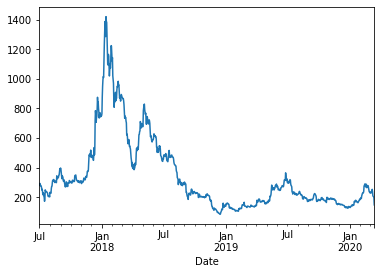

In [145]:
highs.plot()

Функцию **resample** можно применить ко всему датафрэйму, и явно указать для какого столбца применять ту или иную агрегирующую функцию

In [154]:
df.resample('W').agg({'Open': 'mean', 'Close': 'mean', 'High': 'max', 'Low': 'min', 'Volume': 'sum'})

,Open,Close,High,Low,Volume
Date,,,,,
2017-07-02,268.066486,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.337024,261.062083,285.00,231.25,2.246746e+08
2017-07-16,196.193214,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.351429,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.496190,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...,...
2020-02-16,255.021667,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.220833,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.720536,236.373988,278.13,209.26,3.693920e+08


## 9. Функции apply и pivot_table

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Функция **apply**

In [31]:
df = pd.read_csv(r'C:\Users\Vadim\Downloads\NYC_Jobs.csv')

df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,424339,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Triage Nurse, Bureau of Public Health Clinics",PUBLIC HEALTH NURSE,Competitive-1,51011,03,Health,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please ...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City Residency is not required for th...,03/01/2022,NaN,04/05/2022,04/12/2022
1,379094,NYC EMPLOYEES RETIREMENT SYS,External,1,CERTIFIED IT DEVELOPER (APPLICATIONS),CERT IT DEVELOPER (APP),Competitive-1,13643,02,"Technology, Data & Innovation",...,NaN,"TO APPLY FOR CONSIDERATION, PLEASE FORWARD A C...",NaN,NaN,NaN,New York City Residency is not required for th...,01/07/2019,NaN,01/07/2019,04/12/2022
2,520417,NYC HOUSING AUTHORITY,External,1,Chief of Settlement,EXECUTIVE AGENCY COUNSEL,Non-Competitive-5,95005,M2,Legal Affairs,...,1. Resume and cover letter must also include ...,Click the Apply Now button.,NaN,NaN,NaN,NYCHA has no residency requirements.,03/28/2022,NaN,03/28/2022,04/12/2022
3,233549,NYC EMPLOYEES RETIREMENT SYS,External,1,"CERTIFIED IT ADMINISTRATOR (LAN/WAN), LEVEL 4",CERTIFIED IT ADMINISTRATOR (LA,Competitive-1,13652,04,Information Technology & Telecommunications,...,NaN,Click the 'apply now' button to apply. Please...,NaN,NaN,NaN,New York City Residency is not required for th...,03/01/2016,NaN,03/01/2016,04/12/2022
4,510256,HUMAN RIGHTS COMMISSION,External,5,Associate Human Rights Specialist,ASSOCIATE HUMAN RIGHTS SPECIAL,Competitive-1,55038,01,Constituent Services & Community Programs,...,NaN,For City employees: Go to Employee Self-Servic...,": DAY, 9-5; ON OCCASION, CANDIDATES MAY BE REQ...","22 Reade St, Ny",NaN,New York City residency is generally required ...,12/16/2021,NaN,12/16/2021,04/12/2022


Функция **apply** применима как к объекту **Series** так и ко всему **DataFrame**

Один из вариантов применения функции - передача в качестве аргумента любой функции из Python и библиотек:

In [42]:
df['Salary Range From'].apply(np.sqrt) # корень из зарплаты

0       290.261951
1       287.895814
2       324.037035
3       295.301541
4       241.762280
           ...    
3768    292.183162
3769    273.221522
3770    316.227766
3771    205.640463
3772    249.793915
Name: Salary Range From, Length: 3773, dtype: float64

Но данная функция не сработает, если мы применим её ко всему датафрэйму, т.к. тип данных в других столбцах может быть нечисловой

Допускается выбрать несколько столбцов для применения функции **apply**, но только с числовым типом данных:

In [40]:
df[['Salary Range From', 'Salary Range To']].apply(np.sqrt)

,Salary Range From,Salary Range To
0,290.261951,290.261951
1,287.895814,341.161252
2,324.037035,353.553391
3,295.301541,362.798842
4,241.762280,259.260487
...,...,...
3768,292.183162,346.241245
3769,273.221522,292.996587
3770,316.227766,339.116499
3771,205.640463,243.721152


По умолчанию функция **apply** применяется ко всем столбцам:

In [20]:
df[['Salary Range From', 'Salary Range To']].apply(np.mean)

Salary Range From    57657.939466
Salary Range To      79660.249595
dtype: float64

In [22]:
df[['Salary Range From', 'Salary Range To']].apply(np.mean, axis=1)

0        84252.0
1        99637.5
2       115000.0
3       109413.0
4        62832.5
          ...   
3768    102627.0
3769     80248.5
3770    107500.0
3771     50844.0
3772     67077.0
Length: 3773, dtype: float64

Второй вариант использования функции - передача в качестве аргумента свой собственной функции

In [25]:
df['Civil Service Title'].apply(lambda x: x.capitalize())

0                  Public health nurse
1              Cert it developer (app)
2             Executive agency counsel
3       Certified it administrator (la
4       Associate human rights special
                     ...              
3768    Certified it administrator (la
3769     Associate housing development
3770               Senior it architect
3771                         Economist
3772           Agency attorney interne
Name: Civil Service Title, Length: 3773, dtype: object

In [29]:
df.apply(lambda x: x.count())

Job ID                           3773
Agency                           3773
Posting Type                     3773
# Of Positions                   3773
Business Title                   3773
Civil Service Title              3773
Title Classification             3773
Title Code No                    3773
Level                            3773
Job Category                     3771
Full-Time/Part-Time indicator    3610
Career Level                     3771
Salary Range From                3773
Salary Range To                  3773
Salary Frequency                 3773
Work Location                    3773
Division/Work Unit               3773
Job Description                  3773
Minimum Qual Requirements        3748
Preferred Skills                 3365
Additional Information           2344
To Apply                         3772
Hours/Shift                      1193
Work Location 1                  1753
Recruitment Contact                 0
Residency Requirement            3773
Posting Date

Главное отличие **apply** от **map** это то, что **apply** применима как к серии, так и к датафрэму, к которым можно применять функцию сразу на весь столбец/строк, а функция **map** применима только к серии и делает вычисления поэлементарно

### Функция **pivot_table**

Если функция **pivot** позволяет изменить форму датафрэйма с длинного на широкий формат, то функция **pivot_table** создана для того, чтобы агрегировать данные в датафрэйме

In [45]:
df = pd.read_csv(r'C:\Users\Vadim\Downloads\weather2.csv')

df.head()

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,61,54
2,5/2/2017,new york,70,60
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80


Применим функцию **pivot_table** к загруженному датафрэйму, по умолчанию применяется агрегирующая функция **mean**

In [50]:
df.pivot_table(index='date', values='temperature') # один из вариантов использования

,temperature
date,
5/1/2017,69.75
5/2/2017,76.00


In [53]:
df.pivot_table(index='date', values=['temperature', 'humidity']) # один из вариантов использования

,humidity,temperature
date,,
5/1/2017,68.25,69.75
5/2/2017,58.25,76.00


In [54]:
df.pivot_table(index='date', columns='city', values=['temperature', 'humidity']) # один из вариантов использования

humidity          temperature         
city       mumbai new york      mumbai new york
date                                           
5/1/2017     81.5     55.0        76.5     63.0
5/2/2017     55.5     61.0        81.0     71.0

In [59]:
df.pivot_table(columns=['city', 'date'], values=['temperature', 'humidity']) # один из вариантов использования

city          mumbai          new york         
date        5/1/2017 5/2/2017 5/1/2017 5/2/2017
humidity        81.5     55.5     55.0     61.0
temperature     76.5     81.0     63.0     71.0

In [61]:
df.pivot_table(columns=['city', 'date']) # один из вариантов использования

city          mumbai          new york         
date        5/1/2017 5/2/2017 5/1/2017 5/2/2017
humidity        81.5     55.5     55.0     61.0
temperature     76.5     81.0     63.0     71.0

Аргументом **agg_func** можно менять агрегирующую функцию:

In [64]:
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,61,54
2,5/2/2017,new york,70,60
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,80,26


In [67]:
df.pivot_table(index='city', columns='date', values=['temperature', 'humidity'], aggfunc=max)

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai         83       85          78       82
new york       56       62          65       72